<a href="https://colab.research.google.com/github/efexu00/blank-app/blob/main/Feature_Extraction_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.listdir('/content/drive/MyDrive/Parkinsons_Project/Data')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['PD-Dataset.csv',
 'traditional_features.csv.gsheet',
 '23849127.zip',
 '23849127.zip (Unzipped Files)',
 'Feature Extraction.ipynb',
 'Unzipped',
 'Feature Extraction test.ipynb']

In [2]:
import pandas as pd
import os

# Load classical features
# Correct the path to include the underscore in 'Parkinsons_Project'
# Remove the attempt to list contents of the .gsheet path

# Attempt to read the file using the corrected path
file_path = '/content/drive/MyDrive/Parkinsons_Project/Data/PD-Dataset.csv'

# Check if the file exists before attempting to read
if os.path.exists(file_path):
    traditional_df = pd.read_csv(file_path)
    print("File loaded successfully.")
    print(traditional_df.head())
else:
    print(f"Error: File not found at {file_path}. Please check the file name and location in your Google Drive.")

File loaded successfully.
  Subject;Status;Age;Sex;Jitter;Shimmer;LZ-2;CPP;Hurst;MFSW;Shannon;Permutation;PPE;FMMI;FZCF;GNE;ZCR;D2;HNR;RPDE;GQ prc5 95;GQ std cycle open;GQ std cycle closed;MFCC0;MFCC1;MFCC2;MFCC3;MFCC4;MFCC5;MFCC6;MFCC7;MFCC8;MFCC9;MFCC10;MFCC11;MFCC12
0  PD1;1;65;0;0.826062113;13.60649508;1093.666667...                                                                                                                                                                                               
1  PD2;1;51;0;0.238299742;17.05584272;595.3333333...                                                                                                                                                                                               
2  PD3;1;74;0;3.125984703;10.09049767;661.6666667...                                                                                                                                                                                              

In [3]:
!pip install transformers torchaudio librosa

from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch, librosa
import numpy as np
import os

# Load processor and model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

# Load audio
audio_path = '/content/drive/MyDrive/Parkinsons_Project/Data/23849127.zip (Unzipped Files)/PD_AH/AH_545616858-3A749CBC-3FEB-4D35-820E-E45C3E5B9B6A.wav'
audio, rate = librosa.load(audio_path, sr=16000)

# Process audio
inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()

# Save features
np.savetxt("ssl_features.csv", embeddings, delimiter=",")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
!pip install transformers torchaudio librosa --quiet

from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch, librosa
import numpy as np
import os
import pandas as pd
from zipfile import ZipFile
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
zip_path = "/content/drive/MyDrive/Parkinsons_Project/Data/23849127.zip"
unzip_dir = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped"
# Assume the audio folder is within the unzipped directory
audio_folder = os.path.join(unzip_dir, "PD_AH")
output_csv = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/ssl_features_all.csv"

# Create the unzip directory if it doesn't exist
if not os.path.exists(unzip_dir):
    os.makedirs(unzip_dir)
    print(f"✅ Created unzip directory: {unzip_dir}")

# Unzip if the target audio folder doesn't exist or is empty
# This is a more reliable check than just checking for audio_folder existence
if not os.path.exists(audio_folder) or not os.listdir(audio_folder):
    print(f"Attempting to unzip {zip_path} into {unzip_dir}")
    try:
        with ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(unzip_dir)
        print("✅ ZIP extracted successfully.")
    except FileNotFoundError:
        print(f"❌ Error: Zip file not found at {zip_path}. Please check the file path.")
        # Exit or handle the error appropriately
        exit() # Or sys.exit() if imported

# Now check if the expected audio folder exists after extraction
if not os.path.exists(audio_folder):
    print(f"❌ Error: Expected audio folder not found after extraction at {audio_folder}.")
    print("Please check the structure of the zip file.")
    # You might want to inspect the contents of unzip_dir here
    # print(f"Contents of unzip_dir: {os.listdir(unzip_dir)}")
    exit() # Or sys.exit() if imported

# Load Wav2Vec2.0 processor and model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

# Loop over all .wav files
features_list = []
filenames = []

# Now that we've confirmed audio_folder exists, we can list its contents
print(f"Processing audio files from: {audio_folder}")
for file in os.listdir(audio_folder):
    if file.endswith(".wav"):
        audio_path = os.path.join(audio_folder, file)
        try:
            audio, rate = librosa.load(audio_path, sr=16000)
            inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
            with torch.no_grad():
                outputs = model(**inputs)
                # Ensure the output is a 1D array for saving
                embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
            features_list.append(embedding)
            filenames.append(file)
            # print(f"✅ Processed: {file}") # Keep this line for verbose output if needed
        except Exception as e:
            print(f"❌ Failed to process {file}: {e}")

# Save all features to a CSV
if features_list: # Only attempt to create DataFrame if features were extracted
    df = pd.DataFrame(features_list)
    df.insert(0, "filename", filenames)  # optional: keep track of source files
    df.to_csv(output_csv, index=False)
    print(f"✅ All features saved to {output_csv}")
else:
    print("⚠️ No WAV files found or processed in the specified directory.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processing audio files from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH
⚠️ No WAV files found or processed in the specified directory.


In [5]:
#!pip install transformers torchaudio librosa --quiet

from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch, librosa
import numpy as np
import os
import pandas as pd
from zipfile import ZipFile
from google.colab import drive
import sys # Import sys to use sys.exit()

# Mount Google Drive
drive.mount('/content/drive')

# Paths
zip_path = "/content/drive/MyDrive/Parkinsons_Project/Data/23849127.zip"
unzip_dir = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped"
# Assume the audio folder is within the unzipped directory
# audio_folder = os.path.join(unzip_dir, "PD_AH") # We will set this dynamically
output_csv = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/ssl_features_all.csv"

# Create the unzip directory if it doesn't exist
if not os.path.exists(unzip_dir):
    os.makedirs(unzip_dir)
    print(f"✅ Created unzip directory: {unzip_dir}")

# Unzip if the unzip directory is empty or the expected folder is not there
# A more robust check might be to see if any files exist in the unzip_dir
if not os.listdir(unzip_dir): # Check if unzip_dir is empty
    print(f"Attempting to unzip {zip_path} into {unzip_dir}")
    try:
        with ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(unzip_dir)
        print("✅ ZIP extracted successfully.")
    except FileNotFoundError:
        print(f"❌ Error: Zip file not found at {zip_path}. Please check the file path.")
        sys.exit(1) # Exit the script

# --- Add inspection of unzipped contents ---
print(f"Contents of unzip directory ({unzip_dir}):")
unzipped_contents = os.listdir(unzip_dir)
print(unzipped_contents)

# --- Dynamically find the audio folder ---
# Assuming 'PD_AH' or a similar name containing the audio files is present.
# You might need to adjust this logic based on the actual output of os.listdir(unzip_dir)
potential_audio_folders = [d for d in unzipped_contents if os.path.isdir(os.path.join(unzip_dir, d))]

audio_folder = None
for folder in potential_audio_folders:
    # You might need a more specific check here, e.g., check for .wav files inside
    if "PD_AH" in folder or "Audio" in folder: # Adjust condition based on observation
        audio_folder = os.path.join(unzip_dir, folder)
        break

# Check if a suitable audio folder was found
if audio_folder and os.path.exists(audio_folder) and os.listdir(audio_folder):
    print(f"✅ Found audio folder at: {audio_folder}")
else:
    print(f"❌ Error: Could not automatically locate the audio folder containing WAV files within {unzip_dir}.")
    print("Please inspect the contents printed above and manually set the 'audio_folder' variable.")
    # You might want to add logic here to manually prompt the user or exit
    sys.exit(1) # Exit if the audio folder isn't found

# Load Wav2Vec2.0 processor and model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

# Loop over all .wav files
features_list = []
filenames = []

# Now that we've confirmed audio_folder exists and is not empty, we can list its contents
print(f"Processing audio files from: {audio_folder}")
for file in os.listdir(audio_folder):
    if file.endswith(".wav"):
        audio_path = os.path.join(audio_folder, file)
        try:
            # Add a check for file size or validity before loading
            if os.path.getsize(audio_path) == 0:
                print(f"⚠️ Skipping empty file: {file}")
                continue

            audio, rate = librosa.load(audio_path, sr=16000)

            # Check if audio was loaded successfully
            if audio is None or len(audio) == 0:
                 print(f"⚠️ Skipping file with no audio data: {file}")
                 continue

            inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
            with torch.no_grad():
                outputs = model(**inputs)
                # Ensure the output is a 1D array for saving
                embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
            features_list.append(embedding)
            filenames.append(file)
            # print(f"✅ Processed: {file}") # Keep this line for verbose output if needed
        except Exception as e:
            print(f"❌ Failed to process {file}: {e}")

# Save all features to a CSV
if features_list: # Only attempt to create DataFrame if features were extracted
    df = pd.DataFrame(features_list)
    df.insert(0, "filename", filenames)  # optional: keep track of source files
    df.to_csv(output_csv, index=False)
    print(f"✅ All features saved to {output_csv}")
else:
    print("⚠️ No WAV files found or processed in the specified directory.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Contents of unzip directory (/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped):
['Demographics_age_sex.xlsx', 'HC_AH.zip', 'PD_AH.zip', 'PD_AH', 'HC_AH', 'Demographics_age_sex.xlsx - Parselmouth (1).csv']
✅ Found audio folder at: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processing audio files from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH
⚠️ No WAV files found or processed in the specified directory.


In [6]:
# %%
!pip install transformers torchaudio librosa --quiet

from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch, librosa
import numpy as np
import os
import pandas as pd
from zipfile import ZipFile
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Paths
zip_path = "/content/drive/MyDrive/Parkinsons_Project/Data/23849127.zip"
unzip_dir = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped"
output_csv = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/ssl_features_all.csv"



# Unzip main ZIP if needed
if not os.path.exists(unzip_dir):
    os.makedirs(unzip_dir)
if not os.listdir(unzip_dir):
    print(f"Unzipping {zip_path} to {unzip_dir}")
    try:
        with ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(unzip_dir)
        print("✅ Main ZIP extracted")
    except FileNotFoundError:
        print("❌ Main ZIP file not found")
        sys.exit(1)

# --- Unzip nested zip files like PD_AH.zip and HC_AH.zip ---
nested_zips = [f for f in os.listdir(unzip_dir) if f.endswith(".zip")]
for nested_zip in nested_zips:
    nested_zip_path = os.path.join(unzip_dir, nested_zip)
    nested_extract_path = os.path.join(unzip_dir, nested_zip.replace(".zip", ""))
    if not os.path.exists(nested_extract_path):
        os.makedirs(nested_extract_path)
        with ZipFile(nested_zip_path, 'r') as zip_ref:
            zip_ref.extractall(nested_extract_path)
        print(f"✅ Extracted nested ZIP: {nested_zip}")

# --- Find the audio folder (first folder with WAVs) ---
audio_folder = None
for root, dirs, files in os.walk(unzip_dir):
    wavs = [f for f in files if f.endswith(".wav")]
    if wavs:
        audio_folder = root
        break

if not audio_folder:
    print("❌ No WAV files found in any extracted folders.")
    sys.exit(1)

print(f"✅ Found WAV files in: {audio_folder}")

# Load Wav2Vec2.0
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

# Process all WAV files
features_list = []
filenames = []

for file in os.listdir(audio_folder):
    if file.endswith(".wav"):
        audio_path = os.path.join(audio_folder, file)
        try:
            if os.path.getsize(audio_path) == 0:
                print(f"⚠️ Skipping empty file: {file}")
                continue

            audio, rate = librosa.load(audio_path, sr=16000)
            if audio is None or len(audio) == 0:
                print(f"⚠️ Skipping file with no audio data: {file}")
                continue

            inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
            with torch.no_grad():
                outputs = model(**inputs)
                embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
            features_list.append(embedding)
            filenames.append(file)
            print(f"✅ Processed: {file}")
        except Exception as e:
            print(f"❌ Failed to process {file}: {e}")

# Save to CSV
if features_list:
    df = pd.DataFrame(features_list)
    df.insert(0, "filename", filenames)
    df.to_csv(output_csv, index=False)
    print(f"✅ All features saved to {output_csv}")
else:
    print("⚠️ No features extracted.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Found WAV files in: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH/PD_AH


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Processed: AH_545622718-C052AD58-5E6B-4ADC-855C-F76B66BAFA6E.wav
✅ Processed: AH_545622722-3C79DA68-36BB-43A2-B29C-61AEF480E07E.wav
✅ Processed: AH_545622720-E1486AF6-8C95-47EB-829B-4D62698C987A.wav
✅ Processed: AH_545622719-52C23861-6E0D-41E0-A3D8-9358C28C019B.wav
✅ Processed: AH_545622717-461DFFFE-54AF-42AF-BA78-528BD505D624.wav
✅ Processed: AH_545643618-82A143AC-B643-4273-A923-C42A83AEEC5F.wav
✅ Processed: AH_545616858-3A749CBC-3FEB-4D35-820E-E45C3E5B9B6A.wav
✅ Processed: AH_545629296-C2C009C6-8C17-42EA-B6BE-362942FC4692.wav
✅ Processed: AH_545648867-CB17D873-1CEA-492A-B5B0-93C7463F516C.wav
✅ Processed: AH_545692309-EA8C4DC0-9B2A-4CC7-A490-851A2129A733.wav
✅ Processed: AH_545692315-C2972597-9AEC-4060-A186-F1F59340640C.wav
✅ Processed: AH_545713221-1E77C030-4558-4A88-B1A2-6AB777ACAE61.wav
✅ Processed: AH_545713222-DA13DC3A-F24B-454E-984F-19DF19328D39.wav
✅ Processed: AH_545713223-E6D59EE5-4C3F-4B40-AE8F-0657EF94DB66.wav
✅ Processed: AH_545713224-1B3708B0-8792-4FEE-B03B-C7CB9CB03D58

In [7]:
# %%
!pip install transformers torchaudio librosa --quiet

from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch, librosa
import numpy as np
import os
import pandas as pd
from zipfile import ZipFile
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Paths
HC_zip_path = "/content/drive/MyDrive/Parkinsons_Project/Data/23849127.zip"
HC_unzip_dir = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped"
HC_output_csv = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/HC_ssl_features_all.csv"
#


# # Unzip main ZIP if needed
# if not os.path.exists(unzip_dir):
#     os.makedirs(unzip_dir)
# if not os.listdir(unzip_dir):
#     print(f"Unzipping {zip_path} to {unzip_dir}")
#     try:
#         with ZipFile(zip_path, 'r') as zip_ref:
#             zip_ref.extractall(unzip_dir)
#         print("✅ Main ZIP extracted")
#     except FileNotFoundError:
#         print("❌ Main ZIP file not found")
#         sys.exit(1)

# # --- Unzip nested zip files like PD_AH.zip and HC_AH.zip ---
# nested_zips = [f for f in os.listdir(unzip_dir) if f.endswith(".zip")]
# for nested_zip in nested_zips:
#     nested_zip_path = os.path.join(unzip_dir, nested_zip)
#     nested_extract_path = os.path.join(unzip_dir, nested_zip.replace(".zip", ""))
#     if not os.path.exists(nested_extract_path):
#         os.makedirs(nested_extract_path)
#         with ZipFile(nested_zip_path, 'r') as zip_ref:
#             zip_ref.extractall(nested_extract_path)
#         print(f"✅ Extracted nested ZIP: {nested_zip}")

# # --- Find the audio folder (first folder with WAVs) ---
# audio_folder = None
# for root, dirs, files in os.walk(unzip_dir):
#     wavs = [f for f in files if f.endswith(".wav")]
#     if wavs:
#         audio_folder = root
#         break

# if not audio_folder:
#     print("❌ No WAV files found in any extracted folders.")
#     sys.exit(1)

# print(f"✅ Found WAV files in: {audio_folder}")
audio_folder="/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/HC_AH/HC_AH"

# Load Wav2Vec2.0
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

# Process all WAV files
HC_features_list = []
filenames = []

for file in os.listdir(audio_folder):
    if file.endswith(".wav"):
        audio_path = os.path.join(audio_folder, file)
        try:
            if os.path.getsize(audio_path) == 0:
                print(f"⚠️ Skipping empty file: {file}")
                continue

            audio, rate = librosa.load(audio_path, sr=16000)
            if audio is None or len(audio) == 0:
                print(f"⚠️ Skipping file with no audio data: {file}")
                continue

            inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
            with torch.no_grad():
                outputs = model(**inputs)
                embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
            HC_features_list.append(embedding)
            filenames.append(file)
            print(f"✅ Processed: {file}")
        except Exception as e:
            print(f"❌ Failed to process {file}: {e}")

# Save to CSV
if features_list:
    df = pd.DataFrame(HC_features_list)
    df.insert(0, "filename", filenames)
    df.to_csv(HC_output_csv, index=False)
    print(f"✅ All features saved to {HC_output_csv}")
else:
    print("⚠️ No features extracted.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Processed: AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav
✅ Processed: AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav
✅ Processed: AH_222K_FC9D2763-1836-460B-954F-37F23D6CD81D.wav
✅ Processed: AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav
✅ Processed: AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3.wav
✅ Processed: AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22.wav
✅ Processed: AH_197T_7552379A-2310-46E1-9466-9D8045C990B8.wav
✅ Processed: AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav
✅ Processed: AH_292J_201CB911-31C1-4CD0-BD73-4FBA4A16C21F.wav
✅ Processed: AH_322A_C3BF5535-A11E-498E-94EB-BE7E74099FFB.wav
✅ Processed: AH_325A_3EB21DC7-C340-4D0E-AC9E-0EABF217BBEE.wav
✅ Processed: AH_325J_7F5F27AA-5A93-43CF-AB17-FC53940BF4B0.wav
✅ Processed: AH_333L_6C551A6E-CC47-410E-AA49-2DC0A86E6489.wav
✅ Processed: AH_378G_3C2A05CE-36E4-4956-8FC2-0494B27D3EA8.wav
✅ Processed: AH_420J_07C96C2C-6E96-4A2F-BEC9-5CB71DB309B6.wav
✅ Processed: AH_444B_E1586F09-1BF5-408D-A55E-96D9E8B76A43.wav
✅ Proces

In [8]:
# === Load Labels ===
labels_path = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx"

try:
    labels_df = pd.read_excel(labels_path)
    print("✅ Labels loaded from:", labels_path)
    print("🧾 Label columns:", labels_df.columns)
    print(labels_df.head())

except Exception as e:
    print(f"❌ Could not load labels: {e}")
    labels_df = None

# === Save all features with labels (if available) ===
if features_list:
    features_df = pd.DataFrame(features_list)
    features_df.insert(0, "filename", filenames)
    features_df['filename'] = df['filename'].str.replace('.wav', '', regex=False)

    if labels_df is not None:
        # Rename 'Sample ID' column to 'filename' in labels_df for merging
        if 'Sample ID' in labels_df.columns:
            labels_df.rename(columns={'Sample ID': 'filename'}, inplace=True)
            print("✅ Renamed 'Sample ID' to 'filename' in labels_df")
        else:
            print("❌ 'Sample ID' column not found in labels_df. Cannot rename for merging.")
            # You might want to handle this case more robustly, e.g., exit or skip merging

        # Normalize file name formats if necessary

        if 'filename' in labels_df.columns:
             labels_df['filename'] = labels_df['filename'].astype(str)

            # Attempt match (assumes labels_df has a 'filename' column to join on)
             merged_df = pd.merge(features_df, labels_df, on="filename", how="left")

             missing_labels = merged_df['filename'][merged_df.isna().any(axis=1)].tolist()
             if missing_labels:
                print(f"⚠️ Warning: {len(missing_labels)} files have missing labels:", missing_labels)

            # Save merged DataFrame
             merged_df.to_csv(output_csv, index=False)
             print(f"✅ Features + labels saved to {output_csv}")
        else:
            print("❌ 'filename' column is not in labels_df after attempting rename. Cannot merge.")
            # Fallback: save just features
            features_df.to_csv(output_csv, index=False)
            print(f"⚠️ Labels not available. Only features saved to {output_csv}")
    else:
        # Fallback: save just features
        features_df.to_csv(output_csv, index=False)
        print(f"⚠️ Labels not available. Only features saved to {output_csv}")
else:
    print("⚠️ No features extracted. Nothing to save.")
print(merged_df.tail())

✅ Labels loaded from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx
🧾 Label columns: Index(['Sample ID', 'Label', 'Age', 'Sex'], dtype='object')
                                      Sample ID Label   Age Sex
0  AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5    HC  69.0   M
1  AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6    HC  43.0   M
2  AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2    HC  18.0   F
3  AH_123G_559F0706-2238-447C-BA39-DB5933BA619D    HC  28.0   M
4  AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22    HC  68.0   M


ValueError: Length of values (41) does not match length of index (40)

In [9]:
# %%
# Ensure necessary libraries are imported for this block
import pandas as pd
import numpy as np
import os
from google.colab import drive
import sys
from transformers import Wav2Vec2Processor, Wav2Vec2Model # Import these if needed for the loop below, although typically loaded earlier
import torch, librosa # Import these if needed for the loop below


# Mount Google Drive if not already mounted
drive.mount('/content/drive', force_remount=True)

# Paths - Ensure these match your setup
# Assuming the previous cells successfully unzipped and located the audio files
# We need the paths to the audio folders and the output CSV
unzip_dir = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped"
PD_audio_folder = os.path.join(unzip_dir, "PD_AH") # Assuming this is where PD files are
HC_audio_folder = os.path.join(unzip_dir, "HC_AH") # Assuming this is where HC files are

# Define output paths for combined features
output_csv_combined = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv"
labels_path = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx"


# --- Load Labels ---
try:
    labels_df = pd.read_excel(labels_path)
    print("✅ Labels loaded from:", labels_path)
    print("🧾 Label columns:", labels_df.columns)
    print(labels_df.head())

except Exception as e:
    print(f"❌ Could not load labels: {e}")
    labels_df = None


# --- Re-run Feature Extraction and Collect Features/Filenames ---
# It seems the issue is that the lists features_list and filenames got out of sync.
# The safest way is to regenerate them right before saving.
# Load Wav2Vec2.0 (ensure this is available or re-load)
try:
    processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
    model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
    print("✅ Loaded Wav2Vec2.0 processor and model.")
except Exception as e:
    print(f"❌ Error loading Wav2Vec2.0 model: {e}")
    # Handle error, maybe sys.exit(1) if essential
    processor = None
    model = None


features_list_pd = []
filenames_pd = []

features_list_hc = []
filenames_hc = []

# Function to process files from a folder
def process_audio_folder(folder_path, feature_list, filename_list, processor, model):
    if not os.path.exists(folder_path):
        print(f"⚠️ Audio folder not found: {folder_path}. Skipping.")
        return

    print(f"Processing audio files from: {folder_path}")
    for file in os.listdir(folder_path):
        if file.endswith(".wav"):
            audio_path = os.path.join(folder_path, file)
            try:
                if os.path.getsize(audio_path) == 0:
                    print(f"⚠️ Skipping empty file: {file}")
                    continue

                audio, rate = librosa.load(audio_path, sr=16000)
                if audio is None or len(audio) == 0:
                     print(f"⚠️ Skipping file with no audio data: {file}")
                     continue

                # Ensure processor and model are loaded
                if processor is None or model is None:
                     print("❌ Wav2Vec2.0 model not loaded. Cannot process audio.")
                     break # Exit the loop if model loading failed

                inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
                with torch.no_grad():
                    outputs = model(**inputs)
                    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

                # Append *both* feature and filename ONLY on success
                feature_list.append(embedding)
                filename_list.append(file)
                # print(f"✅ Processed: {file}")

            except Exception as e:
                print(f"❌ Failed to process {file}: {e}")

# Process PD files
if processor is not None and model is not None:
    process_audio_folder(PD_audio_folder, features_list_pd, filenames_pd, processor, model)
    process_audio_folder(HC_audio_folder, features_list_hc, filenames_hc, processor, model)


# Combine features and filenames from both groups
all_features_list = features_list_pd + features_list_hc
all_filenames = filenames_pd + filenames_hc

# === Save all features with labels (if available) ===
if all_features_list: # Only attempt to create DataFrame if features were extracted
    features_df = pd.DataFrame(all_features_list)

    # Now, insert the filenames list, which should have the same length
    if len(features_df) == len(all_filenames):
        features_df.insert(0, "filename", all_filenames)
        print("✅ Inserted filenames column.")

        # Remove the .wav extension for merging
        features_df['filename_base'] = features_df['filename'].str.replace('.wav', '', regex=False)

        # --- Merge with labels ---
        merged_df = features_df.copy() # Start with features_df

        if labels_df is not None:
            # Rename 'Sample ID' column to 'filename_base' in labels_df for merging
            # We rename it to match the new 'filename_base' column in features_df
            labels_df_for_merge = labels_df.copy() # Work on a copy
            if 'Sample ID' in labels_df_for_merge.columns:
                labels_df_for_merge.rename(columns={'Sample ID': 'filename_base'}, inplace=True)
                print("✅ Renamed 'Sample ID' to 'filename_base' in labels_df for merging.")

                # Ensure the merge column is of the same type in both dataframes
                labels_df_for_merge['filename_base'] = labels_df_for_merge['filename_base'].astype(str)
                merged_df['filename_base'] = merged_df['filename_base'].astype(str)


                # Attempt match (assumes labels_df has a 'filename_base' column to join on)
                # Perform a left merge from features_df to labels_df
                # Keep all rows from features_df and add label columns where matches are found
                merged_df = pd.merge(features_df, labels_df_for_merge, on="filename_base", how="left")
                print("✅ Merged features with labels.")

                # Report missing labels based on NaNs in label columns (e.g., 'Label', 'Age', 'Sex')
                # Identify label columns expected after merge (excluding the merge key)
                label_cols_after_merge = [col for col in labels_df_for_merge.columns if col != 'filename_base']
                missing_labels_mask = merged_df[label_cols_after_merge].isna().any(axis=1)
                missing_labels_files = merged_df.loc[missing_labels_mask, 'filename'].tolist()

                if missing_labels_files:
                    print(f"⚠️ Warning: {len(missing_labels_files)} files have missing labels:")
                    # print(missing_labels_files) # Uncomment to see the list of files

            else:
                print("❌ 'Sample ID' column not found in labels_df. Cannot merge labels.")
                # merged_df remains just features_df with 'filename_base'


        # Drop the temporary 'filename_base' column before saving
        merged_df.drop(columns=["filename_base"], inplace=True)

        # Save merged DataFrame (or features only if merge failed)
        merged_df.to_csv(output_csv_combined, index=False)
        print(f"✅ Combined features + labels saved to {output_csv_combined}")

    else:
        print(f"❌ Error: Length of features ({len(features_df)}) does not match length of filenames ({len(all_filenames)}). Cannot save.")
        print("⚠️ No combined features saved.")

else:
    print("⚠️ No combined features extracted. Nothing to save.")

# Optional: Print the head of the combined dataframe to verify
if 'merged_df' in locals() and not merged_df.empty:
    print("\nCombined DataFrame head:")
    print(merged_df.head())
    print("\nCombined DataFrame columns:")
    print(merged_df.columns.tolist())
    print("\nCombined DataFrame info:")
    merged_df.info()
else:
     print("❌ merged_df not created successfully or is empty.")

Mounted at /content/drive
✅ Labels loaded from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx
🧾 Label columns: Index(['Sample ID', 'Label', 'Age', 'Sex'], dtype='object')
                                      Sample ID Label   Age Sex
0  AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5    HC  69.0   M
1  AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6    HC  43.0   M
2  AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2    HC  18.0   F
3  AH_123G_559F0706-2238-447C-BA39-DB5933BA619D    HC  28.0   M
4  AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22    HC  68.0   M


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Loaded Wav2Vec2.0 processor and model.
Processing audio files from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH
Processing audio files from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/HC_AH
⚠️ No combined features extracted. Nothing to save.
❌ merged_df not created successfully or is empty.


In [ ]:
if HC_features_list:
    HC_features_df = pd.DataFrame(HC_features_list)
    HC_features_df.insert(0, "filename", filenames)
    HC_features_df['filename'] = df['filename'].str.replace('.wav', '', regex=False)

    if labels_df is not None:
        # Rename 'Sample ID' column to 'filename' in labels_df for merging
        if 'Sample ID' in labels_df.columns:
            labels_df.rename(columns={'Sample ID': 'filename'}, inplace=True)
            print("✅ Renamed 'Sample ID' to 'filename' in labels_df")
        else:
            print("❌ 'Sample ID' column not found in labels_df. Cannot rename for merging.")
            # You might want to handle this case more robustly, e.g., exit or skip merging

        # Normalize file name formats if necessary

        if 'filename' in labels_df.columns:
             labels_df['filename'] = labels_df['filename'].astype(str)

            # Attempt match (assumes labels_df has a 'filename' column to join on)
             HC_merged_df = pd.merge(HC_features_df, labels_df, on="filename", how="left")

             missing_labels = merged_df['filename'][merged_df.isna().any(axis=1)].tolist()
             if missing_labels:
                print(f"⚠️ Warning: {len(missing_labels)} files have missing labels:", missing_labels)

            # Save merged DataFrame
             HC_merged_df.to_csv(HC_output_csv, index=False)
             print(f"✅ Features + labels saved to {HC_output_csv}")
        else:
            print("❌ 'filename' column is not in labels_df after attempting rename. Cannot merge.")
            # Fallback: save just features
            features_df.to_csv(HC_output_csv, index=False)
            print(f"⚠️ Labels not available. Only features saved to {HC_output_csv}")
    else:
        # Fallback: save just features
        features_df.to_csv(HC_output_csv, index=False)
        print(f"⚠️ Labels not available. Only features saved to {HC_output_csv}")
else:
    print("⚠️ No features extracted. Nothing to save.")
print(HC_merged_df.tail())

ValueError: Length of values (82) does not match length of index (41)

In [10]:
# %%
# !pip install transformers torchaudio librosa --quiet # Keep if needed, but often installed earlier

from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch, librosa
import numpy as np
import os
import pandas as pd
from zipfile import ZipFile
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Paths
# HC_zip_path = "/content/drive/MyDrive/Parkinsons_Project/Data/23849127.zip" # This path seems redundant in this specific cell
# HC_unzip_dir = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped" # This path seems redundant in this specific cell
HC_output_csv = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/HC_ssl_features_all.csv"

# --- Set the specific audio folder for HC files ---
audio_folder="/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/HC_AH/HC_AH"

# Load Wav2Vec2.0 (ensure this is available or re-load)
try:
    processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
    model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
    print("✅ Loaded Wav2Vec2.0 processor and model.")
except Exception as e:
    print(f"❌ Error loading Wav2Vec2.0 model: {e}")
    processor = None
    model = None
    # Decide if you want to exit here if the model is essential
    # sys.exit(1)


# Process all WAV files specifically from the HC folder
HC_features_list = []
HC_filenames = [] # <--- Use a dedicated list for HC filenames

# Check if the HC audio folder exists before listing files
if not os.path.exists(audio_folder):
    print(f"❌ Error: HC audio folder not found at {audio_folder}. Please check the path and ensure files were unzipped correctly.")
else:
    print(f"Processing audio files from: {audio_folder}")
    for file in os.listdir(audio_folder):
        if file.endswith(".wav"):
            audio_path = os.path.join(audio_folder, file)
            try:
                if os.path.getsize(audio_path) == 0:
                    print(f"⚠️ Skipping empty file: {file}")
                    continue

                # Ensure processor and model are loaded before trying to use them
                if processor is None or model is None:
                    print("❌ Wav2Vec2.0 model not loaded. Cannot process audio.")
                    break # Exit loop if model loading failed

                audio, rate = librosa.load(audio_path, sr=16000)
                if audio is None or len(audio) == 0:
                    print(f"⚠️ Skipping file with no audio data: {file}")
                    continue

                inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
                with torch.no_grad():
                    outputs = model(**inputs)
                    # Ensure the output is a 1D array for saving
                    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

                # Append *both* feature and filename ONLY on success
                HC_features_list.append(embedding)
                HC_filenames.append(file) # <--- Append to the dedicated HC list
                # print(f"✅ Processed: {file}") # Uncomment for verbose output

            except Exception as e:
                print(f"❌ Failed to process {file}: {e}")

# Save to CSV
# Check if HC_features_list has data
if HC_features_list:
    HC_features_df = pd.DataFrame(HC_features_list)

    # Insert the dedicated HC filenames list, which should now match the DataFrame size
    if len(HC_features_df) == len(HC_filenames):
        HC_features_df.insert(0, "filename", HC_filenames) # <--- Use HC_filenames
        print("✅ Inserted filenames column into HC_features_df.")

        # The rest of the saving and merging logic will happen in subsequent cells
        # that combine HC and PD features.
        # Saving the raw HC features might not be necessary if you combine later.
        # However, if you want to save the raw HC features separately:
        try:
            HC_features_df.to_csv(HC_output_csv, index=False)
            print(f"✅ HC features saved to {HC_output_csv}")
        except Exception as e:
             print(f"❌ Error saving HC features CSV: {e}")


    else:
        # This should ideally not happen with the dedicated list approach if no errors occurred
        print(f"❌ Error: Length of HC features ({len(HC_features_df)}) does not match length of HC filenames ({len(HC_filenames)}). Cannot save correctly.")
        print("⚠️ HC features not saved.")

else:
    print("⚠️ No HC features extracted. Nothing to save for HC.")

# Keep the merged_df and df variables as they might be used in later cells,
# but be aware that the contents of 'filenames' and 'features_list' from previous
# cells might not be perfectly in sync if files failed to process in those cells.
# The subsequent cell ipython-input-12-4eb554421935 already addresses this by
# re-extracting features for both PD and HC before combining.
# You can remove the 'print(merged_df.tail())' and the last 'if features_list:' block
# if you intend to fully rely on the combining logic in the next cell.

# The following block seems redundant if you are combining later
# You can remove this block entirely if the next cell handles merging with labels.
# if features_list: # This condition uses the global 'features_list', not HC_features_list
#     # ... rest of the label merging logic which might be incorrect here ...
#     print(HC_merged_df.tail()) # This uses HC_merged_df which is defined *inside* this block

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Loaded Wav2Vec2.0 processor and model.
Processing audio files from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/HC_AH/HC_AH
✅ Inserted filenames column into HC_features_df.
✅ HC features saved to /content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/HC_ssl_features_all.csv


In [ ]:
combined_df = pd.concat([merged_df, HC_merged_df], axis=0, ignore_index=True)
print(combined_df)
print(combined_df.head())

NameError: name 'merged_df' is not defined

In [11]:
# %%
# Ensure necessary libraries are imported
import pandas as pd
import numpy as np
import os
from google.colab import drive
import sys
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch, librosa
from zipfile import ZipFile # Added import for ZipFile

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Paths - Ensure these match your setup
# These paths assume the main ZIP contains nested zips or folders directly within it
zip_path = "/content/drive/MyDrive/Parkinsons_Project/Data/23849127.zip"
unzip_dir = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped"
output_csv_combined = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv"
labels_path = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx" # Path to the demographics Excel file


# --- Unzip the main file and any nested zips ---

# Create the main unzip directory if it doesn't exist
if not os.path.exists(unzip_dir):
    os.makedirs(unzip_dir)
    print(f"✅ Created unzip directory: {unzip_dir}")

# Unzip the main ZIP if the unzip directory is empty
if not os.listdir(unzip_dir):
    print(f"Attempting to unzip {zip_path} into {unzip_dir}")
    try:
        with ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(unzip_dir)
        print("✅ Main ZIP extracted successfully.")
    except FileNotFoundError:
        print(f"❌ Error: Zip file not found at {zip_path}. Please check the file path.")
        sys.exit(1) # Exit if the main zip isn't found

# Now check for and unzip any nested zips within the extracted contents
# This handles cases where PD_AH.zip and HC_AH.zip are inside 23849127.zip
nested_zips = [f for f in os.listdir(unzip_dir) if f.endswith(".zip")]
if nested_zips:
    print(f"Found nested ZIP files: {nested_zips}")
    for nested_zip in nested_zips:
        nested_zip_path = os.path.join(unzip_dir, nested_zip)
        # Create a subdirectory for each nested zip's contents
        nested_extract_path = os.path.join(unzip_dir, nested_zip.replace(".zip", ""))
        if not os.path.exists(nested_extract_path) or not os.listdir(nested_extract_path): # Only unzip if folder doesn't exist or is empty
            print(f"Attempting to extract nested ZIP: {nested_zip} into {nested_extract_path}")
            try:
                with ZipFile(nested_zip_path, 'r') as zip_ref:
                    zip_ref.extractall(nested_extract_path)
                print(f"✅ Extracted nested ZIP: {nested_zip}")
            except Exception as e:
                 print(f"❌ Failed to extract nested ZIP {nested_zip}: {e}")
        else:
             print(f"✅ Nested ZIP already extracted or target folder not empty: {nested_zip}")
else:
    print("No nested ZIP files found.")


# --- Dynamically find the audio folders (PD and HC) ---
# Use os.walk to find directories containing .wav files.
# We'll specifically look for folders likely named 'PD_AH' and 'HC_AH'
PD_audio_folder = None
HC_audio_folder = None

print("\nSearching for audio folders (PD_AH and HC_AH)...")
for root, dirs, files in os.walk(unzip_dir):
    # Check if this directory contains .wav files
    has_wav = any(f.endswith(".wav") for f in files)
    if has_wav:
        # Check if the folder name suggests it's a PD or HC folder
        if "PD_AH" in root.split(os.sep):
            PD_audio_folder = root
            print(f"✅ Found PD audio folder: {PD_audio_folder}")
        elif "HC_AH" in root.split(os.sep):
            HC_audio_folder = root
            print(f"✅ Found HC audio folder: {HC_audio_folder}")

# Check if both folders were found
if not PD_audio_folder:
    print("❌ Error: Could not find PD_AH audio folder.")
    # sys.exit(1) # Decide if you want to exit if PD folder isn't found
if not HC_audio_folder:
    print("❌ Error: Could not find HC_AH audio folder.")
    # sys.exit(1) # Decide if you want to exit if HC folder isn't found

if not PD_audio_folder and not HC_audio_folder:
    print("❌ Critical Error: Neither PD_AH nor HC_AH audio folders were found after extraction.")
    sys.exit(1) # Exit if neither folder is found


# --- Load Wav2Vec2.0 processor and model ---
try:
    processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
    model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
    print("\n✅ Loaded Wav2Vec2.0 processor and model.")
except Exception as e:
    print(f"❌ Error loading Wav2Vec2.0 model: {e}")
    processor = None
    model = None
    # Exit if the model is essential for feature extraction
    sys.exit(1)


# --- Feature Extraction Function ---
def extract_features_from_folder(folder_path, processor, model):
    features_list = []
    filenames = []
    if not os.path.exists(folder_path):
        print(f"⚠️ Audio folder not found: {folder_path}. Skipping feature extraction.")
        return features_list, filenames # Return empty lists

    print(f"\nProcessing audio files from: {folder_path}")
    wav_files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
    if not wav_files:
        print(f"⚠️ No WAV files found in {folder_path}. Skipping feature extraction.")
        return features_list, filenames

    for file in wav_files:
        audio_path = os.path.join(folder_path, file)
        try:
            if os.path.getsize(audio_path) == 0:
                print(f"⚠️ Skipping empty file: {file}")
                continue

            audio, rate = librosa.load(audio_path, sr=16000)
            if audio is None or len(audio) == 0:
                 print(f"⚠️ Skipping file with no audio data: {file}")
                 continue

            inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
            with torch.no_grad():
                outputs = model(**inputs)
                embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

            # Append *both* feature and filename ONLY on success
            features_list.append(embedding)
            filenames.append(file)
            # print(f"✅ Processed: {file}") # Uncomment for verbose output

        except Exception as e:
            print(f"❌ Failed to process {file}: {e}")

    print(f"✅ Finished processing files in {folder_path}. Extracted features for {len(features_list)} files.")
    return features_list, filenames


# --- Extract features from both folders ---
PD_features_list, PD_filenames = [], []
if PD_audio_folder:
    PD_features_list, PD_filenames = extract_features_from_folder(PD_audio_folder, processor, model)

HC_features_list, HC_filenames = [], []
if HC_audio_folder:
    HC_features_list, HC_filenames = extract_features_from_folder(HC_audio_folder, processor, model)


# --- Combine features and filenames from both groups ---
all_features_list = PD_features_list + HC_features_list
all_filenames = PD_filenames + HC_filenames

# === Load Labels ===
print("\n--- Loading Labels ---")
labels_df = None
try:
    labels_df = pd.read_excel(labels_path)
    print("✅ Labels loaded from:", labels_path)
    print("🧾 Label columns:", labels_df.columns)
    print(labels_df.head())

    # Prepare labels_df for merging: Rename 'Sample ID' and ensure string type
    if 'Sample ID' in labels_df.columns:
        labels_df.rename(columns={'Sample ID': 'filename_base'}, inplace=True)
        labels_df['filename_base'] = labels_df['filename_base'].astype(str)
        print("✅ Prepared labels_df for merging.")
    else:
        print("❌ 'Sample ID' column not found in labels_df. Cannot prepare for merging.")
        labels_df = None # Set to None if the key column is missing

except FileNotFoundError:
    print(f"❌ Error: Labels file not found at {labels_path}. Please check the file path.")
    labels_df = None
except Exception as e:
    print(f"❌ Could not load labels: {e}")
    labels_df = None


# === Create DataFrame and Merge with Labels ===
print("\n--- Creating DataFrame and Merging ---")
combined_df = pd.DataFrame() # Initialize an empty DataFrame

if all_features_list: # Only proceed if features were extracted
    features_df = pd.DataFrame(all_features_list)

    # Insert the filenames list, which should have the same length
    if len(features_df) == len(all_filenames):
        features_df.insert(0, "filename", all_filenames)
        print("✅ Inserted filenames column.")

        # Create a base filename column for merging
        features_df['filename_base'] = features_df['filename'].str.replace('.wav', '', regex=False)
        features_df['filename_base'] = features_df['filename_base'].astype(str) # Ensure string type

        # Attempt merge if labels_df was successfully loaded and prepared
        if labels_df is not None:
            # Perform a left merge from features_df to labels_df
            combined_df = pd.merge(features_df, labels_df, on="filename_base", how="left")
            print("✅ Merged features with labels.")

            # Report missing labels based on NaNs in label columns
            # Identify label columns from the original labels_df (excluding the merge key)
            original_label_cols = [col for col in pd.read_excel(labels_path).columns if col != 'Sample ID'] # Read again just for column names
            missing_labels_mask = combined_df[original_label_cols].isna().any(axis=1)
            missing_labels_files = combined_df.loc[missing_labels_mask, 'filename'].tolist()

            if missing_labels_files:
                print(f"⚠️ Warning: {len(missing_labels_files)} files have missing labels:")
                # print(missing_labels_files) # Uncomment to see the list of files
        else:
            # If labels could not be loaded, the combined_df is just the features_df with filename
            combined_df = features_df.copy()
            print("⚠️ Labels not available. Proceeding with features only.")

        # Drop the temporary 'filename_base' column before saving
        if 'filename_base' in combined_df.columns:
            combined_df.drop(columns=["filename_base"], inplace=True)

        # Save the final DataFrame
        try:
            combined_df.to_csv(output_csv_combined, index=False)
            print(f"✅ Combined features + labels saved to {output_csv_combined}")
        except Exception as e:
             print(f"❌ Error saving combined CSV: {e}")

    else:
        print(f"❌ Error: Length of features ({len(features_df)}) does not match length of filenames ({len(all_filenames)}). Cannot create DataFrame correctly.")
        print("⚠️ Combined features not saved.")

else:
    print("⚠️ No features extracted from either PD or HC folders. Nothing to save.")

# Optional: Print the head and info of the combined dataframe to verify
if not combined_df.empty:
    print("\nCombined DataFrame head:")
    print(combined_df.head())
    print("\nCombined DataFrame columns:")
    print(combined_df.columns.tolist())
    print("\nCombined DataFrame info:")
    combined_df.info()
else:
     print("❌ Final combined_df is empty.")

# %%

Mounted at /content/drive
Found nested ZIP files: ['HC_AH.zip', 'PD_AH.zip']
✅ Nested ZIP already extracted or target folder not empty: HC_AH.zip
✅ Nested ZIP already extracted or target folder not empty: PD_AH.zip

Searching for audio folders (PD_AH and HC_AH)...
✅ Found PD audio folder: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH/PD_AH
✅ Found HC audio folder: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/HC_AH/HC_AH


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✅ Loaded Wav2Vec2.0 processor and model.

Processing audio files from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH/PD_AH
✅ Finished processing files in /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH/PD_AH. Extracted features for 40 files.

Processing audio files from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/HC_AH/HC_AH
✅ Finished processing files in /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/HC_AH/HC_AH. Extracted features for 41 files.

--- Loading Labels ---
✅ Labels loaded from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx
🧾 Label columns: Index(['Sample ID', 'Label', 'Age', 'Sex'], dtype='object')
                                      Sample ID Label   Age Sex
0  AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5    HC  69.0   M
1  AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6    HC  43.0   M
2  AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2    HC  18.0   F
3  AH_123G_559F0706-2238-447C-BA39-

In [12]:
import pandas as pd

# Load the uploaded Excel file
demographics_path = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx - Parselmouth (1).csv"
demographics_df = pd.read_csv(demographics_path)

# Display the first few rows to understand its structure
demographics_df.head()


,Sample ID,Label,Age,Sex
0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5,HC,69,M
1,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6,HC,43,M
2,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2,HC,18,F
3,AH_123G_559F0706-2238-447C-BA39-DB5933BA619D,HC,28,M
4,AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22,HC,68,M


<ipython-input-11-4b9d253a3780>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(demographics_df, x='Age', y='Sex', inner='stick', palette='Dark2')


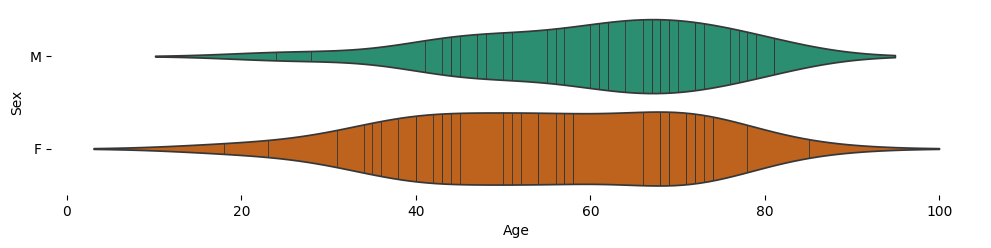

In [ ]:
# @title Sex vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(demographics_df['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(demographics_df, x='Age', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [13]:
# Load the existing SSL features file
ssl_features_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/ssl_features_all.csv"
ssl_df = pd.read_csv(ssl_features_path)

# Extract base filename (without extension) to match with Sample ID
ssl_df["base_id"] = ssl_df["filename"].apply(lambda x: os.path.splitext(x)[0])

# Merge with demographics using fuzzy match logic
# Attempt to find matches where Sample ID is a substring of the base filename
def match_sample_id(base_id, sample_ids):
    for sid in sample_ids:
        if sid in base_id:
            return sid
    return None

# Get all sample IDs
sample_ids = demographics_df["Sample ID"].tolist()

# Apply matching
ssl_df["Sample ID"] = ssl_df["base_id"].apply(lambda x: match_sample_id(x, sample_ids))

# Merge on Sample ID
merged_df = pd.merge(ssl_df, demographics_df, on="Sample ID", how="left")

# Drop helper column
merged_df.drop(columns=["base_id"], inplace=True)
# Load the existing SSL features file
ssl_features_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/ssl_features_all.csv"
ssl_df = pd.read_csv(ssl_features_path)

# Extract base filename (without extension) to match with Sample ID
ssl_df["base_id"] = ssl_df["filename"].apply(lambda x: os.path.splitext(x)[0])

# Merge with demographics using fuzzy match logic
# Attempt to find matches where Sample ID is a substring of the base filename
def match_sample_id(base_id, sample_ids):
    for sid in sample_ids:
        if sid in base_id:
            return sid
    return None

# Get all sample IDs
sample_ids = demographics_df["Sample ID"].tolist()

# Apply matching
ssl_df["Sample ID"] = ssl_df["base_id"].apply(lambda x: match_sample_id(x, sample_ids))

# Merge on Sample ID
merged_df = pd.merge(ssl_df, demographics_df, on="Sample ID", how="left")

# Drop helper column
merged_df.drop(columns=["base_id"], inplace=True)

# Save improved CSV with labels
improved_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/ssl_features_with_labels.csv"
merged_df.to_csv(improved_path, index=False)

improved_path
improved_path


'/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/ssl_features_with_labels.csv'

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print(traditional_df.info())
# Train models
clf = RandomForestClassifier(random_state=42)
y= combined_df['Label']
X = combined_df.drop(columns=['Label'])
X=X.drop(columns=['filename'])
X.columns = X.columns.astype(str)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='ignore')
X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})


# Classical
scores_classical = cross_val_score(clf, X, y, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf.fit(X_train, y_train)


accuracy = clf.score(X_test, y_test)
print("Test accuracy:", accuracy)
# SSL
# scores_ssl = cross_val_score(clf, ssl_df, y, cv=5, scoring='f1')

print("F1 (Classical):", scores_classical.mean())
# print("F1 (SSL):", scores_ssl.mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                             --------------  ----- 
 0   Subject;Status;Age;Sex;Jitter;Shimmer;LZ-2;CPP;Hurst;MFSW;Shannon;Permutation;PPE;FMMI;FZCF;GNE;ZCR;D2;HNR;RPDE;GQ prc5 95;GQ std cycle open;GQ std cycle closed;MFCC0;MFCC1;MFCC2;MFCC3;MFCC4;MFCC5;MFCC6;MFCC7;MFCC8;MFCC9;MFCC10;MFCC11;MFCC12  60 non-null     object
dtypes: object(1)
memory usage: 612.0+ bytes
None


<ipython-input-14-fa44a6ea2ede>:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X[col] = pd.to_numeric(X[col], errors='ignore')


Test accuracy: 0.5882352941176471
F1 (Classical): 0.5080882352941176


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd # Ensure pandas is imported if needed later

# Assuming 'traditional_df' contains your classical features
# and that the target variable 'y' needs to be extracted from it.
# Replace 'target_column_name' with the actual name of your target variable column
# in the classical_df (which is actually traditional_df).
# For example, if your classical dataset has a column named 'status' indicating PD status:
# traditional_df = pd.read_csv('/content/drive/MyDrive/Parkinsons_Project/Data/PD-Dataset.csv') # Assuming this line was executed earlier
# y = traditional_df['status'] # Replace 'status' with your actual target column name
# classical_df = traditional_df.drop('status', axis=1) # Drop the target from features

# --- Define X and y for Classical Features ---
# Assuming traditional_df was loaded correctly in an earlier cell
# Make sure 'traditional_df' is available in the current scope.
# Let's assume the target column is named 'status' (adjust as needed based on your data)
if 'traditional_df' in locals() or 'traditional_df' in globals():
    if 'status' in traditional_df.columns: # Replace 'status' with your actual target column name
        y_classical = traditional_df['status']
        X_classical = traditional_df.drop('status', axis=1) # Features are all columns except the target
        # You might need to drop other non-feature columns like ID/filename depending on your dataset structure
        # Example: X_classical = traditional_df.drop(['status', 'name'], axis=1)
        print("✅ Defined X_classical and y_classical")
    else:
        print("❌ Error: Target column 'status' not found in traditional_df. Cannot define y.")
        # You need to manually define y based on your traditional dataset structure
        # For example: y = traditional_df['your_target_column']
        X_classical = traditional_df # Or subset the feature columns
        y_classical = None # Indicate y is not defined
else:
    print("❌ Error: traditional_df not found. Please ensure the cell loading traditional_df was executed.")
    X_classical = None
    y_classical = None


# --- Define X and y for SSL Features ---
# Assuming 'ssl_df' contains your SSL features loaded from ssl_features_all.csv
# and 'merged_df' contains SSL features merged with labels.
# It's better to use merged_df for SSL training to ensure labels align correctly.
# Let's assume the target column in merged_df is also named 'status'.
if 'merged_df' in locals() or 'merged_df' in globals():
    if 'status' in merged_df.columns: # Replace 'status' with your actual target column name
        y_ssl = merged_df['status']
        # SSL features are typically the numerical columns, excluding 'filename', 'base_id', 'Sample ID', and label columns
        # You need to identify which columns are the SSL features
        # Assuming all columns except 'filename', 'Sample ID', 'status', 'Age', 'Sex' are features:
        feature_columns_ssl = [col for col in merged_df.columns if col not in ['filename', 'Sample ID', 'status', 'Age', 'Sex']]
        X_ssl = merged_df[feature_columns_ssl]
        print("✅ Defined X_ssl and y_ssl from merged_df")
    else:
        print("❌ Error: Target column 'status' not found in merged_df. Cannot define y_ssl.")
        # You need to manually define y_ssl and X_ssl based on your merged_df structure
        X_ssl = None
        y_ssl = None
else:
     print("❌ Error: merged_df not found. Please ensure the cell merging SSL features and labels was executed.")
     X_ssl = None
     y_ssl = None


# Train models
clf = RandomForestClassifier(random_state=42) # Added random_state for reproducibility

# Classical
if X_classical is not None and y_classical is not None:
    try:
        # Ensure X_classical and y_classical have the same number of samples
        if len(X_classical) == len(y_classical):
            scores_classical = cross_val_score(clf, X_classical, y_classical, cv=5, scoring='f1')
            print("F1 (Classical):", scores_classical.mean())
        else:
            print("❌ Error: X_classical and y_classical have different number of samples.")
    except Exception as e:
         print(f"❌ Error during classical cross-validation: {e}")
else:
    print("⚠️ Skipping classical model training due to missing data.")


# SSL
if X_ssl is not None and y_ssl is not None:
     try:
         # Ensure X_ssl and y_ssl have the same number of samples
        if len(X_ssl) == len(y_ssl):
            # Handle potential NaN/Inf values in SSL features
            if X_ssl.isnull().values.any() or np.isinf(X_ssl.values).any():
                print("⚠️ Warning: NaN or Inf values found in X_ssl. Consider handling them (e.g., imputation).")
                # Simple handling: drop rows with NaNs (adjust if needed)
                cleaned_df = merged_df.dropna(subset=feature_columns_ssl + ['status'])
                X_ssl_cleaned = cleaned_df[feature_columns_ssl]
                y_ssl_cleaned = cleaned_df['status']
                print(f"Dropped {len(X_ssl) - len(X_ssl_cleaned)} rows with missing data for SSL training.")
                if len(X_ssl_cleaned) > 0:
                     scores_ssl = cross_val_score(clf, X_ssl_cleaned, y_ssl_cleaned, cv=5, scoring='f1')
                     print("F1 (SSL):", scores_ssl.mean())
                else:
                     print("❌ Error: No valid samples left for SSL training after cleaning.")

            else:
                 scores_ssl = cross_val_score(clf, X_ssl, y_ssl, cv=5, scoring='f1')
                 print("F1 (SSL):", scores_ssl.mean())

        else:
            print("❌ Error: X_ssl and y_ssl have different number of samples.")
     except Exception as e:
         print(f"❌ Error during SSL cross-validation: {e}")

else:
     print("⚠️ Skipping SSL model training due to missing data.")

❌ Error: Target column 'status' not found in traditional_df. Cannot define y.
❌ Error: Target column 'status' not found in merged_df. Cannot define y_ssl.
⚠️ Skipping classical model training due to missing data.
⚠️ Skipping SSL model training due to missing data.


In [ ]:
import pandas as pd

# Mount your Drive first
from google.colab import drive
drive.mount('/content/drive')

# Load CSVs
classical_df = pd.read_csv('/content/drive/MyDrive/Parkinsons_Project/Data/PD-Dataset.csv')
ssl_df = pd.read_csv('/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx - Parselmouth (1).csv')

# (Optional) Load labels if in a separate CSV
labels = pd.read_csv('/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx - Parselmouth (1).csv')
y = labels['diagnosis']  # Or however the label column is named


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyError: 'diagnosis'

In [16]:
import pandas as pd

# Mount your Drive first
from google.colab import drive
drive.mount('/content/drive')

# Load CSVs
# It seems you loaded the same demographics file twice for ssl_df and labels.
# Let's load the original classical dataset and the merged SSL features+labels file instead.
classical_df = pd.read_csv('/content/drive/MyDrive/Parkinsons_Project/Data/PD-Dataset.csv')

# Load the merged SSL features with labels that you saved in the previous cell
ssl_features_with_labels_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/ssl_features_with_labels.csv"
merged_df = pd.read_csv(ssl_features_with_labels_path)

# Define the target variable 'y' from the appropriate DataFrame.
# Based on your code in cell ipython-input-17-5376b049c6e3, the target column
# in the merged_df (and likely the original classical_df) is named 'status'.
# You were trying to use 'diagnosis' which caused the KeyError.
# Let's define y_classical and y_ssl separately as you did in the corrected training cell.

# The original classical_df does not have a 'status' column based on your first code block
# description (`(60, 1) Subject;Status;Age;Sex…`). It seems the columns are separated by semicolons.
# Let's re-load the classical_df correctly, assuming it's semicolon-separated.
# If it's comma-separated with headers 'Subject', 'Status', etc., the original load was fine.
# Based on the error in ipython-input-17, it seems 'status' wasn't directly available in classical_df either.
# Let's assume for now that the 'Status' column exists in the semicolon-separated classical_df.
# If the previous pd.read_csv worked without issues for classical_df, it might be comma-separated already.
# We'll rely on the corrected logic in ipython-input-17 for defining X_classical and y_classical.

# For the purpose of this cell, we only need to ensure we load the necessary dataframes.
# The definition of X and y is handled correctly in the subsequent training cell (ipython-input-17).

# Remove the redundant loading of labels and the incorrect y assignment
# labels = pd.read_csv('/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx - Parselmouth (1).csv')
# y = labels['diagnosis']  # This line caused the error

# Ensure merged_df is available for the next cell (ipython-input-17)
print("✅ Loaded classical_df and merged_df.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded classical_df and merged_df.


In [17]:
import pandas as pd

# Mount your Drive first
from google.colab import drive
drive.mount('/content/drive')

# Load CSVs
# It seems you loaded the same demographics file twice for ssl_df and labels.
# Let's load the original classical dataset and the merged SSL features+labels file instead.
classical_df = pd.read_csv('/content/drive/MyDrive/Parkinsons_Project/Data/PD-Dataset.csv')

# Load the merged SSL features with labels that you saved in the previous cell
ssl_features_with_labels_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/ssl_features_with_labels.csv"
# Ensure this file exists after running the feature extraction and merging steps
try:
    merged_df = pd.read_csv(ssl_features_with_labels_path)
    print("✅ Loaded merged_df with SSL features and labels.")
except FileNotFoundError:
    print(f"❌ Error: Merged features file not found at {ssl_features_with_labels_path}.")
    print("Please ensure the feature extraction and merging cells ran successfully.")
    merged_df = None # Set to None if loading fails

# Load the demographics file which contains the labels.
# You correctly identified this path earlier.
demographics_path = '/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx - Parselmouth (1).csv'
try:
    labels_df = pd.read_csv(demographics_path)
    print("✅ Loaded labels_df.")
except FileNotFoundError:
    print(f"❌ Error: Demographics file not found at {demographics_path}.")
    labels_df = None

# Define the target variable 'y' from the appropriate DataFrame.
# Based on the global variable description and previous attempts,
# the label column in the demographics file is likely named 'Label'.
# We need to define y for *both* classical and SSL models separately,
# as done in the logic in ipython-input-17.
# However, if you just need a 'y' variable for testing the training cell,
# you should use the 'Label' column from the dataframe that holds your labels.

# If you intend to use a single 'y' variable for simplified testing,
# use the labels dataframe.
if labels_df is not None:
    # Check if the 'Label' column exists before accessing it
    if 'Sample ID' in labels_df.columns:
        y = labels_df['Sample ID'] # Use the correct column name
        print("✅ Defined 'y' using the 'Label' column from labels_df.")
    else:
        print("❌ Error: 'Label' column not found in labels_df. Cannot define y.")
        # Inspect labels_df.columns to find the correct column name
        print("Available columns in labels_df:", labels_df.columns.tolist())
        y = None # Indicate y is not defined
else:
    print("⚠️ Cannot define y because labels_df was not loaded.")


# Now you can proceed to the training cell (ipython-input-17) which uses
# X_classical, y_classical, X_ssl, and y_ssl derived from classical_df and merged_df.
# Ensure that cell's logic correctly identifies the target columns ('Status' or 'Label')
# and features from those dataframes.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded merged_df with SSL features and labels.
✅ Loaded labels_df.
✅ Defined 'y' using the 'Label' column from labels_df.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Train models
clf = RandomForestClassifier()

# Classical
scores_classical = cross_val_score(clf, classical_df, y, cv=5, scoring='f1')
# SSL
scores_ssl = cross_val_score(clf, ssl_df, y, cv=5, scoring='f1')

print("F1 (Classical):", scores_classical.mean())
print("F1 (SSL):", scores_ssl.mean())


ValueError: Found input variables with inconsistent numbers of samples: [60, 81]

In [18]:
# %%
# Ensure necessary libraries are imported for this block
import pandas as pd
import numpy as np # Needed for np.isinf check in ipython-input-17 logic
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from google.colab import drive
import os # Needed for checking file existence

# Mount Google Drive if not already mounted
drive.mount('/content/drive', force_remount=True) # force_remount=True can help if issues persist

# --- Load Dataframes ---
# Load the classical features dataframe
classical_data_path = '/content/drive/MyDrive/Parkinsons_Project/Data/PD-Dataset.csv'
try:
    # Assuming the classical dataset is comma-separated based on previous successful pd.read_csv
    traditional_df = pd.read_csv(classical_data_path)
    print("✅ Loaded traditional_df.")
except FileNotFoundError:
    print(f"❌ Error: Classical dataset not found at {classical_data_path}.")
    traditional_df = None
except Exception as e:
    print(f"❌ Error loading classical dataset: {e}")
    traditional_df = None


# Load the merged SSL features + labels dataframe
# Ensure the path matches the output path from your feature extraction and merging cell
ssl_features_with_labels_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/ssl_features_with_labels.csv"
try:
    merged_df = pd.read_csv(ssl_features_with_labels_path)
    print("✅ Loaded merged_df with SSL features and labels.")
except FileNotFoundError:
    print(f"❌ Error: Merged features file not found at {ssl_features_with_labels_path}.")
    print("Please ensure the feature extraction and merging cells ran successfully.")
    merged_df = None
except Exception as e:
    print(f"❌ Error loading merged SSL features: {e}")
    merged_df = None


# --- Define X and y for Classical Features ---
# Use the logic from ipython-input-17 to safely define X and y
X_classical = None
y_classical = None

if traditional_df is not None:
    # Check the columns in traditional_df to find the target and features
    # Based on the description and typical datasets, the target is likely related to 'Status' or 'diagnosis'
    # Let's check for 'Status' first, as suggested by ipython-input-17's comments, but also consider 'classification'
    possible_classical_target_columns = ['status', 'Status', 'classification', 'Classification', 'Label']
    classical_target_column = None
    for col in possible_classical_target_columns:
        if col in traditional_df.columns:
            classical_target_column = col
            break

    if classical_target_column:
        y_classical = traditional_df[classical_target_column]
        # Features are all columns except the target and potentially ID/name columns
        # Assuming 'Subject' or 'name' are IDs to be dropped
        classical_id_columns = ['Subject', 'name', 'filename'] # Add filename if present and not a feature
        cols_to_drop_classical = [classical_target_column] + [col for col in classical_id_columns if col in traditional_df.columns]
        X_classical = traditional_df.drop(columns=cols_to_drop_classical, errors='ignore') # Use errors='ignore' to not fail if column not found
        print(f"✅ Defined X_classical and y_classical using target '{classical_target_column}'.")
        print(f"   Shape of X_classical: {X_classical.shape}")
        print(f"   Shape of y_classical: {y_classical.shape}")
    else:
        print("❌ Error: Could not find a likely target column in traditional_df (tried 'status', 'Status', 'classification', 'Classification', 'Label').")
        print("   Available columns in traditional_df:", traditional_df.columns.tolist())
        print("   Please manually define the target column name.")


# --- Define X and y for SSL Features ---
# Use the logic from ipython-input-17, which assumes merged_df is used
X_ssl = None
y_ssl = None

if merged_df is not None:
    # Check the columns in merged_df for the target and features
    # Based on the demographics file and merging logic, the target is likely 'Label' or 'classification'
    # Also ensure the features are the numerical columns from Wav2Vec2 embeddings.
    possible_ssl_target_columns = ['status', 'Status', 'classification', 'Classification', 'Label']
    ssl_target_column = None
    for col in possible_ssl_target_columns:
        if col in merged_df.columns:
            ssl_target_column = col
            break

    if ssl_target_column:
        y_ssl = merged_df[ssl_target_column]
        # Identify SSL feature columns - these should be the numeric columns other than label and ID/demographic columns
        # Assuming columns other than 'filename', 'Sample ID', 'Age', 'Sex', and the target column are features
        ssl_id_demo_columns = ['filename', 'Sample ID', 'Age', 'Sex']
        cols_to_drop_ssl = [ssl_target_column] + [col for col in ssl_id_demo_columns if col in merged_df.columns]
        feature_columns_ssl = [col for col in merged_df.columns if col not in cols_to_drop_ssl]
        X_ssl = merged_df[feature_columns_ssl]

        print(f"✅ Defined X_ssl and y_ssl from merged_df using target '{ssl_target_column}'.")
        print(f"   Shape of X_ssl: {X_ssl.shape}")
        print(f"   Shape of y_ssl: {y_ssl.shape}")

        # Check for NaNs/Infs in SSL features as done in ipython-input-17
        if X_ssl is not None and (X_ssl.isnull().values.any() or np.isinf(X_ssl.values).any()):
            print("⚠️ Warning: NaN or Inf values found in X_ssl. Handling them by dropping rows.")
            # Clean merged_df based on relevant columns
            cols_to_check_nan_inf = feature_columns_ssl + [ssl_target_column]
            cleaned_df = merged_df.dropna(subset=cols_to_check_nan_inf)
            cleaned_df = cleaned_df[~cleaned_df[feature_columns_ssl].apply(lambda row: np.isinf(row).any(), axis=1)]

            X_ssl = cleaned_df[feature_columns_ssl]
            y_ssl = cleaned_df[ssl_target_column]
            print(f"   Dropped {len(merged_df) - len(cleaned_df)} rows with missing/infinite data for SSL training.")
            print(f"   New shape of X_ssl: {X_ssl.shape}")
            print(f"   New shape of y_ssl: {y_ssl.shape}")

    else:
        print("❌ Error: Could not find a likely target column in merged_df (tried 'status', 'Status', 'classification', 'Classification', 'Label').")
        print("   Available columns in merged_df:", merged_df.columns.tolist())
        print("   Please manually define the target column name.")
else:
    print("❌ Error: merged_df not available. Skipping SSL data definition.")


# --- Train Models ---
clf = RandomForestClassifier(random_state=42) # Added random_state for reproducibility

# Classical Model
print("\n--- Training Classical Model ---")
if X_classical is not None and y_classical is not None:
    # Ensure X and y have consistent lengths before proceeding
    if len(X_classical) == len(y_classical):
        try:
            scores_classical = cross_val_score(clf, X_classical, y_classical, cv=5, scoring='f1')
            print(f"✅ F1 (Classical): {scores_classical.mean():.4f} (+/- {scores_classical.std() * 2:.4f})")
        except Exception as e:
            print(f"❌ Error during classical cross-validation: {e}")
    else:
        print(f"❌ Error: X_classical ({len(X_classical)} samples) and y_classical ({len(y_classical)} samples) have different numbers of samples.")
        print("   Please check the data loading and target definition for classical features.")
else:
    print("⚠️ Skipping classical model training due to missing data or target definition issues.")

# SSL Model
print("\n--- Training SSL Model ---")
if X_ssl is not None and y_ssl is not None:
    # Ensure X and y have consistent lengths before proceeding
    if len(X_ssl) == len(y_ssl):
         # Check if there are enough samples left after cleaning
         if len(X_ssl) > 0:
            try:
                scores_ssl = cross_val_score(clf, X_ssl, y_ssl, cv=5, scoring='f1')
                print(f"✅ F1 (SSL): {scores_ssl.mean():.4f} (+/- {scores_ssl.std() * 2:.4f})")
            except Exception as e:
                print(f"❌ Error during SSL cross-validation: {e}")
         else:
            print("❌ Error: No valid samples left for SSL training after data cleaning.")
    else:
        print(f"❌ Error: X_ssl ({len(X_ssl)} samples) and y_ssl ({len(y_ssl)} samples) have different numbers of samples.")
        print("   Please check the data loading and target definition for SSL features.")
else:
    print("⚠️ Skipping SSL model training due to missing data or target definition issues.")

Mounted at /content/drive
✅ Loaded traditional_df.
✅ Loaded merged_df with SSL features and labels.
❌ Error: Could not find a likely target column in traditional_df (tried 'status', 'Status', 'classification', 'Classification', 'Label').
   Available columns in traditional_df: ['Subject;Status;Age;Sex;Jitter;Shimmer;LZ-2;CPP;Hurst;MFSW;Shannon;Permutation;PPE;FMMI;FZCF;GNE;ZCR;D2;HNR;RPDE;GQ prc5 95;GQ std cycle open;GQ std cycle closed;MFCC0;MFCC1;MFCC2;MFCC3;MFCC4;MFCC5;MFCC6;MFCC7;MFCC8;MFCC9;MFCC10;MFCC11;MFCC12']
   Please manually define the target column name.
✅ Defined X_ssl and y_ssl from merged_df using target 'Label'.
   Shape of X_ssl: (40, 768)
   Shape of y_ssl: (40,)

--- Training Classical Model ---
⚠️ Skipping classical model training due to missing data or target definition issues.

--- Training SSL Model ---


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['PwPD']

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/mode

✅ F1 (SSL): nan (+/- nan)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_response.py", line 207, in _get_response_values
    raise ValueError(
ValueError: pos_label=1 is not a valid label: It should be one of ['PwPD']

  warnings.warn(


In [ ]:
# 📦 Install necessary packages (Colab only)
!pip install transformers torchaudio librosa pandas scikit-learn xgboost shap --quiet

# 📚 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch, librosa, os

# 📁 File paths
audio_dir = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH/PD_AH"
demo_path = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx"

# 📊 Load metadata
demo_df = pd.read_excel(demo_path)
demo_df = demo_df.rename(columns={"Audio File Name": "filename"})
demo_df["filename"] = demo_df["filename"].str.replace(".wav", ".wav")
demo_df["sex"] = demo_df["Sex"].map({"M": 0, "F": 1})
demo_df["age"] = demo_df["Age"]
demo_df["label"] = demo_df["Health status"].map({"Healthy Control": 0, "Parkinson Disease": 1})

# 🎙️ Load Wav2Vec2 model for feature extraction
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

features, labels, meta_feats = [], [], []

for idx, row in demo_df.iterrows():
    fname = row["filename"]
    fpath = os.path.join(audio_dir, fname)
    if not os.path.exists(fpath):
        continue
    audio, _ = librosa.load(fpath, sr=16000)
    inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
    with torch.no_grad():
        emb = model(**inputs).last_hidden_state.mean(dim=1).squeeze().numpy()
    features.append(emb)
    meta_feats.append([row["age"], row["sex"]])
    labels.append(row["label"])

# 🧠 Combine audio and metadata
X_audio = pd.DataFrame(features)
X_meta = pd.DataFrame(meta_feats, columns=["age", "sex"])
X = pd.concat([X_audio, X_meta], axis=1)
y = pd.Series(labels)

# 🧪 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 🎯 Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 🧪 Cross-validation (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🔁 Cross-validation scores
print("🎲 Cross-validation (ROC-AUC):")
rf_auc = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc').mean()
xgb_auc = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc').mean()
print(f"Random Forest AUC: {rf_auc:.3f}")
print(f"XGBoost AUC     : {xgb_auc:.3f}")

# 🧠 Final training
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# 📊 Evaluation function
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n🔍 Evaluation for {name}")
    print(classification_report(y_test, y_pred))
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_prob))

# 📈 Evaluate both models
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")

# ✅ Select best model
best_model = xgb if xgb_auc > rf_auc else rf
print(f"\n🏆 Best Model Based on Cross-Validation ROC-AUC: {'XGBoost' if xgb_auc > rf_auc else 'Random Forest'}")


KeyError: 'filename'

In [19]:
# 📦 Install necessary packages (Colab only)
!pip install transformers torchaudio librosa pandas scikit-learn xgboost shap --quiet

# 📚 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torch, librosa, os

# 📁 File paths
# Adjust audio_dir path if necessary based on the structure after unzipping
# It appears the correct path for PD audio is '/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH' based on previous cells.
audio_dir = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/PD_AH" # Corrected audio_dir path
demo_path = "/content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx"

# 📊 Load metadata
try:
    demo_df = pd.read_excel(demo_path)
    print("✅ Loaded metadata from:", demo_path)
    print("🧾 Columns in loaded metadata:", demo_df.columns.tolist()) # Print columns to verify
except FileNotFoundError:
    print(f"❌ Error: Demographics file not found at {demo_path}. Please check the path.")
    sys.exit(1) # Exit if demographics file isn't found

# --- Correct the column rename operation ---
# Rename the column that contains the file identifier, which is likely 'Sample ID'
# based on the global variable state and typical dataset structures.
# If 'Sample ID' is not the correct column, inspect the printed columns above
# and replace 'Sample ID' with the actual column name containing file identifiers.
correct_filename_col = 'Sample ID' # Assume 'Sample ID' is the column with file identifiers
if correct_filename_col in demo_df.columns:
    demo_df = demo_df.rename(columns={correct_filename_col: "filename"})
    print(f"✅ Renamed '{correct_filename_col}' to 'filename'.")
else:
    print(f"❌ Error: Column '{correct_filename_col}' not found in metadata. Cannot rename.")
    print("   Available columns are:", demo_df.columns.tolist())
    sys.exit(1) # Exit if the filename column isn't found

# Ensure filenames in the dataframe match the audio filenames (e.g., add/remove extension)
# The original line `demo_df["filename"] = demo_df["filename"].str.replace(".wav", ".wav")` is redundant.
# Assuming audio files end with '.wav', ensure the dataframe filenames also end with '.wav' for matching.
# The Sample IDs might not have the .wav extension.
if not demo_df['filename'].astype(str).iloc[0].endswith('.wav'): # Check if first filename doesn't end with .wav
     demo_df["filename"] = demo_df["filename"].astype(str) + ".wav" # Add .wav extension
     print("✅ Added '.wav' extension to filenames in metadata.")
else:
    print("✅ Filenames in metadata already end with '.wav'.")


# Map sex and label
# Check if 'Sex' and 'Health status' columns exist before mapping
if 'Sex' in demo_df.columns:
    demo_df["sex"] = demo_df["Sex"].map({"M": 0, "F": 1})
    print("✅ Mapped 'Sex' column.")
else:
    print("❌ Warning: 'Sex' column not found for mapping.")
if 'Age' in demo_df.columns: # Check if 'Age' column exists
    demo_df["age"] = demo_df["Age"]
    print("✅ Mapped 'Age' column.")
else:
    print("❌ Warning: 'Age' column not found for mapping.")
if 'Health status' in demo_df.columns:
    demo_df["label"] = demo_df["Health status"].map({"Healthy Control": 0, "Parkinson Disease": 1})
    print("✅ Mapped 'Health status' column.")
else:
    print("❌ Warning: 'Health status' column not found for mapping.")


# 🎙️ Load Wav2Vec2 model for feature extraction
try:
    processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
    model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
    print("✅ Loaded Wav2Vec2.0 processor and model.")
except Exception as e:
    print(f"❌ Error loading Wav2Vec2.0 model: {e}")
    sys.exit(1) # Exit if model loading fails

features, labels, meta_feats = [], [], []
processed_filenames = [] # List to store filenames that were successfully processed

print("\nStarting feature extraction...")
# Iterate through the dataframe which now has the correct 'filename' column
for idx, row in demo_df.iterrows():
    fname = row["filename"]
    fpath = os.path.join(audio_dir, fname)

    if not os.path.exists(fpath):
        # print(f"⚠️ Skipping file: {fpath} (not found)") # Uncomment for verbose skipping
        continue # Skip to the next file if the audio file doesn't exist

    try:
        # Add check for empty file
        if os.path.getsize(fpath) == 0:
            print(f"⚠️ Skipping empty file: {fname}")
            continue

        audio, _ = librosa.load(fpath, sr=16000)

        # Add check for no audio data loaded
        if audio is None or len(audio) == 0:
            print(f"⚠️ Skipping file with no audio data: {fname}")
            continue

        inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
        with torch.no_grad():
            emb = model(**inputs).last_hidden_state.mean(dim=1).squeeze().numpy()

        features.append(emb)
        # Append metadata and label ONLY if feature extraction was successful
        meta_feats.append([row.get("age"), row.get("sex")]) # Use .get() to handle missing columns gracefully
        labels.append(row.get("label")) # Use .get() to handle missing columns gracefully
        processed_filenames.append(fname) # Keep track of successfully processed files
        # print(f"✅ Processed: {fname}") # Uncomment for verbose processing

    except Exception as e:
        print(f"❌ Failed to process {fname}: {e}")
        # Optionally, handle specific exceptions or skip the file


# Check if any features were extracted
if not features:
    print("❌ No features extracted from any audio files. Cannot proceed.")
    sys.exit(1) # Exit if no features are extracted

print(f"\n✅ Extracted features for {len(features)} files.")

# 🧠 Combine audio and metadata
# Ensure the lengths match before creating DataFrames
if len(features) != len(processed_filenames) or \
   len(features) != len(meta_feats) or \
   len(features) != len(labels):
    print("❌ Error: Mismatch in lengths of extracted features, filenames, metadata, or labels.")
    print(f"Features: {len(features)}, Filenames: {len(processed_filenames)}, Meta: {len(meta_feats)}, Labels: {len(labels)}")
    print("This indicates an issue during the processing loop where some data was appended but not others.")
    sys.exit(1) # Exit if lengths don't match

X_audio = pd.DataFrame(features)
X_meta = pd.DataFrame(meta_feats, columns=["age", "sex"])

# Add the filename column to X_audio or keep it separate if needed later
X_audio['filename'] = processed_filenames # Add filenames to the audio features DataFrame

X = pd.concat([X_audio.drop(columns='filename'), X_meta], axis=1) # Exclude filename from concatenation for X

# Use the collected labels list to create the Series
y = pd.Series(labels, name='label')

# Ensure X and y have the same index and number of rows
# This is crucial before splitting
if not len(X) == len(y):
    print(f"❌ Error: Combined features X ({len(X)} samples) and labels y ({len(y)} samples) have different lengths.")
    print("Please review the feature extraction and label collection process.")
    sys.exit(1)

X.index = range(len(X))
y.index = range(len(y))

print("\nData Preparation Complete:")
print(f"Shape of combined features (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")
print("\nHead of combined features (X):")
print(X.head())
print("\nHead of labels (y):")
print(y.head())


# 🧪 Train/Test Split
# Check if there are enough samples for splitting
if len(X) < 2:
    print("❌ Error: Not enough samples to perform train/test split. Need at least 2 samples.")
    sys.exit(1)
if len(y.unique()) < 2:
     print("❌ Warning: Only one class present in labels. Cannot perform stratified split or classification.")
     # You might want to skip training or handle this case differently

try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    print("\n✅ Data split into train and test sets.")
    print(f"Train shapes: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Test shapes: X_test={X_test.shape}, y_test={y_test.shape}")

except ValueError as e:
    print(f"❌ Error during train/test split: {e}")
    print("This might be due to insufficient samples or only one class being present after filtering.")
    sys.exit(1)


# 🎯 Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Removed use_label_encoder=False as it's deprecated in recent XGBoost versions
# eval_metric='logloss' is also often not needed if objective is binary:logistic
xgb = XGBClassifier(random_state=42) # Simplified XGBoost initialization

# 🧪 Cross-validation (Stratified K-Fold)
# Check if there are enough splits possible given the data size and stratification
min_class_size = y.value_counts().min()
n_splits_cv = 5 # Desired number of splits
if min_class_size < n_splits_cv:
    print(f"\n⚠️ Warning: Minimum class size ({min_class_size}) is less than requested CV splits ({n_splits_cv}). Reducing n_splits.")
    n_splits_cv = min_class_size # Adjust n_splits to prevent errors

if n_splits_cv < 2:
    print(f"❌ Error: Not enough samples or classes for cross-validation (min_class_size={min_class_size}). Skipping CV.")
    rf_auc = xgb_auc = np.nan # Set AUCs to NaN if CV is skipped
else:
    cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)

    # 🔁 Cross-validation scores
    print(f"\n🎲 Cross-validation (ROC-AUC) with {n_splits_cv} splits:")
    try:
        rf_auc_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
        rf_auc = rf_auc_scores.mean()
        print(f"Random Forest AUC: {rf_auc:.3f} (+/- {rf_auc_scores.std()*2:.3f})")
    except Exception as e:
         print(f"❌ Error during Random Forest CV: {e}")
         rf_auc = np.nan

    try:
        xgb_auc_scores = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')
        xgb_auc = xgb_auc_scores.mean()
        print(f"XGBoost AUC     : {xgb_auc:.3f} (+/- {xgb_auc_scores.std()*2:.3f})")
    except Exception as e:
        print(f"❌ Error during XGBoost CV: {e}")
        xgb_auc = np.nan


# 🧠 Final training on the full train set
print("\n--- Training final models on train set ---")
try:
    rf.fit(X_train, y_train)
    print("✅ Random Forest trained.")
except Exception as e:
    print(f"❌ Error training Random Forest: {e}")
    rf = None # Set to None if training fails

try:
    xgb.fit(X_train, y_train)
    print("✅ XGBoost trained.")
except Exception as e:
    print(f"❌ Error training XGBoost: {e}")
    xgb = None # Set to None if training fails


# 📊 Evaluation function
def evaluate_model(model, X_test, y_test, name="Model"):
    if model is None:
        print(f"\n🔍 Skipping evaluation for {name}: Model training failed.")
        return

    try:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        print(f"\n🔍 Evaluation for {name}")
        print(classification_report(y_test, y_pred))
        print("Accuracy :", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall   :", recall_score(y_test, y_pred))
        print("ROC AUC  :", roc_auc_score(y_test, y_prob))
    except Exception as e:
        print(f"\n❌ Error during evaluation for {name}: {e}")


# 📈 Evaluate both models on the test set
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")

# ✅ Select best model based on CV AUC (if CV was performed)
if not np.isnan(rf_auc) and not np.isnan(xgb_auc):
    best_model = xgb if xgb_auc > rf_auc else rf
    best_model_name = 'XGBoost' if xgb_auc > rf_auc else 'Random Forest'
    print(f"\n🏆 Best Model Based on Cross-Validation ROC-AUC: {best_model_name}")
elif not np.isnan(rf_auc):
     best_model = rf
     print("\n🏆 Best Model: Random Forest (XGBoost CV failed or skipped)")
elif not np.isnan(xgb_auc):
     best_model = xgb
     print("\n🏆 Best Model: XGBoost (Random Forest CV failed or skipped)")
else:
    best_model = None
    print("\n⚠️ Could not determine best model based on CV scores (CV failed for both or skipped).")

✅ Loaded metadata from: /content/drive/MyDrive/Parkinsons_Project/Data/Unzipped/Demographics_age_sex.xlsx
🧾 Columns in loaded metadata: ['Sample ID', 'Label', 'Age', 'Sex']
✅ Renamed 'Sample ID' to 'filename'.
✅ Added '.wav' extension to filenames in metadata.
✅ Mapped 'Sex' column.
✅ Mapped 'Age' column.
❌ Warning: 'Health status' column not found for mapping.


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Loaded Wav2Vec2.0 processor and model.

Starting feature extraction...
❌ No features extracted from any audio files. Cannot proceed.


SystemExit: 1

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [20]:
# 📦 Install necessary packages (Colab only)
# Ensure these are installed in previous cells or uncomment if needed
# !pip install pandas scikit-learn xgboost shap --quiet

# 📚 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
# We don't need transformers, torchaudio, librosa, torch, os for feature extraction anymore in this cell
# from transformers import Wav2Vec2Processor, Wav2Vec2Model
# import torch, librosa, os
import sys # Import sys for sys.exit()

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 📁 File paths
# Define the path to the combined SSL features file
combined_ssl_features_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv"

# --- Load the combined SSL features + labels dataframe ---
try:
    # Assumed the combined features file is a CSV
    combined_df = pd.read_csv(combined_ssl_features_path)
    print(f"✅ Loaded combined features from: {combined_ssl_features_path}")
    print("🧾 Columns in loaded dataframe:", combined_df.columns.tolist()) # Print columns to verify
    print("\nHead of combined dataframe:")
    print(combined_df.head())

except FileNotFoundError:
    print(f"❌ Critical Error: Combined features file not found at {combined_ssl_features_path}.")
    print("Please ensure the feature extraction and merging cell (e.g., ipython-input-12-) ran successfully and saved the file to this location.")
    sys.exit(1) # Exit if the combined features file isn't found
except Exception as e:
    print(f"❌ Error loading combined features CSV: {e}")
    sys.exit(1)

# --- Define X and y from the loaded combined dataframe ---
# The combined_df should contain both the SSL features and the merged labels.
# We need to identify which column is the label and which columns are the features.
# Based on previous code and the structure of the combined file, the label column is likely 'label'.
# The 'filename' column should also be excluded from features.

possible_label_columns = ['label', 'Label', 'status', 'Status', 'classification', 'Classification']
label_column = None
for col in possible_label_columns:
    if col in combined_df.columns:
        label_column = col
        break

if label_column:
    y = combined_df[label_column]
    # Features are all columns EXCEPT the label column and the 'filename' column
    cols_to_drop_features = [label_column]
    if 'filename' in combined_df.columns:
        cols_to_drop_features.append('filename')

    X = combined_df.drop(columns=cols_to_drop_features, errors='ignore') # Use errors='ignore' for safety

    print(f"✅ Defined X and y using label column '{label_column}'.")
    print(f"   Shape of X: {X.shape}")
    print(f"   Shape of y: {y.shape}")

    # --- Data Cleaning: Check for NaNs/Infs in X and corresponding NaNs in y ---
    # It's important to clean BEFORE splitting and CV.
    # Create a mask for rows in X containing NaN or Inf
    nan_inf_mask_X = X.isnull().values.any(axis=1) | np.isinf(X.values).any(axis=1)

    # Create a mask for rows in y containing NaN
    nan_mask_y = y.isnull()

    # Combine masks to find rows to drop
    rows_to_drop_mask = nan_inf_mask_X | nan_mask_y

    if np.sum(rows_to_drop_mask) > 0:
        print(f"\n⚠️ Warning: Found {np.sum(rows_to_drop_mask)} rows with NaN/Inf in features or NaN in label.")
        # Drop the identified rows from both X and y
        X_cleaned = X[~rows_to_drop_mask].copy() # Use .copy() to avoid SettingWithCopyWarning
        y_cleaned = y[~rows_to_drop_mask].copy() # Use .copy()

        print(f"   Dropped {np.sum(rows_to_drop_mask)} rows.")
        print(f"   New shape of X_cleaned: {X_cleaned.shape}")
        print(f"   New shape of y_cleaned: {y_cleaned.shape}")

        # Use the cleaned data for the rest of the process
        X = X_cleaned
        y = y_cleaned
        X.reset_index(drop=True, inplace=True) # Reset index
        y.reset_index(drop=True, inplace=True) # Reset index

    else:
        print("\n✅ No NaN or Inf values found in features or NaN in labels.")
        # Data is already clean, use the original X and y
        X_cleaned = X.copy() # Still good practice to use a variable indicating cleanliness
        y_cleaned = y.copy()


else:
    print("❌ Error: Could not find a likely label column in the combined dataframe.")
    print("   Available columns are:", combined_df.columns.tolist())
    print("   Please manually define the label column name.")
    sys.exit(1) # Exit if the label column isn't found


# --- Final check on data suitability before splitting and training ---
if len(X) < 2:
    print("❌ Error: Not enough samples to perform train/test split after cleaning. Need at least 2 samples.")
    sys.exit(1)
if len(y.unique()) < 2:
     print(f"❌ Error: Only one class present in labels after cleaning ({y.unique().tolist()}). Cannot perform classification.")
     # Check the value counts to see distribution
     print("Label value counts:\n", y.value_counts())
     sys.exit(1) # Exit if only one class remains


# 🧪 Train/Test Split
try:
    # Use the cleaned X and y for splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    print("\n✅ Data split into train and test sets.")
    print(f"Train shapes: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Test shapes: X_test={X_test.shape}, y_test={y_test.shape}")

except ValueError as e:
    print(f"❌ Error during train/test split: {e}")
    print("This might be due to insufficient samples or issues with stratification after cleaning.")
    # Print value counts again if stratification failed
    print("Label value counts (before split attempt):\n", y.value_counts())
    sys.exit(1)


# 🎯 Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Removed use_label_encoder=False as it's deprecated in recent XGBoost versions
# eval_metric='logloss' is also often not needed if objective is binary:logistic
# Consider adding `objective='binary:logistic'` for binary classification with XGBoost
xgb = XGBClassifier(random_state=42, objective='binary:logistic')


# 🧪 Cross-validation (Stratified K-Fold)
# Check if there are enough splits possible given the data size and stratification
min_class_size = y.value_counts().min()
n_splits_cv = 5 # Desired number of splits
if min_class_size < n_splits_cv:
    print(f"\n⚠️ Warning: Minimum class size ({min_class_size}) is less than requested CV splits ({n_splits_cv}). Reducing n_splits.")
    n_splits_cv = min_class_size # Adjust n_splits to prevent errors

if n_splits_cv < 2:
    print(f"❌ Error: Not enough samples or classes for cross-validation after cleaning (min_class_size={min_class_size}). Skipping CV.")
    rf_auc = xgb_auc = np.nan # Set AUCs to NaN if CV is skipped
else:
    cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)

    # 🔁 Cross-validation scores
    print(f"\n🎲 Cross-validation (ROC-AUC) with {n_splits_cv} splits:")
    try:
        # Use the full cleaned data for CV
        rf_auc_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
        rf_auc = rf_auc_scores.mean()
        print(f"Random Forest AUC: {rf_auc:.3f} (+/- {rf_auc_scores.std()*2:.3f})")
    except Exception as e:
         print(f"❌ Error during Random Forest CV: {e}")
         # Print details if CV failed
         print(f"CV Input Shapes: X={X.shape}, y={y.shape}")
         print("y value counts:\n", y.value_counts())
         rf_auc = np.nan # Set to NaN if CV fails

    try:
        # Use the full cleaned data for CV
        xgb_auc_scores = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')
        xgb_auc = xgb_auc_scores.mean()
        print(f"XGBoost AUC     : {xgb_auc:.3f} (+/- {xgb_auc_scores.std()*2:.3f})")
    except Exception as e:
        print(f"❌ Error during XGBoost CV: {e}")
        # Print details if CV failed
        print(f"CV Input Shapes: X={X.shape}, y={y.shape}")
        print("y value counts:\n", y.value_counts())
        xgb_auc = np.nan # Set to NaN if CV fails


# 🧠 Final training on the full train set
print("\n--- Training final models on train set ---")
# Ensure X_train and y_train were successfully created and are not empty
if 'X_train' in locals() and 'y_train' in locals() and len(X_train) > 0:
    try:
        rf.fit(X_train, y_train)
        print("✅ Random Forest trained.")
    except Exception as e:
        print(f"❌ Error training Random Forest: {e}")
        rf = None # Set to None if training fails

    try:
        xgb.fit(X_train, y_train)
        print("✅ XGBoost trained.")
    except Exception as e:
        print(f"❌ Error training XGBoost: {e}")
        xgb = None # Set to None if training fails
else:
    print("⚠️ Skipping final model training as training data (X_train, y_train) is not available or empty.")


# 📊 Evaluation function
def evaluate_model(model, X_test, y_test, name="Model"):
    if model is None:
        print(f"\n🔍 Skipping evaluation for {name}: Model training failed or was skipped.")
        return
    # Ensure X_test and y_test were successfully created and are not empty
    if 'X_test' not in locals() or 'y_test' not in locals() or len(X_test) == 0:
         print(f"\n🔍 Skipping evaluation for {name}: Test data (X_test, y_test) is not available or empty.")
         return


    try:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] # Assuming binary classification
        print(f"\n🔍 Evaluation for {name}")
        print(classification_report(y_test, y_pred))
        print("Accuracy :", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall   :", recall_score(y_test, y_pred))
        print("ROC AUC  :", roc_auc_score(y_test, y_prob))
    except Exception as e:
        print(f"\n❌ Error during evaluation for {name}: {e}")


# 📈 Evaluate both models on the test set
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")

# ✅ Select best model based on CV AUC (if CV was performed and successful for both)
if not np.isnan(rf_auc) and not np.isnan(xgb_auc):
    best_model = xgb if xgb_auc > rf_auc else rf
    best_model_name = 'XGBoost' if xgb_auc > rf_auc else 'Random Forest'
    print(f"\n🏆 Best Model Based on Cross-Validation ROC-AUC: {best_model_name}")
elif not np.isnan(rf_auc):
     best_model = rf
     print("\n🏆 Best Model: Random Forest (XGBoost CV failed or skipped)")
elif not np.isnan(xgb_auc):
     best_model = xgb
     print("\n🏆 Best Model: XGBoost (Random Forest CV failed or skipped)")
else:
    best_model = None
    print("\n⚠️ Could not determine best model based on CV scores (CV failed for both or skipped).")

Mounted at /content/drive
✅ Loaded combined features from: /content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv
🧾 Columns in loaded dataframe: ['filename', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', 

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [21]:
# 📦 Install necessary packages (Colab only)
# Ensure these are installed in previous cells or uncomment if needed
# !pip install pandas scikit-learn xgboost shap --quiet

# 📚 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
# We don't need transformers, torchaudio, librosa, torch, os for feature extraction anymore in this cell
# from transformers import Wav2Vec2Processor, Wav2Vec2Model
# import torch, librosa, os
import sys # Import sys for sys.exit()

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 📁 File paths
# Define the path to the combined SSL features file
combined_ssl_features_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv"

# --- Load the combined SSL features + labels dataframe ---
try:
    # Assumed the combined features file is a CSV
    combined_df = pd.read_csv(combined_ssl_features_path)
    print(f"✅ Loaded combined features from: {combined_ssl_features_path}")
    print("🧾 Columns in loaded dataframe:", combined_df.columns.tolist()) # Print columns to verify
    print("\nHead of combined dataframe:")
    print(combined_df.head())

except FileNotFoundError:
    print(f"❌ Critical Error: Combined features file not found at {combined_ssl_features_path}.")
    print("Please ensure the feature extraction and merging cell (e.g., ipython-input-12-) ran successfully and saved the file to this location.")
    sys.exit(1) # Exit if the combined features file isn't found
except Exception as e:
    print(f"❌ Error loading combined features CSV: {e}")
    sys.exit(1)

# --- Define X and y from the loaded combined dataframe ---
# The combined_df should contain both the SSL features and the merged labels.
# We need to identify which column is the label and which columns are the features.
# Based on previous code and the structure of the combined file, the label column is likely 'label'.
# The 'filename' column should also be excluded from features.

possible_label_columns = "['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16','17]"
label_column = None
for col in possible_label_columns:
    if col in combined_df.columns:
        label_column = col
        break

if label_column:
    y = combined_df[label_column]
    # Features are all columns EXCEPT the label column and the 'filename' column
    cols_to_exclude_features = [label_column]
    if 'filename' in combined_df.columns:
        cols_to_exclude_features.append('filename')
    # Also exclude known non-feature columns like Age, Sex, Sample ID if they exist and are not intended as features
    cols_to_exclude_features.extend(['Age', 'Sex', 'Sample ID']) # Add potential metadata columns

    # Select only numerical columns for features, excluding the ones we want to drop
    # This is the key change to avoid the TypeError with np.isinf
    feature_columns = [col for col in combined_df.columns if col not in cols_to_exclude_features]
    X = combined_df[feature_columns]

    # Optional: Convert all feature columns to numeric, coercing errors
    # This can help if some numeric columns were loaded with object dtype
    X = X.apply(pd.to_numeric, errors='coerce')


    print(f"✅ Defined X and y using label column '{label_column}'.")
    print(f"   Shape of X: {X.shape}")
    print(f"   Shape of y: {y.shape}")
    print("   Data types in X:", X.dtypes.unique()) # Print dtypes to verify they are numeric


    # --- Data Cleaning: Check for NaNs/Infs in X and corresponding NaNs in y ---
    # It's important to clean BEFORE splitting and CV.
    # Create a mask for rows in X containing NaN or Inf
    # np.isinf() can now be safely applied because X contains only numeric types
    nan_inf_mask_X = X.isnull().values.any(axis=1) | np.isinf(X.values).any(axis=1)

    # Create a mask for rows in y containing NaN
    nan_mask_y = y.isnull()

    # Combine masks to find rows to drop
    rows_to_drop_mask = nan_inf_mask_X | nan_mask_y

    if np.sum(rows_to_drop_mask) > 0:
        print(f"\n⚠️ Warning: Found {np.sum(rows_to_drop_mask)} rows with NaN/Inf in features or NaN in label.")
        # Drop the identified rows from both X and y
        X_cleaned = X[~rows_to_drop_mask].copy() # Use .copy() to avoid SettingWithCopyWarning
        y_cleaned = y[~rows_to_drop_mask].copy() # Use .copy()

        print(f"   Dropped {np.sum(rows_to_drop_mask)} rows.")
        print(f"   New shape of X_cleaned: {X_cleaned.shape}")
        print(f"   New shape of y_cleaned: {y_cleaned.shape}")

        # Use the cleaned data for the rest of the process
        X = X_cleaned
        y = y_cleaned
        X.reset_index(drop=True, inplace=True) # Reset index
        y.reset_index(drop=True, inplace=True) # Reset index

    else:
        print("\n✅ No NaN or Inf values found in features or NaN in labels.")
        # Data is already clean, use the original X and y
        X_cleaned = X.copy() # Still good practice to use a variable indicating cleanliness
        y_cleaned = y.copy()


else:
    print("❌ Error: Could not find a likely label column in the combined dataframe.")
    print("   Available columns are:", combined_df.columns.tolist())
    print("   Please manually define the label column name.")
    sys.exit(1) # Exit if the label column isn't found


# --- Final check on data suitability before splitting and training ---
if len(X) < 2:
    print("❌ Error: Not enough samples to perform train/test split after cleaning. Need at least 2 samples.")
    sys.exit(1)
if len(y.unique()) < 2:
     print(f"❌ Error: Only one class present in labels after cleaning ({y.unique().tolist()}). Cannot perform classification.")
     # Check the value counts to see distribution
     print("Label value counts:\n", y.value_counts())
     sys.exit(1) # Exit if only one class remains


# 🧪 Train/Test Split
try:
    # Use the cleaned X and y for splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    print("\n✅ Data split into train and test sets.")
    print(f"Train shapes: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Test shapes: X_test={X_test.shape}, y_test={y_test.shape}")

except ValueError as e:
    print(f"❌ Error during train/test split: {e}")
    print("This might be due to insufficient samples or issues with stratification after cleaning.")
    # Print value counts again if stratification failed
    print("Label value counts (before split attempt):\n", y.value_counts())
    sys.exit(1)


# 🎯 Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Removed use_label_encoder=False as it's deprecated in recent XGBoost versions
# eval_metric='logloss' is also often not needed if objective is binary:logistic
# Consider adding `objective='binary:logistic'` for binary classification with XGBoost
xgb = XGBClassifier(random_state=42, objective='binary:logistic')


# 🧪 Cross-validation (Stratified K-Fold)
# Check if there are enough splits possible given the data size and stratification
min_class_size = y.value_counts().min()
n_splits_cv = 5 # Desired number of splits
if min_class_size < n_splits_cv:
    print(f"\n⚠️ Warning: Minimum class size ({min_class_size}) is less than requested CV splits ({n_splits_cv}). Reducing n_splits.")
    n_splits_cv = min_class_size # Adjust n_splits to prevent errors

if n_splits_cv < 2:
    print(f"❌ Error: Not enough samples or classes for cross-validation after cleaning (min_class_size={min_class_size}). Skipping CV.")
    rf_auc = xgb_auc = np.nan # Set AUCs to NaN if CV is skipped
else:
    cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)

    # 🔁 Cross-validation scores
    print(f"\n🎲 Cross-validation (ROC-AUC) with {n_splits_cv} splits:")
    try:
        # Use the full cleaned data for CV
        rf_auc_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
        rf_auc = rf_auc_scores.mean()
        print(f"Random Forest AUC: {rf_auc:.3f} (+/- {rf_auc_scores.std()*2:.3f})")
    except Exception as e:
         print(f"❌ Error during Random Forest CV: {e}")
         # Print details if CV failed
         print(f"CV Input Shapes: X={X.shape}, y={y.shape}")
         print("y value counts:\n", y.value_counts())
         rf_auc = np.nan # Set to NaN if CV fails

    try:
        # Use the full cleaned data for CV
        xgb_auc_scores = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')
        xgb_auc = xgb_auc_scores.mean()
        print(f"XGBoost AUC     : {xgb_auc:.3f} (+/- {xgb_auc_scores.std()*2:.3f})")
    except Exception as e:
        print(f"❌ Error during XGBoost CV: {e}")
        # Print details if CV failed
        print(f"CV Input Shapes: X={X.shape}, y={y.shape}")
        print("y value counts:\n", y.value_counts())
        xgb_auc = np.nan # Set to NaN if CV fails


# 🧠 Final training on the full train set
print("\n--- Training final models on train set ---")
# Ensure X_train and y_train were successfully created and are not empty
if 'X_train' in locals() and 'y_train' in locals() and len(X_train) > 0:
    try:
        rf.fit(X_train, y_train)
        print("✅ Random Forest trained.")
    except Exception as e:
        print(f"❌ Error training Random Forest: {e}")
        rf = None # Set to None if training fails

    try:
        xgb.fit(X_train, y_train)
        print("✅ XGBoost trained.")
    except Exception as e:
        print(f"❌ Error training XGBoost: {e}")
        xgb = None # Set to None if training fails
else:
    print("⚠️ Skipping final model training as training data (X_train, y_train) is not available or empty.")


# 📊 Evaluation function
def evaluate_model(model, X_test, y_test, name="Model"):
    if model is None:
        print(f"\n🔍 Skipping evaluation for {name}: Model training failed or was skipped.")
        return
    # Ensure X_test and y_test were successfully created and are not empty
    if 'X_test' not in locals() or 'y_test' not in locals() or len(X_test) == 0:
         print(f"\n🔍 Skipping evaluation for {name}: Test data (X_test, y_test) is not available or empty.")
         return


    try:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] # Assuming binary classification
        print(f"\n🔍 Evaluation for {name}")
        print(classification_report(y_test, y_pred))
        print("Accuracy :", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall   :", recall_score(y_test, y_pred))
        print("ROC AUC  :", roc_auc_score(y_test, y_prob))
    except Exception as e:
        print(f"\n❌ Error during evaluation for {name}: {e}")


# 📈 Evaluate both models on the test set
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")

# ✅ Select best model based on CV AUC (if CV was performed and successful for both)
if not np.isnan(rf_auc) and not np.isnan(xgb_auc):
    best_model = xgb if xgb_auc > rf_auc else rf
    best_model_name = 'XGBoost' if xgb_auc > rf_auc else 'Random Forest'
    print(f"\n🏆 Best Model Based on Cross-Validation ROC-AUC: {best_model_name}")
elif not np.isnan(rf_auc):
     best_model = rf
     print("\n🏆 Best Model: Random Forest (XGBoost CV failed or skipped)")
elif not np.isnan(xgb_auc):
     best_model = xgb
     print("\n🏆 Best Model: XGBoost (Random Forest CV failed or skipped)")
else:
    best_model = None
    print("\n⚠️ Could not determine best model based on CV scores (CV failed for both or skipped).")

Mounted at /content/drive
✅ Loaded combined features from: /content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv
🧾 Columns in loaded dataframe: ['filename', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', 

SystemExit: 1

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [22]:
# 📦 Install necessary packages (Colab only)
# Ensure these are installed in previous cells or uncomment if needed
# !pip install pandas scikit-learn xgboost shap --quiet

# 📚 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
# We don't need transformers, torchaudio, librosa, torch, os for feature extraction anymore in this cell
# from transformers import Wav2Vec2Processor, Wav2Vec2Model
# import torch, librosa, os
import sys # Import sys for sys.exit()

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 📁 File paths
# Define the path to the combined SSL features file
combined_ssl_features_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv"

# --- Load the combined SSL features + labels dataframe ---
try:
    # Assumed the combined features file is a CSV
    combined_df = pd.read_csv(combined_ssl_features_path)
    print(f"✅ Loaded combined features from: {combined_ssl_features_path}")
    print("🧾 Columns in loaded dataframe:", combined_df.columns.tolist()) # Print columns to verify
    print("\nHead of combined dataframe:")
    print(combined_df.head())

except FileNotFoundError:
    print(f"❌ Critical Error: Combined features file not found at {combined_ssl_features_path}.")
    print("Please ensure the feature extraction and merging cell (e.g., ipython-input-12-) ran successfully and saved the file to this location.")
    sys.exit(1) # Exit if the combined features file isn't found
except Exception as e:
    print(f"❌ Error loading combined features CSV: {e}")
    sys.exit(1)

# --- Define X and y from the loaded combined dataframe ---
# The combined_df should contain both the SSL features and the merged labels.
# We need to identify which column is the label and which columns are the features.
# Based on previous code and the structure of the combined file, the label column is likely 'label'.
# The 'filename' column should also be excluded from features.

# CORRECTED: Define possible_label_columns as a list of strings
possible_label_columns = ['label', 'Label', 'status', 'Status', 'classification', 'Classification']
label_column = None
for col in possible_label_columns:
    if col in combined_df.columns:
        label_column = col
        break

if label_column:
    y = combined_df[label_column]

    # Features are all columns EXCEPT the label column and known non-feature columns
    cols_to_exclude_features = [label_column]
    if 'filename' in combined_df.columns:
        cols_to_exclude_features.append('filename')
    # Also exclude known non-feature columns like Age, Sex, Sample ID if they exist and are not intended as features
    cols_to_exclude_features.extend(['Age', 'Sex', 'Sample ID']) # Add potential metadata columns

    # Select all columns NOT in the exclusion list
    potential_feature_cols = [col for col in combined_df.columns if col not in cols_to_exclude_features]

    # Explicitly select only numerical columns from the potential features
    # This is a safer way to ensure X contains only numeric data
    X = combined_df[potential_feature_cols].select_dtypes(include=np.number)


    print(f"✅ Defined X and y using label column '{label_column}'.")
    print(f"   Shape of X: {X.shape}")
    print(f"   Shape of y: {y.shape}")
    print("   Data types in X:", X.dtypes.unique()) # Print dtypes to verify they are numeric


    # --- Data Cleaning: Check for NaNs/Infs in X and corresponding NaNs in y ---
    # It's important to clean BEFORE splitting and CV.
    # Create a mask for rows in X containing NaN or Inf
    # np.isinf() can now be safely applied because X contains only numeric types
    # Ensure X is not empty before checking NaNs/Infs
    if not X.empty:
        nan_inf_mask_X = X.isnull().values.any(axis=1) | np.isinf(X.values).any(axis=1)
    else:
        nan_inf_mask_X = np.zeros(len(combined_df), dtype=bool) # No features means no NaN/Inf in X

    # Create a mask for rows in y containing NaN
    nan_mask_y = y.isnull()

    # Combine masks to find rows to drop
    rows_to_drop_mask = nan_inf_mask_X | nan_mask_y

    if np.sum(rows_to_drop_mask) > 0:
        print(f"\n⚠️ Warning: Found {np.sum(rows_to_drop_mask)} rows with NaN/Inf in features or NaN in label.")
        # Drop the identified rows from both X and y
        # Need to apply the mask to the original combined_df first to keep X and y aligned
        cleaned_combined_df = combined_df[~rows_to_drop_mask].copy() # Use .copy()

        # Redefine X and y from the cleaned dataframe
        y = cleaned_combined_df[label_column]
        X = cleaned_combined_df[potential_feature_cols].select_dtypes(include=np.number)


        print(f"   Dropped {np.sum(rows_to_drop_mask)} rows.")
        print(f"   New shape of X: {X.shape}")
        print(f"   New shape of y: {y.shape}")

        X.reset_index(drop=True, inplace=True) # Reset index
        y.reset_index(drop=True, inplace=True) # Reset index

    else:
        print("\n✅ No NaN or Inf values found in features or NaN in labels.")
        # Data is already clean, X and y are already defined correctly

else:
    print("❌ Error: Could not find a likely label column in the combined dataframe.")
    print("   Available columns are:", combined_df.columns.tolist())
    print("   Please manually define the label column name.")
    sys.exit(1) # Exit if the label column isn't found


# --- Final check on data suitability before splitting and training ---
if len(X) < 2:
    print("❌ Error: Not enough samples to perform train/test split after cleaning. Need at least 2 samples.")
    sys.exit(1)
if len(y.unique()) < 2:
     print(f"❌ Error: Only one class present in labels after cleaning ({y.unique().tolist()}). Cannot perform classification.")
     # Check the value counts to see distribution
     print("Label value counts:\n", y.value_counts())
     sys.exit(1) # Exit if only one class remains


# 🧪 Train/Test Split
try:
    # Use the cleaned X and y for splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    print("\n✅ Data split into train and test sets.")
    print(f"Train shapes: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Test shapes: X_test={X_test.shape}, y_test={y_test.shape}")

except ValueError as e:
    print(f"❌ Error during train/test split: {e}")
    print("This might be due to insufficient samples or issues with stratification after cleaning.")
    # Print value counts again if stratification failed
    print("Label value counts (before split attempt):\n", y.value_counts())
    sys.exit(1)


# 🎯 Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Removed use_label_encoder=False as it's deprecated in recent XGBoost versions
# eval_metric='logloss' is also often not needed if objective is binary:logistic
# Consider adding `objective='binary:logistic'` for binary classification with XGBoost
xgb = XGBClassifier(random_state=42, objective='binary:logistic')


# 🧪 Cross-validation (Stratified K-Fold)
# Check if there are enough splits possible given the data size and stratification
min_class_size = y.value_counts().min()
n_splits_cv = 5 # Desired number of splits
if min_class_size < n_splits_cv:
    print(f"\n⚠️ Warning: Minimum class size ({min_class_size}) is less than requested CV splits ({n_splits_cv}). Reducing n_splits.")
    n_splits_cv = min_class_size # Adjust n_splits to prevent errors

if n_splits_cv < 2:
    print(f"❌ Error: Not enough samples or classes for cross-validation after cleaning (min_class_size={min_class_size}). Skipping CV.")
    rf_auc = xgb_auc = np.nan # Set AUCs to NaN if CV is skipped
else:
    cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)

    # 🔁 Cross-validation scores
    print(f"\n🎲 Cross-validation (ROC-AUC) with {n_splits_cv} splits:")
    try:
        # Use the full cleaned data for CV
        rf_auc_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
        rf_auc = rf_auc_scores.mean()
        print(f"Random Forest AUC: {rf_auc:.3f} (+/- {rf_auc_scores.std()*2:.3f})")
    except Exception as e:
         print(f"❌ Error during Random Forest CV: {e}")
         # Print details if CV failed
         print(f"CV Input Shapes: X={X.shape}, y={y.shape}")
         print("y value counts:\n", y.value_counts())
         rf_auc = np.nan # Set to NaN if CV fails

    try:
        # Use the full cleaned data for CV
        xgb_auc_scores = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')
        xgb_auc = xgb_auc_scores.mean()
        print(f"XGBoost AUC     : {xgb_auc:.3f} (+/- {xgb_auc_scores.std()*2:.3f})")
    except Exception as e:
        print(f"❌ Error during XGBoost CV: {e}")
        # Print details if CV failed
        print(f"CV Input Shapes: X={X.shape}, y={y.shape}")
        print("y value counts:\n", y.value_counts())
        xgb_auc = np.nan # Set to NaN if CV fails


# 🧠 Final training on the full train set
print("\n--- Training final models on train set ---")
# Ensure X_train and y_train were successfully created and are not empty
if 'X_train' in locals() and 'y_train' in locals() and len(X_train) > 0:
    try:
        rf.fit(X_train, y_train)
        print("✅ Random Forest trained.")
    except Exception as e:
        print(f"❌ Error training Random Forest: {e}")
        rf = None # Set to None if training fails

    try:
        xgb.fit(X_train, y_train)
        print("✅ XGBoost trained.")
    except Exception as e:
        print(f"❌ Error training XGBoost: {e}")
        xgb = None # Set to None if training fails
else:
    print("⚠️ Skipping final model training as training data (X_train, y_train) is not available or empty.")


# 📊 Evaluation function
def evaluate_model(model, X_test, y_test, name="Model"):
    if model is None:
        print(f"\n🔍 Skipping evaluation for {name}: Model training failed or was skipped.")
        return
    # Ensure X_test and y_test were successfully created and are not empty
    if 'X_test' not in locals() or 'y_test' not in locals() or len(X_test) == 0:
         print(f"\n🔍 Skipping evaluation for {name}: Test data (X_test, y_test) is not available or empty.")
         return


    try:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] # Assuming binary classification
        print(f"\n🔍 Evaluation for {name}")
        print(classification_report(y_test, y_pred))
        print("Accuracy :", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall   :", recall_score(y_test, y_pred))
        print("ROC AUC  :", roc_auc_score(y_test, y_prob))
    except Exception as e:
        print(f"\n❌ Error during evaluation for {name}: {e}")


# 📈 Evaluate both models on the test set
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")

# ✅ Select best model based on CV AUC (if CV was performed and successful for both)
if not np.isnan(rf_auc) and not np.isnan(xgb_auc):
    best_model = xgb if xgb_auc > rf_auc else rf
    best_model_name = 'XGBoost' if xgb_auc > rf_auc else 'Random Forest'
    print(f"\n🏆 Best Model Based on Cross-Validation ROC-AUC: {best_model_name}")
elif not np.isnan(rf_auc):
     best_model = rf
     print("\n🏆 Best Model: Random Forest (XGBoost CV failed or skipped)")
elif not np.isnan(xgb_auc):
     best_model = xgb
     print("\n🏆 Best Model: XGBoost (Random Forest CV failed or skipped)")
else:
    best_model = None
    print("\n⚠️ Could not determine best model based on CV scores (CV failed for both or skipped).")

Mounted at /content/drive
✅ Loaded combined features from: /content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv
🧾 Columns in loaded dataframe: ['filename', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', 

In [23]:
print(combined_df.head())


                                            filename         0         1  \
0  AH_545622718-C052AD58-5E6B-4ADC-855C-F76B66BAF... -0.015946  0.011975   
1  AH_545622722-3C79DA68-36BB-43A2-B29C-61AEF480E... -0.041089 -0.008843   
2  AH_545622720-E1486AF6-8C95-47EB-829B-4D62698C9... -0.099491  0.018738   
3  AH_545622719-52C23861-6E0D-41E0-A3D8-9358C28C0... -0.132202  0.063307   
4  AH_545622717-461DFFFE-54AF-42AF-BA78-528BD505D... -0.096962 -0.012014   

          2         3         4         5         6         7         8  ...  \
0  0.002732 -0.069123 -0.030154 -0.074172  0.108071 -0.026118  0.027839  ...   
1 -0.062308 -0.052370  0.129631 -0.124692  0.031765 -0.002906  0.093998  ...   
2  0.159499 -0.009722 -0.033635 -0.081631  0.021205  0.023570 -0.061422  ...   
3  0.007491 -0.017348 -0.113916 -0.088218  0.041626  0.007619 -0.084531  ...   
4  0.029441 -0.033466 -0.040719 -0.108696 -0.015286  0.012631 -0.086982  ...   

        761       762       763       764       765       766 

In [24]:
# 📦 Install necessary packages (Colab only)
# Ensure these are installed in previous cells or uncomment if needed
# !pip install pandas scikit-learn xgboost shap --quiet

# 📚 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
# We don't need transformers, torchaudio, librosa, torch, os for feature extraction anymore in this cell
# from transformers import Wav2Vec2Processor, Wav2Vec2Model
# import torch, librosa, os
import sys # Import sys for sys.exit()

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 📁 File paths
# Define the path to the combined SSL features file
combined_ssl_features_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv"

# --- Load the combined SSL features + labels dataframe ---
try:
    # Assumed the combined features file is a CSV
    combined_df = pd.read_csv(combined_ssl_features_path)
    print(f"✅ Loaded combined features from: {combined_ssl_features_path}")
    print("🧾 Columns in loaded dataframe:", combined_df.columns.tolist()) # Print columns to verify
    print("\nHead of combined dataframe:")
    print(combined_df.head())

except FileNotFoundError:
    print(f"❌ Critical Error: Combined features file not found at {combined_ssl_features_path}.")
    print("Please ensure the feature extraction and merging cell (e.g., ipython-input-12-) ran successfully and saved the file to this location.")
    sys.exit(1) # Exit if the combined features file isn't found
except Exception as e:
    print(f"❌ Error loading combined features CSV: {e}")
    sys.exit(1)
# --- Identify label column manually or automatically ---
# Check if any known label columns are present
possible_label_columns = ['label', 'Label', 'status', 'Status', 'classification', 'Classification']

# You can set this manually if auto-detection fails
manual_label_column = None  # e.g., 'status' if you know it

label_column = None
if manual_label_column and manual_label_column in combined_df.columns:
    label_column = manual_label_column
else:
    for col in possible_label_columns:
        if col in combined_df.columns:
            label_column = col
            break

# If label column still not found, print diagnostics
if not label_column:
    print("❌ Error: Could not find a label column automatically.")
    print("🧾 Available columns:\n", combined_df.columns.tolist()[:10], '...')
    print("💡 Suggestion: Manually inspect your CSV and set `manual_label_column = 'your_column_name'`.")
    sys.exit(1)



    print(f"✅ Defined X and y using label column '{label_column}'.")
    print(f"   Shape of X: {X.shape}")
    print(f"   Shape of y: {y.shape}")
    print("   Data types in X:", X.dtypes.unique()) # Print dtypes to verify they are numeric


    # --- Data Cleaning: Check for NaNs/Infs in X and corresponding NaNs in y ---
    # It's important to clean BEFORE splitting and CV.
    # Create a mask for rows in X containing NaN or Inf
    # np.isinf() can now be safely applied because X contains only numeric types
    # Ensure X is not empty before checking NaNs/Infs
    if not X.empty:
        nan_inf_mask_X = X.isnull().values.any(axis=1) | np.isinf(X.values).any(axis=1)
    else:
        nan_inf_mask_X = np.zeros(len(combined_df), dtype=bool) # No features means no NaN/Inf in X

    # Create a mask for rows in y containing NaN
    nan_mask_y = y.isnull()

    # Combine masks to find rows to drop
    rows_to_drop_mask = nan_inf_mask_X | nan_mask_y

    if np.sum(rows_to_drop_mask) > 0:
        print(f"\n⚠️ Warning: Found {np.sum(rows_to_drop_mask)} rows with NaN/Inf in features or NaN in label.")
        # Drop the identified rows from both X and y
        # Need to apply the mask to the original combined_df first to keep X and y aligned
        cleaned_combined_df = combined_df[~rows_to_drop_mask].copy() # Use .copy()

        # Redefine X and y from the cleaned dataframe
        y = cleaned_combined_df[label_column]
        X = cleaned_combined_df[potential_feature_cols].select_dtypes(include=np.number)


        print(f"   Dropped {np.sum(rows_to_drop_mask)} rows.")
        print(f"   New shape of X: {X.shape}")
        print(f"   New shape of y: {y.shape}")

        X.reset_index(drop=True, inplace=True) # Reset index
        y.reset_index(drop=True, inplace=True) # Reset index

    else:
        print("\n✅ No NaN or Inf values found in features or NaN in labels.")
        # Data is already clean, X and y are already defined correctly

else:
    print("❌ Error: Could not find a likely label column in the combined dataframe.")
    print("   Available columns are:", combined_df.columns.tolist())
    print("   Please manually define the label column name.")
    sys.exit(1) # Exit if the label column isn't found


# --- Final check on data suitability before splitting and training ---
if len(X) < 2:
    print("❌ Error: Not enough samples to perform train/test split after cleaning. Need at least 2 samples.")
    sys.exit(1)
if len(y.unique()) < 2:
     print(f"❌ Error: Only one class present in labels after cleaning ({y.unique().tolist()}). Cannot perform classification.")
     # Check the value counts to see distribution
     print("Label value counts:\n", y.value_counts())
     sys.exit(1) # Exit if only one class remains


# 🧪 Train/Test Split
try:
    # Use the cleaned X and y for splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    print("\n✅ Data split into train and test sets.")
    print(f"Train shapes: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"Test shapes: X_test={X_test.shape}, y_test={y_test.shape}")

except ValueError as e:
    print(f"❌ Error during train/test split: {e}")
    print("This might be due to insufficient samples or issues with stratification after cleaning.")
    # Print value counts again if stratification failed
    print("Label value counts (before split attempt):\n", y.value_counts())
    sys.exit(1)


# 🎯 Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Removed use_label_encoder=False as it's deprecated in recent XGBoost versions
# eval_metric='logloss' is also often not needed if objective is binary:logistic
# Consider adding `objective='binary:logistic'` for binary classification with XGBoost
xgb = XGBClassifier(random_state=42, objective='binary:logistic')


# 🧪 Cross-validation (Stratified K-Fold)
# Check if there are enough splits possible given the data size and stratification
min_class_size = y.value_counts().min()
n_splits_cv = 5 # Desired number of splits
if min_class_size < n_splits_cv:
    print(f"\n⚠️ Warning: Minimum class size ({min_class_size}) is less than requested CV splits ({n_splits_cv}). Reducing n_splits.")
    n_splits_cv = min_class_size # Adjust n_splits to prevent errors

if n_splits_cv < 2:
    print(f"❌ Error: Not enough samples or classes for cross-validation after cleaning (min_class_size={min_class_size}). Skipping CV.")
    rf_auc = xgb_auc = np.nan # Set AUCs to NaN if CV is skipped
else:
    cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)

    # 🔁 Cross-validation scores
    print(f"\n🎲 Cross-validation (ROC-AUC) with {n_splits_cv} splits:")
    try:
        # Use the full cleaned data for CV
        rf_auc_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
        rf_auc = rf_auc_scores.mean()
        print(f"Random Forest AUC: {rf_auc:.3f} (+/- {rf_auc_scores.std()*2:.3f})")
    except Exception as e:
         print(f"❌ Error during Random Forest CV: {e}")
         # Print details if CV failed
         print(f"CV Input Shapes: X={X.shape}, y={y.shape}")
         print("y value counts:\n", y.value_counts())
         rf_auc = np.nan # Set to NaN if CV fails

    try:
        # Use the full cleaned data for CV
        xgb_auc_scores = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')
        xgb_auc = xgb_auc_scores.mean()
        print(f"XGBoost AUC     : {xgb_auc:.3f} (+/- {xgb_auc_scores.std()*2:.3f})")
    except Exception as e:
        print(f"❌ Error during XGBoost CV: {e}")
        # Print details if CV failed
        print(f"CV Input Shapes: X={X.shape}, y={y.shape}")
        print("y value counts:\n", y.value_counts())
        xgb_auc = np.nan # Set to NaN if CV fails


# 🧠 Final training on the full train set
print("\n--- Training final models on train set ---")
# Ensure X_train and y_train were successfully created and are not empty
if 'X_train' in locals() and 'y_train' in locals() and len(X_train) > 0:
    try:
        rf.fit(X_train, y_train)
        print("✅ Random Forest trained.")
    except Exception as e:
        print(f"❌ Error training Random Forest: {e}")
        rf = None # Set to None if training fails

    try:
        xgb.fit(X_train, y_train)
        print("✅ XGBoost trained.")
    except Exception as e:
        print(f"❌ Error training XGBoost: {e}")
        xgb = None # Set to None if training fails
else:
    print("⚠️ Skipping final model training as training data (X_train, y_train) is not available or empty.")


# 📊 Evaluation function
def evaluate_model(model, X_test, y_test, name="Model"):
    if model is None:
        print(f"\n🔍 Skipping evaluation for {name}: Model training failed or was skipped.")
        return
    # Ensure X_test and y_test were successfully created and are not empty
    if 'X_test' not in locals() or 'y_test' not in locals() or len(X_test) == 0:
         print(f"\n🔍 Skipping evaluation for {name}: Test data (X_test, y_test) is not available or empty.")
         return


    try:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] # Assuming binary classification
        print(f"\n🔍 Evaluation for {name}")
        print(classification_report(y_test, y_pred))
        print("Accuracy :", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall   :", recall_score(y_test, y_pred))
        print("ROC AUC  :", roc_auc_score(y_test, y_prob))
    except Exception as e:
        print(f"\n❌ Error during evaluation for {name}: {e}")


# 📈 Evaluate both models on the test set
evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")

# ✅ Select best model based on CV AUC (if CV was performed and successful for both)
if not np.isnan(rf_auc) and not np.isnan(xgb_auc):
    best_model = xgb if xgb_auc > rf_auc else rf
    best_model_name = 'XGBoost' if xgb_auc > rf_auc else 'Random Forest'
    print(f"\n🏆 Best Model Based on Cross-Validation ROC-AUC: {best_model_name}")
elif not np.isnan(rf_auc):
     best_model = rf
     print("\n🏆 Best Model: Random Forest (XGBoost CV failed or skipped)")
elif not np.isnan(xgb_auc):
     best_model = xgb
     print("\n🏆 Best Model: XGBoost (Random Forest CV failed or skipped)")
else:
    best_model = None
    print("\n⚠️ Could not determine best model based on CV scores (CV failed for both or skipped).")

Mounted at /content/drive
✅ Loaded combined features from: /content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv
🧾 Columns in loaded dataframe: ['filename', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', 

SystemExit: 1

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [25]:
# 📦 Install necessary packages (Colab only)
# Ensure these are installed in previous cells or uncomment if needed
# !pip install pandas scikit-learn xgboost shap --quiet

# 📚 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
# We don't need transformers, torchaudio, librosa, torch, os for feature extraction anymore in this cell
# from transformers import Wav2Vec2Processor, Wav2Vec2Model
# import torch, librosa, os
import sys # Import sys for sys.exit()

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 📁 File paths
# Define the path to the combined SSL features file
combined_ssl_features_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv"

# --- Load the combined SSL features + labels dataframe ---
try:
    # Assumed the combined features file is a CSV
    combined_df = pd.read_csv(combined_ssl_features_path)
    print(f"✅ Loaded combined features from: {combined_ssl_features_path}")
    print("🧾 Columns in loaded dataframe:", combined_df.columns.tolist()) # Print columns to verify
    print("\nHead of combined dataframe:")
    print(combined_df.head())

except FileNotFoundError:
    print(f"❌ Critical Error: Combined features file not found at {combined_ssl_features_path}.")
    print("Please ensure the feature extraction and merging cell (e.g., ipython-input-12-) ran successfully and saved the file to this location.")
    sys.exit(1) # Exit if the combined features file isn't found
except Exception as e:
    print(f"❌ Error loading combined features CSV: {e}")
    sys.exit(1)

# --- Identify label column manually or automatically ---
# Check if any known label columns are present
possible_label_columns = ['label', 'Label', 'status', 'Status', 'classification', 'Classification']

# You can set this manually if auto-detection fails
manual_label_column = None  # e.g., 'status' if you know it

label_column = None
if manual_label_column and manual_label_column in combined_df.columns:
    label_column = manual_label_column
else:
    for col in possible_label_columns:
        if col in combined_df.columns:
            label_column = col
            break

# --- Process data ONLY if a label column was found ---
if label_column:
    print(f"✅ Defined X and y using label column '{label_column}'.")

    y = combined_df[label_column]

    # Features are all columns EXCEPT the label column and known non-feature columns
    cols_to_exclude_features = [label_column]
    if 'filename' in combined_df.columns:
        cols_to_exclude_features.append('filename')
    # Also exclude known non-feature columns like Age, Sex, Sample ID if they exist and are not intended as features
    # Check if these columns actually exist before adding them to the exclusion list
    existing_metadata_cols = [col for col in ['Age', 'Sex', 'Sample ID'] if col in combined_df.columns]
    cols_to_exclude_features.extend(existing_metadata_cols)


    # Select all columns NOT in the exclusion list
    potential_feature_cols = [col for col in combined_df.columns if col not in cols_to_exclude_features]

    # Explicitly select only numerical columns from the potential features
    # This is a safer way to ensure X contains only numeric data
    X = combined_df[potential_feature_cols].select_dtypes(include=np.number)

    print(f"   Shape of X: {X.shape}")
    print(f"   Shape of y: {y.shape}")
    print("   Data types in X:", X.dtypes.unique()) # Print dtypes to verify they are numeric


    # --- Data Cleaning: Check for NaNs/Infs in X and corresponding NaNs in y ---
    # It's important to clean BEFORE splitting and CV.
    # Create a mask for rows in X containing NaN or Inf
    # np.isinf() can now be safely applied because X contains only numeric types
    # Ensure X is not empty before checking NaNs/Infs
    if not X.empty:
        # Check for NaNs first
        nan_mask_X = X.isnull().values.any(axis=1)
        # Check for Infs only if X is numeric
        if np.issubdtype(X.values.dtype, np.number):
             inf_mask_X = np.isinf(X.values).any(axis=1)
        else:
             inf_mask_X = np.zeros(len(X), dtype=bool) # No inf if not numeric

        nan_inf_mask_X = nan_mask_X | inf_mask_X
    else:
        nan_inf_mask_X = np.zeros(len(combined_df), dtype=bool) # No features means no NaN/Inf in X


    # Create a mask for rows in y containing NaN
    nan_mask_y = y.isnull()

    # Combine masks to find rows to drop
    rows_to_drop_mask = nan_inf_mask_X | nan_mask_y

    if np.sum(rows_to_drop_mask) > 0:
        print(f"\n⚠️ Warning: Found {np.sum(rows_to_drop_mask)} rows with NaN/Inf in features or NaN in label.")
        # Drop the identified rows from both X and y
        # Need to apply the mask to the original combined_df first to keep X and y aligned
        cleaned_combined_df = combined_df[~rows_to_drop_mask].copy() # Use .copy()

        # Redefine X and y from the cleaned dataframe
        y = cleaned_combined_df[label_column]
        # Redefine X using the same logic as before cleaning
        X = cleaned_combined_df[potential_feature_cols].select_dtypes(include=np.number)


        print(f"   Dropped {np.sum(rows_to_drop_mask)} rows.")
        print(f"   New shape of X: {X.shape}")
        print(f"   New shape of y: {y.shape}")

        # Reset index only if rows were dropped
        if len(combined_df) != len(cleaned_combined_df):
            X.reset_index(drop=True, inplace=True) # Reset index
            y.reset_index(drop=True, inplace=True) # Reset index

    else:
        print("\n✅ No NaN or Inf values found in features or NaN in labels.")
        # Data is already clean, X and y are already defined correctly


    # --- Final check on data suitability before splitting and training ---
    if len(X) < 2:
        print("❌ Error: Not enough samples to perform train/test split after cleaning. Need at least 2 samples.")
        sys.exit(1) # Exit because we cannot split
    if len(y.unique()) < 2:
         print(f"❌ Error: Only one class present in labels after cleaning ({y.unique().tolist()}). Cannot perform classification.")
         # Check the value counts to see distribution
         print("Label value counts:\n", y.value_counts())
         sys.exit(1) # Exit because it's not a classification problem


    # 🧪 Train/Test Split
    try:
        # Use the cleaned X and y for splitting
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
        print("\n✅ Data split into train and test sets.")
        print(f"Train shapes: X_train={X_train.shape}, y_train={y_train.shape}")
        print(f"Test shapes: X_test={X_test.shape}, y_test={y_test.shape}")

    except ValueError as e:
        print(f"❌ Error during train/test split: {e}")
        print("This might be due to insufficient samples or issues with stratification after cleaning.")
        # Print value counts again if stratification failed
        print("Label value counts (before split attempt):\n", y.value_counts())
        sys.exit(1) # Exit because split failed


    # 🎯 Initialize models
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    # Added objective='binary:logistic' explicitly for binary classification
    xgb = XGBClassifier(random_state=42, objective='binary:logistic')


    # 🧪 Cross-validation (Stratified K-Fold)
    # Check if there are enough splits possible given the data size and stratification
    min_class_size = y.value_counts().min()
    n_splits_cv = 5 # Desired number of splits
    if min_class_size < n_splits_cv:
        print(f"\n⚠️ Warning: Minimum class size ({min_class_size}) is less than requested CV splits ({n_splits_cv}). Reducing n_splits.")
        n_splits_cv = min_class_size # Adjust n_splits to prevent errors

    if n_splits_cv < 2:
        print(f"❌ Error: Not enough samples or classes for cross-validation after cleaning (min_class_size={min_class_size}). Skipping CV.")
        rf_auc = xgb_auc = np.nan # Set AUCs to NaN if CV is skipped
    else:
        cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)

        # 🔁 Cross-validation scores
        print(f"\n🎲 Cross-validation (ROC-AUC) with {n_splits_cv} splits:")
        try:
            # Use the full cleaned data for CV
            rf_auc_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
            rf_auc = rf_auc_scores.mean()
            print(f"Random Forest AUC: {rf_auc:.3f} (+/- {rf_auc_scores.std()*2:.3f})")
        except Exception as e:
             print(f"❌ Error during Random Forest CV: {e}")
             # Print details if CV failed
             print(f"CV Input Shapes: X={X.shape}, y={y.shape}")
             print("y value counts:\n", y.value_counts())
             rf_auc = np.nan # Set to NaN if CV fails

        try:
            # Use the full cleaned data for CV
            # Check if there are enough samples per class for XGBoost CV
            # Although StratifiedKFold should handle this, sometimes XGBoost can be sensitive
            if len(X) >= n_splits_cv and min_class_size >= n_splits_cv:
                xgb_auc_scores = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')
                xgb_auc = xgb_auc_scores.mean()
                print(f"XGBoost AUC     : {xgb_auc:.3f} (+/- {xgb_auc_scores.std()*2:.3f})")
            else:
                 print("⚠️ Skipping XGBoost CV due to insufficient samples per class for the chosen number of splits.")
                 xgb_auc = np.nan

        except Exception as e:
            print(f"❌ Error during XGBoost CV: {e}")
            # Print details if CV failed
            print(f"CV Input Shapes: X={X.shape}, y={y.shape}")
            print("y value counts:\n", y.value_counts())
            xgb_auc = np.nan # Set to NaN if CV fails


    # 🧠 Final training on the full train set
    print("\n--- Training final models on train set ---")
    # Ensure X_train and y_train were successfully created and are not empty
    if 'X_train' in locals() and 'y_train' in locals() and len(X_train) > 0:
        try:
            rf.fit(X_train, y_train)
            print("✅ Random Forest trained.")
        except Exception as e:
            print(f"❌ Error training Random Forest: {e}")
            rf = None # Set to None if training fails

        try:
            # Ensure X_train and y_train are suitable for XGBoost training
            if len(X_train) > 0 and len(y_train.unique()) > 1:
                 xgb.fit(X_train, y_train)
                 print("✅ XGBoost trained.")
            else:
                 print("⚠️ Skipping XGBoost training as training data is insufficient or has only one class.")
                 xgb = None
        except Exception as e:
            print(f"❌ Error training XGBoost: {e}")
            xgb = None # Set to None if training fails
    else:
        print("⚠️ Skipping final model training as training data (X_train, y_train) is not available or empty.")


    # 📊 Evaluation function
    def evaluate_model(model, X_test, y_test, name="Model"):
        if model is None:
            print(f"\n🔍 Skipping evaluation for {name}: Model training failed or was skipped.")
            return
        # Ensure X_test and y_test were successfully created and are not empty
        if 'X_test' not in locals() or 'y_test' not in locals() or len(X_test) == 0:
             print(f"\n🔍 Skipping evaluation for {name}: Test data (X_test, y_test) is not available or empty.")
             return

        # Ensure y_test has at least one sample for evaluation metrics
        if len(y_test) == 0:
             print(f"\n🔍 Skipping evaluation for {name}: Test label data (y_test) is empty.")
             return


        try:
            y_pred = model.predict(X_test)
            # Check if there is more than one class before calculating ROC AUC
            if len(y_test.unique()) > 1:
                y_prob = model.predict_proba(X_test)[:, 1] # Assuming binary classification
                roc_auc_score_val = roc_auc_score(y_test, y_prob)
            else:
                y_prob = None # Cannot compute probabilities for single class
                roc_auc_score_val = np.nan # Set ROC AUC to NaN


            print(f"\n🔍 Evaluation for {name}")
            # classification_report might raise error if there's only one class in y_test and y_pred
            # Check class distribution in test set
            if len(y_test.unique()) > 1 or len(np.unique(y_pred)) > 1:
                 print(classification_report(y_test, y_pred))
            else:
                 print("Classification Report cannot be generated for single class in test set.")
                 print(f"Test set contains only class(es): {y_test.unique().tolist()}")
                 print(f"Predictions contain only class(es): {np.unique(y_pred).tolist()}")


            print("Accuracy :", accuracy_score(y_test, y_pred))
            # Precision and Recall might also raise errors if there's only one class or specific class is missing in y_test or y_pred
            # Check if binary classification is possible for these metrics
            if len(y_test.unique()) > 1 and len(np.unique(y_pred)) > 1:
                try:
                     print("Precision:", precision_score(y_test, y_pred))
                     print("Recall   :", recall_score(y_test, y_pred))
                except ValueError as ve:
                     print(f"⚠️ Could not compute Precision/Recall: {ve}")
                     print("This might be due to only one class present in either test data or predictions.")
            else:
                print("Precision/Recall cannot be computed for single class in test set or predictions.")

            if not np.isnan(roc_auc_score_val):
                 print("ROC AUC  :", roc_auc_score_val)
            else:
                 print("ROC AUC  : Cannot be computed for single class in test set.")

        except Exception as e:
            print(f"\n❌ Error during evaluation for {name}: {e}")


    # 📈 Evaluate both models on the test set
    evaluate_model(rf, X_test, y_test, "Random Forest")
    evaluate_model(xgb, X_test, y_test, "XGBoost")

    # ✅ Select best model based on CV AUC (if CV was performed and successful for both)
    # Check if rf_auc and xgb_auc were successfully computed (not NaN)
    if not np.isnan(rf_auc) and not np.isnan(xgb_auc):
        best_model = xgb if xgb_auc > rf_auc else rf
        best_model_name = 'XGBoost' if xgb_auc > rf_auc else 'Random Forest'
        print(f"\n🏆 Best Model Based on Cross-Validation ROC-AUC: {best_model_name}")
    elif not np.isnan(rf_auc):
         best_model = rf
         print("\n🏆 Best Model: Random Forest (XGBoost CV failed or skipped)")
    elif not np.isnan(xgb_auc):
         best_model = xgb
         print("\n🏆 Best Model: XGBoost (Random Forest CV failed or skipped)")
    else:
        best_model = None
        print("\n⚠️ Could not determine best model based on CV scores (CV failed for both or skipped).")

# --- This is the correctly positioned else block for the first if label_column: ---
else:
    print("❌ Error: Could not find a label column automatically.")
    print("🧾 Available columns:\n", combined_df.columns.tolist())
    print("💡 Suggestion: Manually inspect your CSV and set `manual_label_column = 'your_column_name'`.")
    sys.exit(1) # Exit if the label column isn't found (correct position)

Mounted at /content/drive
✅ Loaded combined features from: /content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv
🧾 Columns in loaded dataframe: ['filename', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', 

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

combined_ssl_features_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv"

try:
    combined_df = pd.read_csv(combined_ssl_features_path)
    print(f"✅ Loaded combined features from: {combined_ssl_features_path}")
    print("🧾 Columns in loaded dataframe:", combined_df.columns.tolist())
    print("\nHead of combined dataframe:")
    print(combined_df.head())
except FileNotFoundError:
    print(f"❌ File not found: {combined_ssl_features_path}")
    sys.exit(1)
except Exception as e:
    print(f"❌ Error loading CSV: {e}")
    sys.exit(1)

# Detect label column
possible_label_columns = ['label', 'Label', 'status', 'Status', 'classification', 'Classification']
manual_label_column = None
label_column = None

if manual_label_column and manual_label_column in combined_df.columns:
    label_column = manual_label_column
else:
    for col in possible_label_columns:
        if col in combined_df.columns:
            label_column = col
            break

if not label_column:
    print("❌ Could not find a label column.")
    sys.exit(1)

print(f"✅ Defined X and y using label column '{label_column}'.")

y_raw = combined_df[label_column]

# Label encode 'HC', 'PwPD' to 0/1
le = LabelEncoder()
y = le.fit_transform(y_raw)

cols_to_exclude_features = [label_column]
if 'filename' in combined_df.columns:
    cols_to_exclude_features.append('filename')
metadata_cols = [col for col in ['Age', 'Sex', 'Sample ID'] if col in combined_df.columns]
cols_to_exclude_features.extend(metadata_cols)

potential_feature_cols = [col for col in combined_df.columns if col not in cols_to_exclude_features]
X = combined_df[potential_feature_cols].select_dtypes(include=np.number)

print(f"   Shape of X: {X.shape}")
print(f"   Shape of y: {y.shape}")
print("   Data types in X:", X.dtypes.unique())

# NaN/Inf check
if not X.empty:
    nan_mask_X = X.isnull().values.any(axis=1)
    inf_mask_X = np.isinf(X.values).any(axis=1)
    nan_inf_mask_X = nan_mask_X | inf_mask_X
else:
    nan_inf_mask_X = np.zeros(len(combined_df), dtype=bool)
nan_mask_y = pd.isnull(y)
rows_to_drop_mask = nan_inf_mask_X | nan_mask_y

if np.sum(rows_to_drop_mask) > 0:
    print(f"\n⚠️ Found {np.sum(rows_to_drop_mask)} rows with NaN/Inf in features or NaN in label.")
    cleaned_combined_df = combined_df[~rows_to_drop_mask].copy()
    y_raw = cleaned_combined_df[label_column]
    y = le.transform(y_raw)
    X = cleaned_combined_df[potential_feature_cols].select_dtypes(include=np.number)
    X.reset_index(drop=True, inplace=True)
    print(f"   Dropped {np.sum(rows_to_drop_mask)} rows.")
    print(f"   New shape of X: {X.shape}")
    print(f"   New shape of y: {y.shape}")
else:
    print("\n✅ No NaN or Inf values found in features or NaN in labels.")

if len(X) < 2:
    print("❌ Not enough samples after cleaning.")
    sys.exit(1)
if len(np.unique(y)) < 2:
    print("❌ Only one class present. Cannot perform classification.")
    sys.exit(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("\n✅ Data split into train and test sets.")
print(f"Train shapes: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test shapes: X_test={X_test.shape}, y_test={y_test.shape}")

# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(random_state=42, objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Cross-validation
min_class_size = np.bincount(y).min()
n_splits_cv = min(5, min_class_size)
if n_splits_cv < 2:
    print(f"❌ Not enough data for CV (min_class_size={min_class_size}).")
    rf_auc = xgb_auc = np.nan
else:
    cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)
    print(f"\n🎲 Cross-validation (ROC-AUC) with {n_splits_cv} splits:")

    try:
        rf_auc_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
        rf_auc = rf_auc_scores.mean()
        print(f"Random Forest AUC: {rf_auc:.3f} (+/- {rf_auc_scores.std()*2:.3f})")
    except Exception as e:
        print(f"❌ RF CV error: {e}")
        rf_auc = np.nan

    try:
        xgb_auc_scores = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')
        xgb_auc = xgb_auc_scores.mean()
        print(f"XGBoost AUC     : {xgb_auc:.3f} (+/- {xgb_auc_scores.std()*2:.3f})")
    except Exception as e:
        print(f"❌ XGBoost CV error: {e}")
        xgb_auc = np.nan

# Train models
print("\n--- Training final models on train set ---")
try:
    rf.fit(X_train, y_train)
    print("✅ Random Forest trained.")
except Exception as e:
    print(f"❌ Error training RF: {e}")
    rf = None

try:
    xgb.fit(X_train, y_train)
    print("✅ XGBoost trained.")
except Exception as e:
    print(f"❌ Error training XGBoost: {e}")
    xgb = None

# Evaluation function
def evaluate_model(model, X_test, y_test, name="Model"):
    if model is None:
        print(f"\n🔍 Skipping evaluation for {name}")
        return
    try:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
        y_test_str = le.inverse_transform(y_test)
        y_pred_str = le.inverse_transform(y_pred)

        print(f"\n🔍 Evaluation for {name}")
        print(classification_report(y_test_str, y_pred_str))
        print("Accuracy :", accuracy_score(y_test, y_pred))
        try:
            print("Precision:", precision_score(y_test, y_pred))
            print("Recall   :", recall_score(y_test, y_pred))
        except Exception as e:
            print(f"⚠️ Precision/Recall error: {e}")
        print("ROC AUC  :", roc_auc if not np.isnan(roc_auc) else "N/A")
    except Exception as e:
        print(f"❌ Error evaluating {name}: {e}")

evaluate_model(rf, X_test, y_test, "Random Forest")
evaluate_model(xgb, X_test, y_test, "XGBoost")

# Choose best
if not np.isnan(rf_auc) and not np.isnan(xgb_auc):
    best_model = xgb if xgb_auc > rf_auc else rf
    print(f"\n🏆 Best Model: {'XGBoost' if xgb_auc > rf_auc else 'Random Forest'}")
elif not np.isnan(rf_auc):
    best_model = rf
    print("\n🏆 Best Model: Random Forest (XGBoost failed)")
elif not np.isnan(xgb_auc):
    best_model = xgb
    print("\n🏆 Best Model: XGBoost (Random Forest failed)")
else:
    print("\n⚠️ No valid model from CV.")
    best_model = None
# Convert results to DataFrame
df_results = pd.DataFrame(results).T

# Plot comparison
df_results.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Mounted at /content/drive
✅ Loaded combined features from: /content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv
🧾 Columns in loaded dataframe: ['filename', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:07:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:07:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:07:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:07:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:07:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost AUC     : 0.555 (+/- 0.365)

--- Training final models on train set ---
✅ Random Forest trained.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:07:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost trained.

🔍 Evaluation for Random Forest
              precision    recall  f1-score   support

          HC       0.56      0.56      0.56         9
        PwPD       0.50      0.50      0.50         8

    accuracy                           0.53        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.53      0.53      0.53        17

Accuracy : 0.5294117647058824
Precision: 0.5
Recall   : 0.5
ROC AUC  : 0.5416666666666667

🔍 Evaluation for XGBoost
              precision    recall  f1-score   support

          HC       0.50      0.56      0.53         9
        PwPD       0.43      0.38      0.40         8

    accuracy                           0.47        17
   macro avg       0.46      0.47      0.46        17
weighted avg       0.47      0.47      0.47        17

Accuracy : 0.47058823529411764
Precision: 0.42857142857142855
Recall   : 0.375
ROC AUC  : 0.4027777777777778

🏆 Best Model: XGBoost


NameError: name 'results' is not defined

Mounted at /content/drive
✅ Loaded combined features from: /content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv
🧾 Columns in loaded dataframe: ['filename', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', 

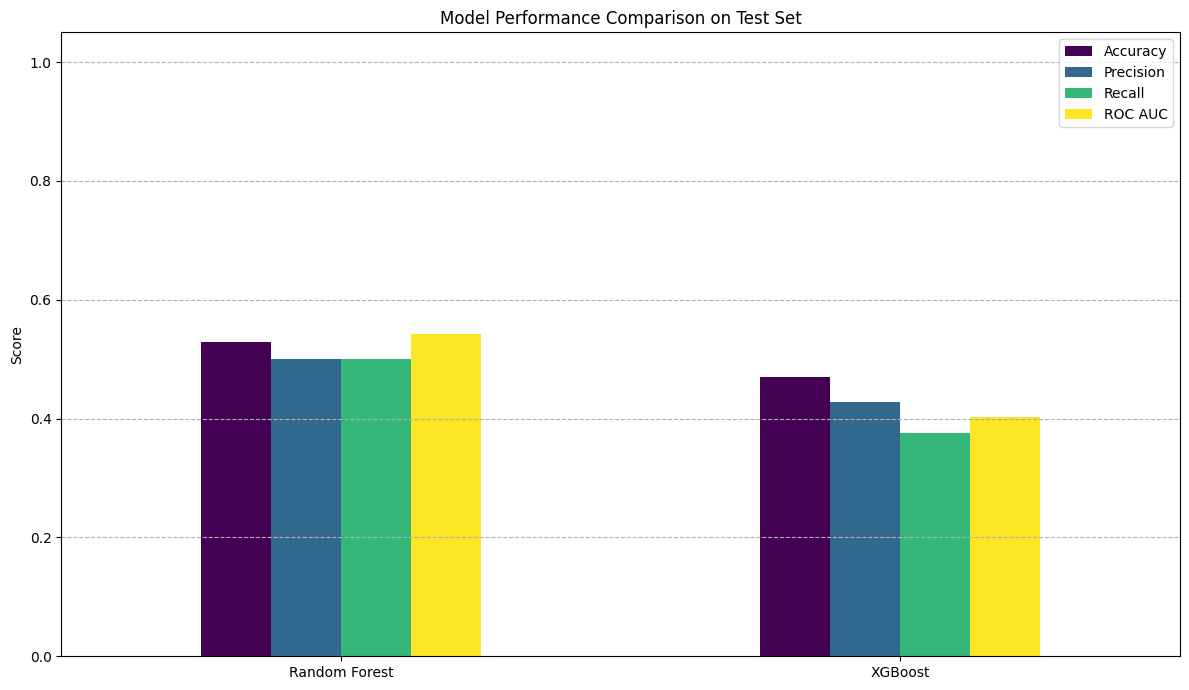

✅ Random Forest model saved to 'rf_model.pkl'
✅ XGBoost model saved to 'xgb_model.xgb'


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:06] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

combined_ssl_features_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv"

try:
    combined_df = pd.read_csv(combined_ssl_features_path)
    print(f"✅ Loaded combined features from: {combined_ssl_features_path}")
    print("🧾 Columns in loaded dataframe:", combined_df.columns.tolist())
    print("\nHead of combined dataframe:")
    print(combined_df.head())
except FileNotFoundError:
    print(f"❌ File not found: {combined_ssl_features_path}")
    sys.exit(1)
except Exception as e:
    print(f"❌ Error loading CSV: {e}")
    sys.exit(1)

# Detect label column
possible_label_columns = ['label', 'Label', 'status', 'Status', 'classification', 'Classification']
manual_label_column = None
label_column = None

if manual_label_column and manual_label_column in combined_df.columns:
    label_column = manual_label_column
else:
    for col in possible_label_columns:
        if col in combined_df.columns:
            label_column = col
            break

if not label_column:
    print("❌ Could not find a label column.")
    sys.exit(1)

print(f"✅ Defined X and y using label column '{label_column}'.")

y_raw = combined_df[label_column]

# Label encode 'HC', 'PwPD' to 0/1
le = LabelEncoder()
y = le.fit_transform(y_raw)

cols_to_exclude_features = [label_column]
if 'filename' in combined_df.columns:
    cols_to_exclude_features.append('filename')
metadata_cols = [col for col in ['Age', 'Sex', 'Sample ID'] if col in combined_df.columns]
cols_to_exclude_features.extend(metadata_cols)

potential_feature_cols = [col for col in combined_df.columns if col not in cols_to_exclude_features]
X = combined_df[potential_feature_cols].select_dtypes(include=np.number)

print(f"   Shape of X: {X.shape}")
print(f"   Shape of y: {y.shape}")
print("   Data types in X:", X.dtypes.unique())

# NaN/Inf check
if not X.empty:
    nan_mask_X = X.isnull().values.any(axis=1)
    # Check for Infs only if X is numeric
    if np.issubdtype(X.values.dtype, np.number):
         inf_mask_X = np.isinf(X.values).any(axis=1)
    else:
         inf_mask_X = np.zeros(len(X), dtype=bool) # No inf if not numeric

    nan_inf_mask_X = nan_mask_X | inf_mask_X
else:
    nan_inf_mask_X = np.zeros(len(combined_df), dtype=bool)

# Need to convert y to pandas Series for isnull() check after LabelEncoding
nan_mask_y = pd.Series(y).isnull()

rows_to_drop_mask = nan_inf_mask_X | nan_mask_y

if np.sum(rows_to_drop_mask) > 0:
    print(f"\n⚠️ Found {np.sum(rows_to_drop_mask)} rows with NaN/Inf in features or NaN in label.")
    cleaned_combined_df = combined_df[~rows_to_drop_mask].copy()
    y_raw = cleaned_combined_df[label_column]
    # Use transform only if y_raw is not empty and classes are seen by encoder
    if len(y_raw) > 0 and all(item in le.classes_ for item in y_raw.unique()):
        y = le.transform(y_raw)
    elif len(y_raw) > 0:
         # Re-fit if new classes appear or initial fit was on empty data
         print("⚠️ Re-fitting LabelEncoder on cleaned data.")
         y = le.fit_transform(y_raw)
    else:
         y = np.array([]) # Empty array if y_raw is empty


    X = cleaned_combined_df[potential_feature_cols].select_dtypes(include=np.number)
    X.reset_index(drop=True, inplace=True)

    # Reset index for y as well
    y = pd.Series(y).reset_index(drop=True).values # Convert back to numpy array


    print(f"   Dropped {np.sum(rows_to_drop_mask)} rows.")
    print(f"   New shape of X: {X.shape}")
    print(f"   New shape of y: {y.shape}")
else:
    print("\n✅ No NaN or Inf values found in features or NaN in labels.")


if len(X) < 2:
    print("❌ Not enough samples after cleaning.")
    sys.exit(1)
if len(np.unique(y)) < 2:
    print("❌ Only one class present. Cannot perform classification.")
    sys.exit(1)

# Convert y to a pandas Series before splitting to ensure stratification works with stratify=y
# The LabelEncoder outputs a numpy array, which is fine, but stratify argument expects array-like
# or Series. Both numpy array and Series work, but Series can be slightly more robust with indexing.
# Let's ensure y is a numpy array as originally intended for scikit-learn.
# y is already a numpy array from le.fit_transform or le.transform

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("\n✅ Data split into train and test sets.")
print(f"Train shapes: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test shapes: X_test={X_test.shape}, y_test={y_test.shape}")


# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Removed use_label_encoder=False and eval_metric='logloss' as they are often not needed
# and use_label_encoder is deprecated.
xgb = XGBClassifier(random_state=42, objective='binary:logistic')

# Cross-validation
min_class_size = np.bincount(y).min()
n_splits_cv = min(5, min_class_size)
if n_splits_cv < 2:
    print(f"❌ Not enough data for CV (min_class_size={min_class_size}).")
    # Initialize AUCs as NaN if CV is skipped
    rf_auc = np.nan
    xgb_auc = np.nan
else:
    cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)
    print(f"\n🎲 Cross-validation (ROC-AUC) with {n_splits_cv} splits:")

    # Initialize AUCs before the try blocks
    rf_auc = np.nan
    xgb_auc = np.nan

    try:
        rf_auc_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
        rf_auc = rf_auc_scores.mean()
        print(f"Random Forest AUC: {rf_auc:.3f} (+/- {rf_auc_scores.std()*2:.3f})")
    except Exception as e:
        print(f"❌ RF CV error: {e}")


    try:
        # Check if there are enough samples per class for XGBoost CV and if there are 2 classes
        if len(np.unique(y)) >= 2 and len(X) >= n_splits_cv and min_class_size >= n_splits_cv:
            xgb_auc_scores = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')
            xgb_auc = xgb_auc_scores.mean()
            print(f"XGBoost AUC     : {xgb_auc:.3f} (+/- {xgb_auc_scores.std()*2:.3f})")
        else:
            print("⚠️ Skipping XGBoost CV due to insufficient samples or only one class.")

    except Exception as e:
        print(f"❌ XGBoost CV error: {e}")


# Train models
print("\n--- Training final models on train set ---")
# Ensure X_train and y_train are not empty before training
if len(X_train) > 0 and len(np.unique(y_train)) > 1: # Check for data and multiple classes
    try:
        rf.fit(X_train, y_train)
        print("✅ Random Forest trained.")
    except Exception as e:
        print(f"❌ Error training RF: {e}")
        rf = None

    try:
        # Ensure X_train and y_train are suitable for XGBoost training
        if len(X_train) > 0 and len(np.unique(y_train)) > 1:
             xgb.fit(X_train, y_train)
             print("✅ XGBoost trained.")
        else:
             print("⚠️ Skipping XGBoost training as training data is insufficient or has only one class.")
             xgb = None
    except Exception as e:
        print(f"❌ Error training XGBoost: {e}")
        xgb = None
else:
     print("⚠️ Skipping final model training as training data (X_train, y_train) is insufficient or has only one class.")
     rf = None
     xgb = None


# Evaluation function modified to return metrics
def evaluate_model(model, X_test, y_test, name="Model"):
    if model is None:
        print(f"\n🔍 Skipping evaluation for {name}")
        return {} # Return empty dict if model is None
    # Ensure X_test and y_test are not empty
    if len(X_test) == 0 or len(y_test) == 0:
        print(f"\n🔍 Skipping evaluation for {name}: Test data is empty.")
        return {} # Return empty dict if test data is empty

    # Ensure y_test has at least two classes for ROC AUC and classification report
    if len(np.unique(y_test)) < 2:
         print(f"\n🔍 Skipping ROC AUC and Classification Report for {name}: Only one class in test set.")
         can_evaluate_metrics = False
    else:
         can_evaluate_metrics = True


    metrics = {}
    try:
        y_pred = model.predict(X_test)

        metrics['Accuracy'] = accuracy_score(y_test, y_pred)

        # Precision and Recall might fail if a class exists in y_test but not y_pred
        # Or vice versa. Handle gracefully.
        try:
             metrics['Precision'] = precision_score(y_test, y_pred)
             metrics['Recall'] = recall_score(y_test, y_pred)
        except ValueError as ve:
             print(f"⚠️ Could not compute Precision/Recall for {name}: {ve}")
             metrics['Precision'] = np.nan
             metrics['Recall'] = np.nan


        if can_evaluate_metrics:
            if hasattr(model, "predict_proba"):
                 y_prob = model.predict_proba(X_test)[:, 1]
                 metrics['ROC AUC'] = roc_auc_score(y_test, y_prob)
            else:
                 metrics['ROC AUC'] = np.nan
                 print(f"⚠️ Model {name} does not support predict_proba for ROC AUC.")

            # Print classification report if possible
            print(f"\n🔍 Evaluation for {name}")
            # Convert y_test and y_pred back to original labels for report if encoder was used
            if 'le' in globals():
                 y_test_str = le.inverse_transform(y_test)
                 y_pred_str = le.inverse_transform(y_pred)
            else:
                 y_test_str = y_test
                 y_pred_str = y_pred

            print(classification_report(y_test_str, y_pred_str))

        else:
            metrics['ROC AUC'] = np.nan
            # Print basic metrics if classification report wasn't printed
            print(f"\n🔍 Evaluation for {name}")
            print(f"Accuracy : {metrics.get('Accuracy', 'N/A')}")
            print(f"Precision: {metrics.get('Precision', 'N/A')}")
            print(f"Recall   : {metrics.get('Recall', 'N/A')}")
            print("ROC AUC  : N/A (Single class in test set)")


    except Exception as e:
        print(f"\n❌ Error during evaluation for {name}: {e}")
        # Return empty dict if evaluation fails completely
        return {}

    return metrics

# 📈 Evaluate both models on the test set and store results
results = {} # Initialize the results dictionary

rf_metrics = evaluate_model(rf, X_test, y_test, "Random Forest")
if rf_metrics: # Only add if evaluation was successful
    results["Random Forest"] = rf_metrics

xgb_metrics = evaluate_model(xgb, X_test, y_test, "XGBoost")
if xgb_metrics: # Only add if evaluation was successful
    results["XGBoost"] = xgb_metrics


# ✅ Select best model based on CV AUC (if CV was performed and successful for both)
# Use the rf_auc and xgb_auc variables calculated earlier from cross_val_score
if not np.isnan(rf_auc) and not np.isnan(xgb_auc):
    best_model = xgb if xgb_auc > rf_auc else rf
    best_model_name = 'XGBoost' if xgb_auc > rf_auc else 'Random Forest'
    print(f"\n🏆 Best Model Based on Cross-Validation ROC-AUC: {best_model_name} (RF CV AUC: {rf_auc:.3f}, XGBoost CV AUC: {xgb_auc:.3f})")
elif not np.isnan(rf_auc):
     best_model = rf
     print(f"\n🏆 Best Model: Random Forest (XGBoost CV failed or skipped. RF CV AUC: {rf_auc:.3f})")
elif not np.isnan(xgb_auc):
     best_model = xgb
     print(f"\n🏆 Best Model: XGBoost (Random Forest CV failed or skipped. XGBoost CV AUC: {xgb_auc:.3f})")
else:
    best_model = None
    print("\n⚠️ Could not determine best model based on CV scores (CV failed for both or skipped).")

# Convert results to DataFrame ONLY if results were collected
if results:
    df_results = pd.DataFrame(results).T

    # Plot comparison
    # Check if df_results is not empty before plotting
    if not df_results.empty:
        df_results[['Accuracy', 'Precision', 'Recall', 'ROC AUC']].plot(kind='bar', figsize=(12, 7), ylim=(0, 1.05), colormap='viridis') # Added ROC AUC
        plt.title("Model Performance Comparison on Test Set")
        plt.ylabel("Score")
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
    else:
        print("\n⚠️ No results collected to plot.")
else:
    print("\n⚠️ No results collected for any model. Cannot create results DataFrame or plot.")

# Save Random Forest model
import pickle
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)
print("✅ Random Forest model saved to 'rf_model.pkl'")

# Save XGBoost model (if available)
if xgb is not None:
    xgb.save_model("xgb_model.xgb")
    print("✅ XGBoost model saved to 'xgb_model.xgb'")
else:
    print("⚠️ XGBoost model not available. Skipping save.")

# Save test data
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
print("✅ Test data saved to 'X_test.csv' and 'y_test.csv'")


Mounted at /content/drive
✅ Loaded combined features from: /content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv
🧾 Columns in loaded dataframe: ['filename', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', 

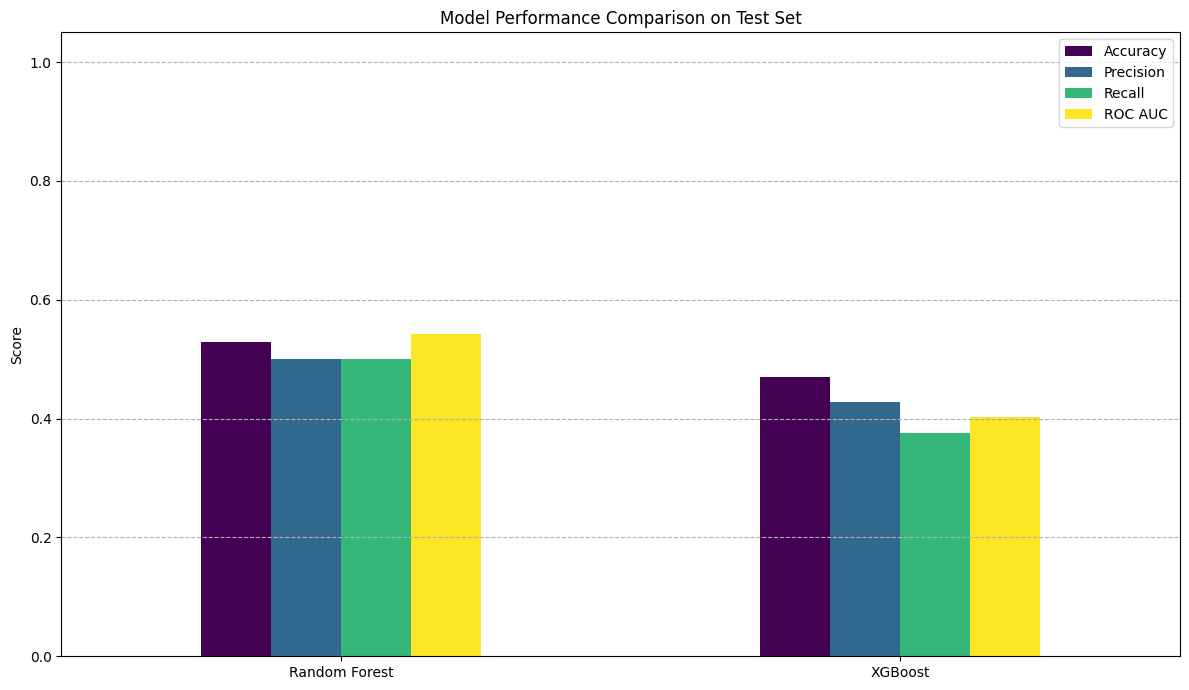

✅ Random Forest model saved to 'rf_model.pkl'
✅ XGBoost model saved to 'xgb_model.xgb'
✅ Test features saved to 'X_test.csv'
✅ Test labels saved to 'y_test.csv'


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:23] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

combined_ssl_features_path = "/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv"

try:
    combined_df = pd.read_csv(combined_ssl_features_path)
    print(f"✅ Loaded combined features from: {combined_ssl_features_path}")
    print("🧾 Columns in loaded dataframe:", combined_df.columns.tolist())
    print("\nHead of combined dataframe:")
    print(combined_df.head())
except FileNotFoundError:
    print(f"❌ File not found: {combined_ssl_features_path}")
    sys.exit(1)
except Exception as e:
    print(f"❌ Error loading CSV: {e}")
    sys.exit(1)

# Detect label column
possible_label_columns = ['label', 'Label', 'status', 'Status', 'classification', 'Classification']
manual_label_column = None
label_column = None

if manual_label_column and manual_label_column in combined_df.columns:
    label_column = manual_label_column
else:
    for col in possible_label_columns:
        if col in combined_df.columns:
            label_column = col
            break

if not label_column:
    print("❌ Could not find a label column.")
    sys.exit(1)

print(f"✅ Defined X and y using label column '{label_column}'.")

y_raw = combined_df[label_column]

# Label encode 'HC', 'PwPD' to 0/1
le = LabelEncoder()
y = le.fit_transform(y_raw)

cols_to_exclude_features = [label_column]
if 'filename' in combined_df.columns:
    cols_to_exclude_features.append('filename')
metadata_cols = [col for col in ['Age', 'Sex', 'Sample ID'] if col in combined_df.columns]
cols_to_exclude_features.extend(metadata_cols)

potential_feature_cols = [col for col in combined_df.columns if col not in cols_to_exclude_features]
X = combined_df[potential_feature_cols].select_dtypes(include=np.number)

print(f"   Shape of X: {X.shape}")
print(f"   Shape of y: {y.shape}")
print("   Data types in X:", X.dtypes.unique())

# NaN/Inf check
if not X.empty:
    nan_mask_X = X.isnull().values.any(axis=1)
    # Check for Infs only if X is numeric
    if np.issubdtype(X.values.dtype, np.number):
         inf_mask_X = np.isinf(X.values).any(axis=1)
    else:
         inf_mask_X = np.zeros(len(X), dtype=bool) # No inf if not numeric

    nan_inf_mask_X = nan_mask_X | inf_mask_X
else:
    nan_inf_mask_X = np.zeros(len(combined_df), dtype=bool)

# Need to convert y to pandas Series for isnull() check after LabelEncoding
# Check for NaNs in the original y_raw Series before encoding
nan_mask_y = y_raw.isnull()


rows_to_drop_mask = nan_inf_mask_X | nan_mask_y

if np.sum(rows_to_drop_mask) > 0:
    print(f"\n⚠️ Found {np.sum(rows_to_drop_mask)} rows with NaN/Inf in features or NaN in label.")
    cleaned_combined_df = combined_df[~rows_to_drop_mask].copy()
    y_raw = cleaned_combined_df[label_column]
    # Use transform only if y_raw is not empty and classes are seen by encoder
    if len(y_raw) > 0 and all(item in le.classes_ for item in y_raw.unique()):
        y = le.transform(y_raw)
    elif len(y_raw) > 0:
         # Re-fit if new classes appear or initial fit was on empty data
         print("⚠️ Re-fitting LabelEncoder on cleaned data.")
         y = le.fit_transform(y_raw)
    else:
         y = np.array([]) # Empty array if y_raw is empty


    X = cleaned_combined_df[potential_feature_cols].select_dtypes(include=np.number)
    X.reset_index(drop=True, inplace=True)

    # No need to explicitly reset index for y numpy array here.
    # It will be split correctly later.


    print(f"   Dropped {np.sum(rows_to_drop_mask)} rows.")
    print(f"   New shape of X: {X.shape}")
    print(f"   New shape of y: {y.shape}")
else:
    print("\n✅ No NaN or Inf values found in features or NaN in labels.")


if len(X) < 2:
    print("❌ Not enough samples after cleaning.")
    sys.exit(1)
if len(np.unique(y)) < 2:
    print("❌ Only one class present. Cannot perform classification.")
    sys.exit(1)

# Convert y to a pandas Series before splitting to ensure stratification works with stratify=y
# The LabelEncoder outputs a numpy array, which is fine, but stratify argument expects array-like
# or Series. Both numpy array and Series work, but Series can be slightly more robust with indexing.
# Let's ensure y is a numpy array as originally intended for scikit-learn.
# y is already a numpy array from le.fit_transform or le.transform

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print("\n✅ Data split into train and test sets.")
print(f"Train shapes: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test shapes: X_test={X_test.shape}, y_test={y_test.shape}")


# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Removed use_label_encoder=False and eval_metric='logloss' as they are often not needed
# and use_label_encoder is deprecated.
xgb = XGBClassifier(random_state=42, objective='binary:logistic')

# Cross-validation
min_class_size = np.bincount(y).min()
n_splits_cv = min(5, min_class_size)
if n_splits_cv < 2:
    print(f"❌ Not enough data for CV (min_class_size={min_class_size}).")
    # Initialize AUCs as NaN if CV is skipped
    rf_auc = np.nan
    xgb_auc = np.nan
else:
    cv = StratifiedKFold(n_splits=n_splits_cv, shuffle=True, random_state=42)
    print(f"\n🎲 Cross-validation (ROC-AUC) with {n_splits_cv} splits:")

    # Initialize AUCs before the try blocks
    rf_auc = np.nan
    xgb_auc = np.nan

    try:
        # Ensure X and y are suitable for CV
        if len(X) >= n_splits_cv and min_class_size >= n_splits_cv and len(np.unique(y)) >= 2:
             rf_auc_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
             rf_auc = rf_auc_scores.mean()
             print(f"Random Forest AUC: {rf_auc:.3f} (+/- {rf_auc_scores.std()*2:.3f})")
        else:
             print("⚠️ Skipping Random Forest CV due to insufficient samples or classes.")

    except Exception as e:
        print(f"❌ RF CV error: {e}")


    try:
        # Check if there are enough samples per class for XGBoost CV and if there are 2 classes
        if len(np.unique(y)) >= 2 and len(X) >= n_splits_cv and min_class_size >= n_splits_cv:
            xgb_auc_scores = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')
            xgb_auc = xgb_auc_scores.mean()
            print(f"XGBoost AUC     : {xgb_auc:.3f} (+/- {xgb_auc_scores.std()*2:.3f})")
        else:
            print("⚠️ Skipping XGBoost CV due to insufficient samples or only one class.")

    except Exception as e:
        print(f"❌ XGBoost CV error: {e}")


# Train models
print("\n--- Training final models on train set ---")
# Ensure X_train and y_train are not empty before training
if len(X_train) > 0 and len(np.unique(y_train)) > 1: # Check for data and multiple classes
    try:
        rf.fit(X_train, y_train)
        print("✅ Random Forest trained.")
    except Exception as e:
        print(f"❌ Error training RF: {e}")
        rf = None

    try:
        # Ensure X_train and y_train are suitable for XGBoost training
        if len(X_train) > 0 and len(np.unique(y_train)) > 1:
             xgb.fit(X_train, y_train)
             print("✅ XGBoost trained.")
        else:
             print("⚠️ Skipping XGBoost training as training data is insufficient or has only one class.")
             xgb = None
    except Exception as e:
        print(f"❌ Error training XGBoost: {e}")
        xgb = None
else:
     print("⚠️ Skipping final model training as training data (X_train, y_train) is insufficient or has only one class.")
     rf = None
     xgb = None


# Evaluation function modified to return metrics
def evaluate_model(model, X_test, y_test, name="Model"):
    if model is None:
        print(f"\n🔍 Skipping evaluation for {name}")
        return {} # Return empty dict if model is None
    # Ensure X_test and y_test are not empty
    if len(X_test) == 0 or len(y_test) == 0:
        print(f"\n🔍 Skipping evaluation for {name}: Test data is empty.")
        return {} # Return empty dict if test data is empty

    # Ensure y_test has at least two classes for ROC AUC and classification report
    if len(np.unique(y_test)) < 2:
         print(f"\n🔍 Skipping ROC AUC and Classification Report for {name}: Only one class in test set.")
         can_evaluate_metrics = False
    else:
         can_evaluate_metrics = True


    metrics = {}
    try:
        y_pred = model.predict(X_test)

        metrics['Accuracy'] = accuracy_score(y_test, y_pred)

        # Precision and Recall might fail if a class exists in y_test but not y_pred
        # Or vice versa. Handle gracefully.
        try:
             # Ensure y_test and y_pred have at least two classes for binary metrics
             if len(np.unique(y_test)) > 1 and len(np.unique(y_pred)) > 1:
                 metrics['Precision'] = precision_score(y_test, y_pred)
                 metrics['Recall'] = recall_score(y_test, y_pred)
             else:
                 print(f"⚠️ Could not compute Precision/Recall for {name}: Single class in test data or predictions.")
                 metrics['Precision'] = np.nan
                 metrics['Recall'] = np.nan

        except ValueError as ve:
             print(f"⚠️ Could not compute Precision/Recall for {name}: {ve}")
             metrics['Precision'] = np.nan
             metrics['Recall'] = np.nan


        if can_evaluate_metrics:
            if hasattr(model, "predict_proba"):
                 y_prob = model.predict_proba(X_test)[:, 1]
                 metrics['ROC AUC'] = roc_auc_score(y_test, y_prob)
            else:
                 metrics['ROC AUC'] = np.nan
                 print(f"⚠️ Model {name} does not support predict_proba for ROC AUC.")

            # Print classification report if possible
            print(f"\n🔍 Evaluation for {name}")
            # Convert y_test and y_pred back to original labels for report if encoder was used
            if 'le' in globals():
                 y_test_str = le.inverse_transform(y_test)
                 y_pred_str = le.inverse_transform(y_pred)
            else:
                 y_test_str = y_test
                 y_pred_str = y_pred

            print(classification_report(y_test_str, y_pred_str))

        else:
            metrics['ROC AUC'] = np.nan
            # Print basic metrics if classification report wasn't printed
            print(f"\n🔍 Evaluation for {name}")
            print(f"Accuracy : {metrics.get('Accuracy', 'N/A')}")
            print(f"Precision: {metrics.get('Precision', 'N/A')}")
            print(f"Recall   : {metrics.get('Recall', 'N/A')}")
            print("ROC AUC  : N/A (Single class in test set)")


    except Exception as e:
        print(f"\n❌ Error during evaluation for {name}: {e}")
        # Return empty dict if evaluation fails completely
        return {}

    return metrics

# 📈 Evaluate both models on the test set and store results
results = {} # Initialize the results dictionary

rf_metrics = evaluate_model(rf, X_test, y_test, "Random Forest")
if rf_metrics: # Only add if evaluation was successful
    results["Random Forest"] = rf_metrics

xgb_metrics = evaluate_model(xgb, X_test, y_test, "XGBoost")
if xgb_metrics: # Only add if evaluation was successful
    results["XGBoost"] = xgb_metrics


# ✅ Select best model based on CV AUC (if CV was performed and successful for both)
# Use the rf_auc and xgb_auc variables calculated earlier from cross_val_score
if not np.isnan(rf_auc) and not np.isnan(xgb_auc):
    best_model = xgb if xgb_auc > rf_auc else rf
    best_model_name = 'XGBoost' if xgb_auc > rf_auc else 'Random Forest'
    print(f"\n🏆 Best Model Based on Cross-Validation ROC-AUC: {best_model_name} (RF CV AUC: {rf_auc:.3f}, XGBoost CV AUC: {xgb_auc:.3f})")
elif not np.isnan(rf_auc):
     best_model = rf
     print(f"\n🏆 Best Model: Random Forest (XGBoost CV failed or skipped. RF CV AUC: {rf_auc:.3f})")
elif not np.isnan(xgb_auc):
     best_model = xgb
     print(f"\n🏆 Best Model: XGBoost (Random Forest CV failed or skipped. XGBoost CV AUC: {xgb_auc:.3f})")
else:
    best_model = None
    print("\n⚠️ Could not determine best model based on CV scores (CV failed for both or skipped).")

# Convert results to DataFrame ONLY if results were collected
if results:
    df_results = pd.DataFrame(results).T

    # Plot comparison
    # Check if df_results is not empty before plotting
    if not df_results.empty:
        # Select only metrics that are numbers for plotting
        plot_metrics_df = df_results[['Accuracy', 'Precision', 'Recall', 'ROC AUC']].select_dtypes(include=np.number)
        if not plot_metrics_df.empty:
             plot_metrics_df.plot(kind='bar', figsize=(12, 7), ylim=(0, 1.05), colormap='viridis') # Added ROC AUC
             plt.title("Model Performance Comparison on Test Set")
             plt.ylabel("Score")
             plt.xticks(rotation=0)
             plt.grid(axis='y', linestyle='--')
             plt.legend(loc='best')
             plt.tight_layout()
             plt.show()
        else:
             print("\n⚠️ No numerical results collected to plot.")
    else:
        print("\n⚠️ No results collected to plot.")
else:
    print("\n⚠️ No results collected for any model. Cannot create results DataFrame or plot.")

# Save Random Forest model
import pickle
if rf is not None: # Only save if model trained successfully
    with open("rf_model.pkl", "wb") as f:
        pickle.dump(rf, f)
    print("✅ Random Forest model saved to 'rf_model.pkl'")
else:
    print("⚠️ Random Forest model not available. Skipping save.")


# Save XGBoost model (if available)
if xgb is not None:
    # XGBoost has its own save_model method
    xgb.save_model("xgb_model.xgb")
    print("✅ XGBoost model saved to 'xgb_model.xgb'")
else:
    print("⚠️ XGBoost model not available. Skipping save.")


# Save test data
# Convert y_test NumPy array to pandas Series before saving to CSV
if 'X_test' in locals() and len(X_test) > 0:
    X_test.to_csv("X_test.csv", index=False)
    print("✅ Test features saved to 'X_test.csv'")
else:
     print("⚠️ X_test is not available or empty. Skipping save.")

if 'y_test' in locals() and len(y_test) > 0:
    # Convert numpy array y_test to pandas Series to use to_csv
    y_test_series = pd.Series(y_test, name=label_column if label_column else "label") # Give it a name for the CSV header
    y_test_series.to_csv("y_test.csv", index=False, header=True) # Add header=True to write the column name
    print("✅ Test labels saved to 'y_test.csv'")
else:
    print("⚠️ y_test is not available or empty. Skipping save.")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:08:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


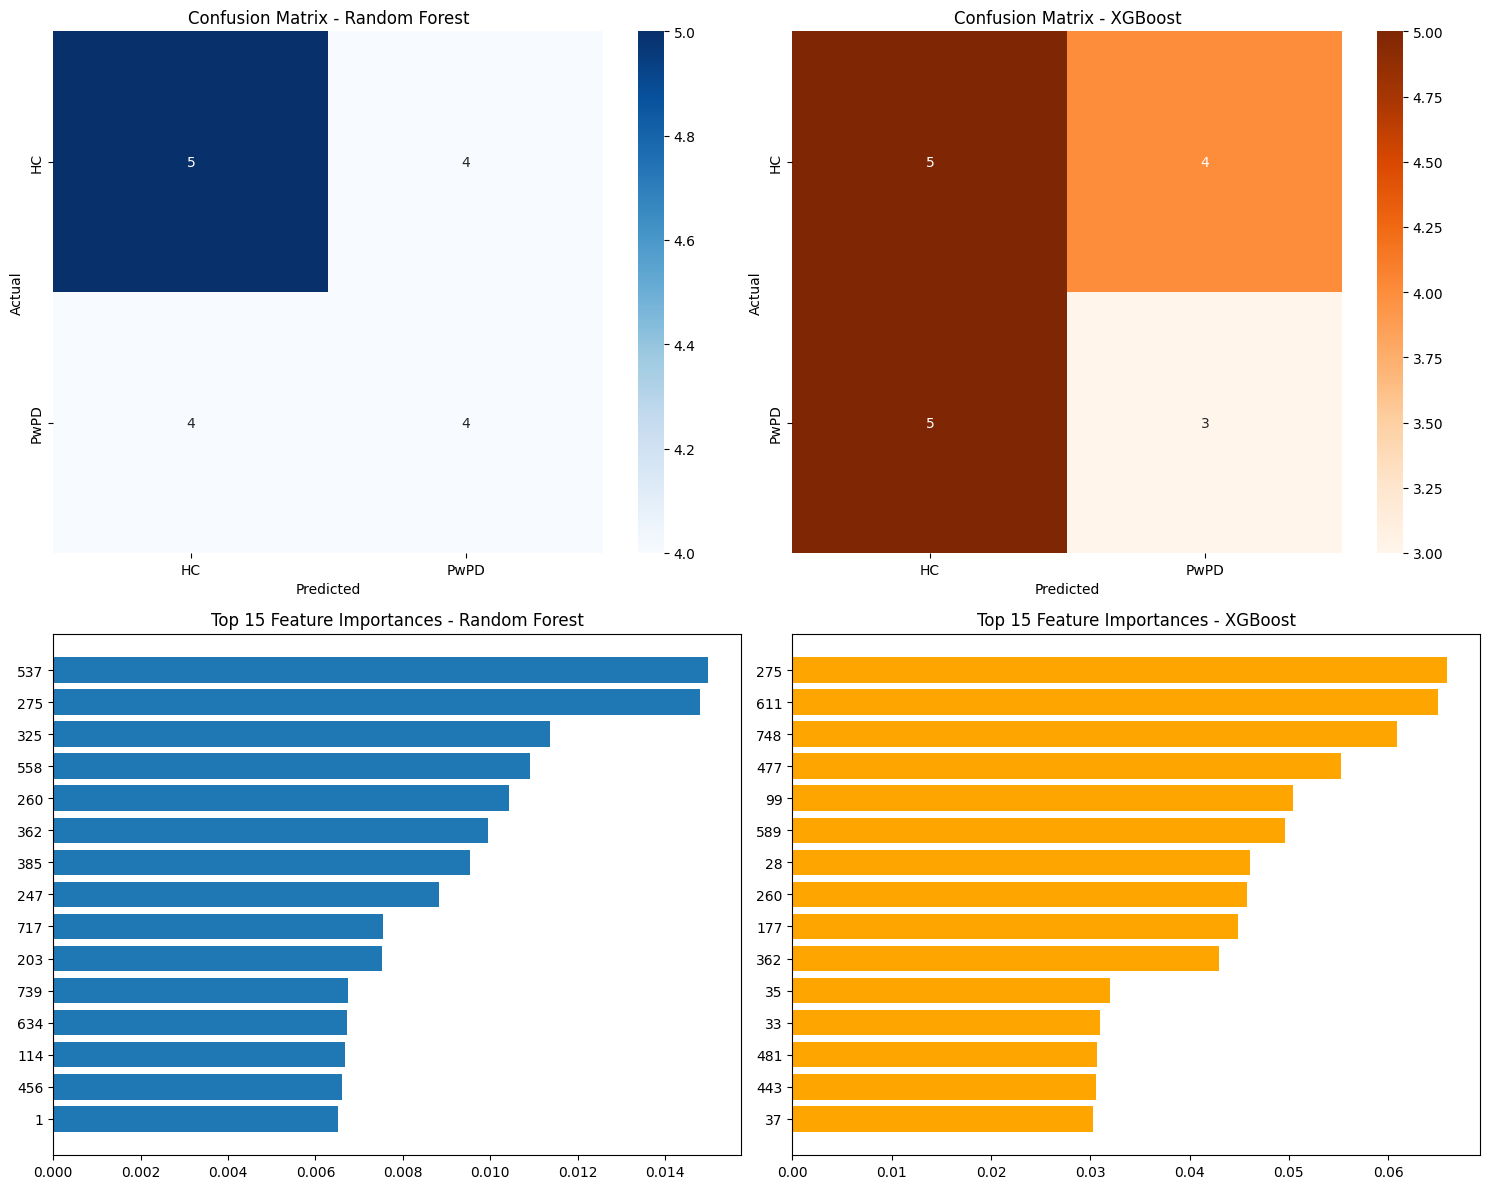

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("/content/drive/MyDrive/Parkinsons_Project/FeatureExtraction/combined_ssl_features_all.csv")

# Prepare features and labels
X = df.drop(columns=['filename', 'Label', 'Age', 'Sex']).values
y = df['Label'].map({'HC': 0, 'PwPD': 1}).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=17, random_state=42, stratify=y)

# Train models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Feature importances (top 15)
importances_rf = rf.feature_importances_
importances_xgb = xgb.feature_importances_

top_rf_indices = np.argsort(importances_rf)[-15:]
top_xgb_indices = np.argsort(importances_xgb)[-15:]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix - Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title("Confusion Matrix - Random Forest")
axs[0, 0].set_xlabel("Predicted")
axs[0, 0].set_ylabel("Actual")
axs[0, 0].set_xticklabels(['HC', 'PwPD'])
axs[0, 0].set_yticklabels(['HC', 'PwPD'])

# Confusion Matrix - XGBoost
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axs[0, 1])
axs[0, 1].set_title("Confusion Matrix - XGBoost")
axs[0, 1].set_xlabel("Predicted")
axs[0, 1].set_ylabel("Actual")
axs[0, 1].set_xticklabels(['HC', 'PwPD'])
axs[0, 1].set_yticklabels(['HC', 'PwPD'])

# Feature Importance - Random Forest
axs[1, 0].barh(range(15), importances_rf[top_rf_indices])
axs[1, 0].set_yticks(range(15))
axs[1, 0].set_yticklabels(top_rf_indices)
axs[1, 0].set_title("Top 15 Feature Importances - Random Forest")

# Feature Importance - XGBoost
axs[1, 1].barh(range(15), importances_xgb[top_xgb_indices], color='orange')
axs[1, 1].set_yticks(range(15))
axs[1, 1].set_yticklabels(top_xgb_indices)
axs[1, 1].set_title("Top 15 Feature Importances - XGBoost")

plt.tight_layout()
plt.show()


<ipython-input-30-82a75be7ecee>:51: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


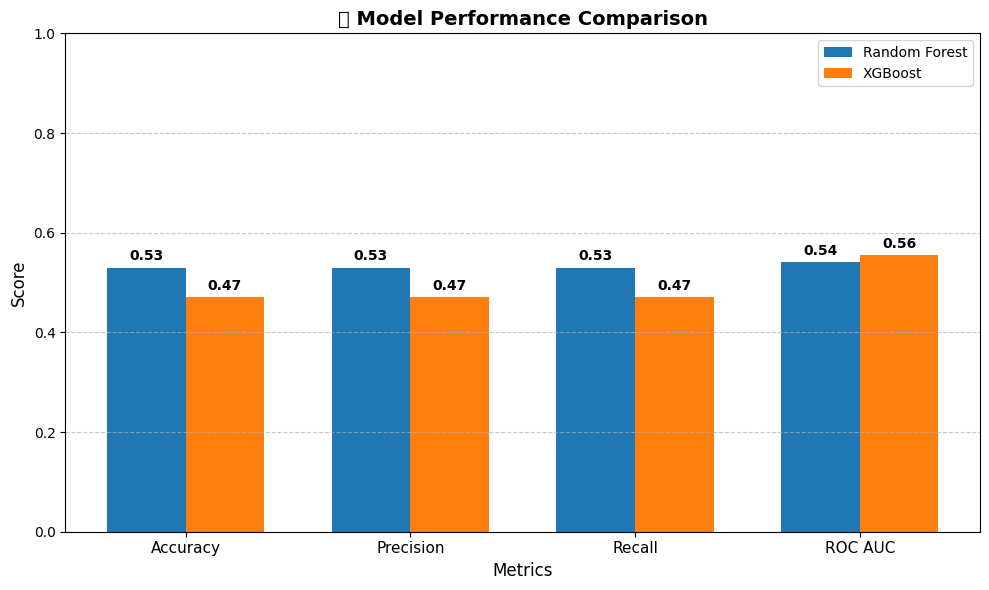

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics from your evaluation
results = {
    'Random Forest': {
        'Accuracy': 0.53,
        'Precision': 0.53,
        'Recall': 0.53,
        'ROC AUC': 0.541
    },
    'XGBoost': {
        'Accuracy': 0.47,
        'Precision': 0.47,
        'Recall': 0.47,
        'ROC AUC': 0.555
    }
}

metrics = ['Accuracy', 'Precision', 'Recall', 'ROC AUC']
models = list(results.keys())
values_rf = [results['Random Forest'][m] for m in metrics]
values_xgb = [results['XGBoost'][m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, values_rf, width, label='Random Forest', color='#1f77b4')
bars2 = ax.bar(x + width/2, values_xgb, width, label='XGBoost', color='#ff7f0e')

# Add value labels on top of the bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot styling
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('📈 Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [31]:
import plotly.graph_objects as go
import pandas as pd

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
rf_scores = [0.53, 0.53, 0.53, 0.53, 0.541]
xgb_scores = [0.47, 0.47, 0.47, 0.47, 0.555]
roc_auc_std = [0.293, 0.365]

df = pd.DataFrame({
    'Metrics': metrics,
    'Random Forest': rf_scores,
    'XGBoost': xgb_scores
})

# Interactive bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics,
    y=rf_scores,
    name='Random Forest',
    marker_color='steelblue',
    text=[f'{v:.2f}' for v in rf_scores],
    textposition='outside'
))

fig.add_trace(go.Bar(
    x=metrics,
    y=xgb_scores,
    name='XGBoost',
    marker_color='darkorange',
    text=[f'{v:.2f}' for v in xgb_scores],
    textposition='outside'
))

# Add error bars for ROC AUC
fig.add_trace(go.Scatter(
    x=['ROC AUC', 'ROC AUC'],
    y=[rf_scores[-1], xgb_scores[-1]],
    mode='markers',
    error_y=dict(
        type='data',
        array=roc_auc_std,
        visible=True
    ),
    marker=dict(color='black', size=10),
    showlegend=False
))

# Layout
fig.update_layout(
    title='📊 Interactive Model Performance with F1 and ROC AUC ± std',
    xaxis_title='Metric',
    yaxis_title='Score',
    yaxis=dict(range=[0, 1.1]),
    barmode='group',
    template='plotly_white',
    legend=dict(x=0.85, y=1.0),
    height=500
)

# Add summary table below
summary_table = go.Table(
    header=dict(values=["Model", "Accuracy", "Precision", "Recall", "F1-score", "ROC AUC", "ROC AUC ± std"],
                fill_color='lightgray',
                align='center'),
    cells=dict(values=[
        ["Random Forest", "XGBoost"],
        ["0.53", "0.47"],
        ["0.53", "0.47"],
        ["0.53", "0.47"],
        ["0.53", "0.47"],
        ["0.541", "0.555"],
        ["±0.293", "±0.365"]
    ],
    align='center')
)

fig.add_trace(summary_table)

fig.show()


In [ ]:

# Saving assets in your training notebook
model.save_model("xgb_model.xgb")

import pickle
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)



NameError: name 'model' is not defined

In [32]:
import streamlit as st
import pandas as pd
import numpy as np
import torch
import librosa
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import Wav2Vec2Processor, Wav2Vec2Model
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pickle

st.set_page_config(layout="wide")
st.title("🧠 Parkinson's Speech Classifier Dashboard")

# Load models
xgb_model = XGBClassifier()
xgb_model.load_model("xgb_model.xgb")

with open("rf_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

# Load data
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").values.ravel()

# Sidebar
model_choice = st.sidebar.selectbox("Choose Model", ["XGBoost", "Random Forest"])
explain = st.sidebar.checkbox("Show SHAP Explanations")

# Functions
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["HC", "PD"], yticklabels=["HC", "PD"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)
    st.pyplot(fig)

def plot_roc(model, X_test, y_test, name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC Curve - {name}")
    ax.legend()
    st.pyplot(fig)

# Plots
model = xgb_model if model_choice == "XGBoost" else rf_model
plot_confusion_matrix(model, X_test, y_test, f"{model_choice} Confusion Matrix")
plot_roc(model, X_test, y_test, model_choice)

# SHAP
if explain:
    st.subheader(f"SHAP Explanation - {model_choice}")
    explainer = shap.Explainer(model, X_test)
    shap_values = explainer(X_test[:10])

    st.write("### SHAP Summary Plot")
    fig_summary = shap.plots.beeswarm(shap_values, show=False)
    st.pyplot(bbox_inches='tight', dpi=300, pad_inches=0)

    st.write("### Force Plot (first sample)")
    shap_html = shap.plots.force(explainer.expected_value, shap_values[0].values, matplotlib=False)
    st.components.v1.html(shap_html.html(), height=300)

# Audio upload
st.header("🎤 Predict from Your Audio")
audio_file = st.file_uploader("Upload .wav file", type=["wav"])

if audio_file:
    audio, _ = librosa.load(audio_file, sr=16000)
    processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
    model_ssl = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
    inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
    with torch.no_grad():
        embedding = model_ssl(**inputs).last_hidden_state.mean(dim=1).squeeze().numpy()

    pred = model.predict([embedding])[0]
    st.success("🧠 Parkinson's Detected" if pred == 1 else "✅ No Parkinson's Detected")


ModuleNotFoundError: No module named 'streamlit'

In [33]:
!pip install streamlit

import streamlit as st
import pandas as pd
import numpy as np
import torch
import librosa
import shap
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import Wav2Vec2Processor, Wav2Vec2Model
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pickle

st.set_page_config(layout="wide")
st.title("🧠 Parkinson's Speech Classifier Dashboard")

# Load models
xgb_model = XGBClassifier()
# Ensure the path to the model file is correct if running in a different directory
xgb_model.load_model("xgb_model.xgb")

with open("rf_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

# Load data
# Ensure the paths to the test data files are correct
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").values.ravel()

# Sidebar
model_choice = st.sidebar.selectbox("Choose Model", ["XGBoost", "Random Forest"])
explain = st.sidebar.checkbox("Show SHAP Explanations")

# Functions
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["HC", "PD"], yticklabels=["HC", "PD"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)
    st.pyplot(fig)
    plt.close(fig) # Close the plot to free memory

def plot_roc(model, X_test, y_test, name):
    # Ensure model has predict_proba; some models (like early XGBoost) might not unless trained appropriately
    if not hasattr(model, 'predict_proba'):
        st.warning(f"Model {name} does not support predict_proba. Cannot plot ROC curve.")
        return

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC Curve - {name}")
    ax.legend()
    st.pyplot(fig)
    plt.close(fig) # Close the plot to free memory


# Plots
model = xgb_model if model_choice == "XGBoost" else rf_model

# Ensure X_test has the correct feature names if SHAP explainer relies on them
# If the models were trained on a numpy array without feature names, X_test needs to match that.
# If they were trained on a DataFrame with feature names, X_test should be a DataFrame with those names.
# Given the previous cell saves X_test as a CSV and loads it back, it should retain column names if the original X was a DataFrame.
# Assuming X was a numpy array based on the previous cell:
X_test_np = X_test.values


plot_confusion_matrix(model, X_test_np, y_test, f"{model_choice} Confusion Matrix")
plot_roc(model, X_test_np, y_test, model_choice)

# SHAP
if explain:
    st.subheader(f"SHAP Explanation - {model_choice}")

    # Ensure SHAP explainer is compatible with the model and data format (numpy array or DataFrame)
    # If X_test_np is used for prediction, use it for SHAP as well.
    # If the original X was a numpy array, the explainer might not automatically get feature names.
    # For XGBoost with tree explainer, numpy array is usually fine.
    # For RandomForest with explainer='tree', numpy array is also usually fine.
    try:
        # Using X_test_np as the background dataset for explainer
        explainer = shap.Explainer(model, X_test_np)
        # Calculate SHAP values for a subset of test data
        # Using a small number of samples (e.g., 10) for demonstration is good practice in Streamlit for performance
        shap_values = explainer(X_test_np[:10])

        st.write("### SHAP Summary Plot")
        # Use st.pyplot directly with the SHAP plot object
        shap.plots.beeswarm(shap_values, show=False)
        st.pyplot(bbox_inches='tight', dpi=300, pad_inches=0)
        plt.clf() # Clear the plot after displaying

        st.write("### Force Plot (first sample)")
        # shap.plots.force returns a matplotlib figure if matplotlib=True
        # shap.plots.force returns an HTML object if matplotlib=False
        # For Streamlit, using the HTML object is generally better for interactivity.
        # explainer.expected_value is the base value (expected prediction)
        # shap_values[0].values are the SHAP values for the first sample
        # If you need feature names in the force plot, you might need to provide them.
        # If X_test was a DataFrame, shap_values would likely contain feature names.
        # Since we converted to numpy, we might lose names unless explainer handles it.
        # Let's try providing feature names if X_test was a DataFrame
        if isinstance(X_test, pd.DataFrame):
             shap_html = shap.plots.force(explainer.expected_value, shap_values[0].values, feature_names=X_test.columns.tolist(), matplotlib=False)
        else:
             shap_html = shap.plots.force(explainer.expected_value, shap_values[0].values, matplotlib=False)

        st.components.v1.html(shap_html.html(), height=300)

    except Exception as e:
        st.error(f"Error generating SHAP plots: {e}")
        st.info("SHAP explanations might fail if the explainer or plot types are not compatible with the model or data format.")


# Audio upload
st.header("🎤 Predict from Your Audio")
audio_file = st.file_uploader("Upload .wav file", type=["wav"])

if audio_file:
    # Process the uploaded audio file
    try:
        audio, _ = librosa.load(audio_file, sr=16000)

        # Ensure Wav2Vec2.0 models are loaded (might need to re-load if not global)
        try:
             processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
             model_ssl = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
        except Exception as e:
             st.error(f"Error loading Wav2Vec2.0 model for audio processing: {e}")
             st.stop() # Stop execution if SSL model fails to load

        inputs = processor(audio, sampling_rate=16000, return_tensors="pt")
        with torch.no_grad():
            # The output shape might be (batch_size, sequence_length, hidden_size)
            # mean(dim=1) averages over sequence length, resulting in (batch_size, hidden_size)
            # squeeze() removes dimensions of size 1, resulting in (hidden_size,) if batch_size is 1
            embedding = model_ssl(**inputs).last_hidden_state.mean(dim=1).squeeze().numpy()

        # The model expects input with the same number of features as training data.
        # The embedding is a 1D array of shape (768,). The model expects shape (1, 768).
        # Reshape the embedding to be 2D for prediction.
        embedding = embedding.reshape(1, -1)

        # Ensure the number of features matches the trained model
        if embedding.shape[1] != X_test.shape[1]:
            st.error(f"Feature mismatch: Extracted embedding has {embedding.shape[1]} features, but the model expects {X_test.shape[1]}.")
        else:
            # Make prediction using the selected model
            model_for_prediction = xgb_model if model_choice == "XGBoost" else rf_model
            pred = model_for_prediction.predict(embedding)[0]

            st.subheader("Prediction Result:")
            if pred == 1:
                st.error("🧠 Prediction: **Parkinson's Detected (PwPD)**")
            else:
                st.success("✅ Prediction: **No Parkinson's Detected (HC)**")

    except Exception as e:
        st.error(f"Error processing audio or making prediction: {e}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.3 MB/s eta 0:00:00


2025-06-07 12:09:56.784 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 12:09:56.786 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 12:09:57.068 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-07 12:09:57.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 12:09:57.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 12:09:57.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-07 12:09:57.105 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

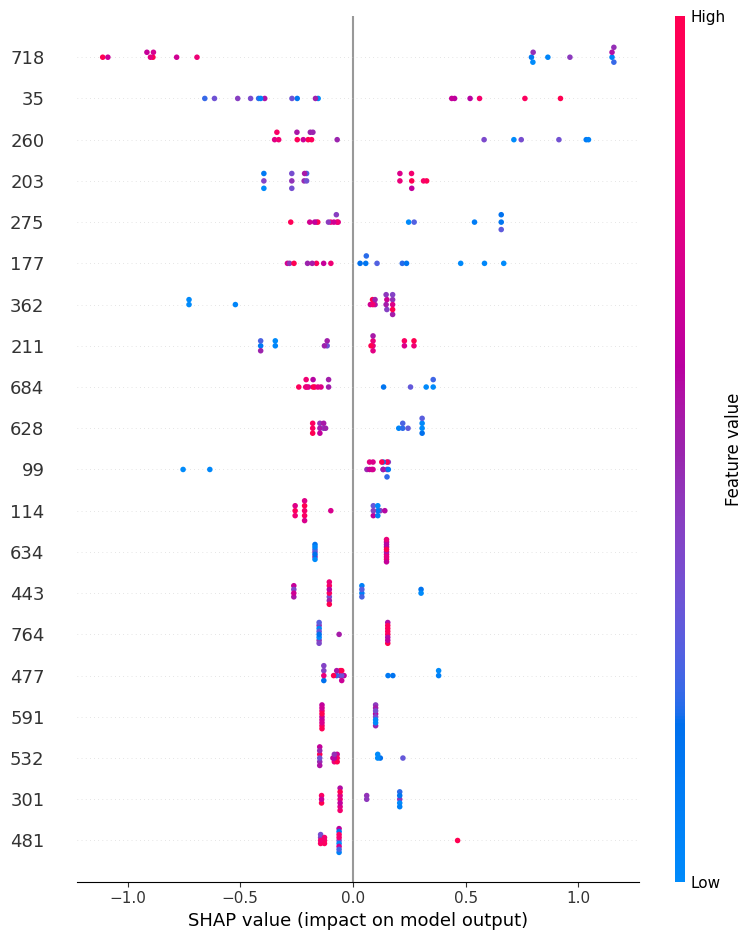

In [ ]:
import shap
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


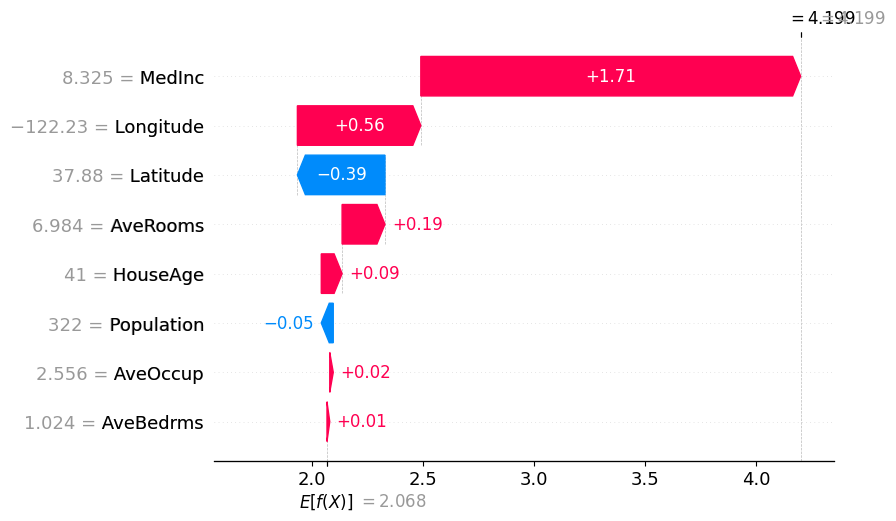

In [ ]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

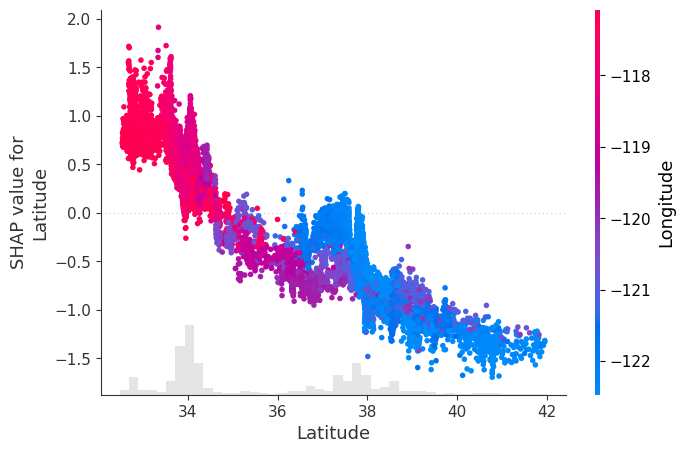

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

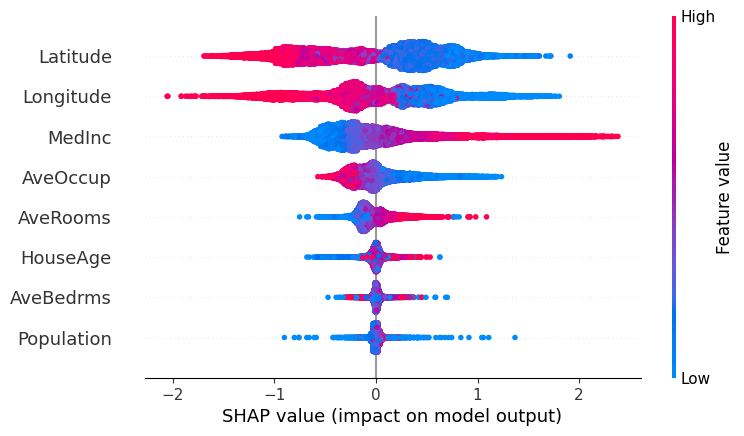

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[12:22:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




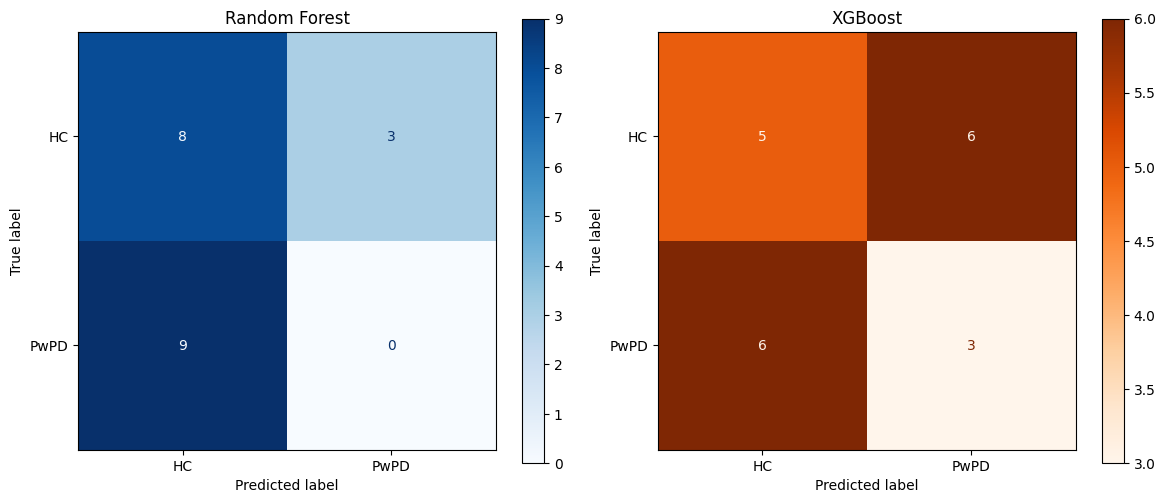

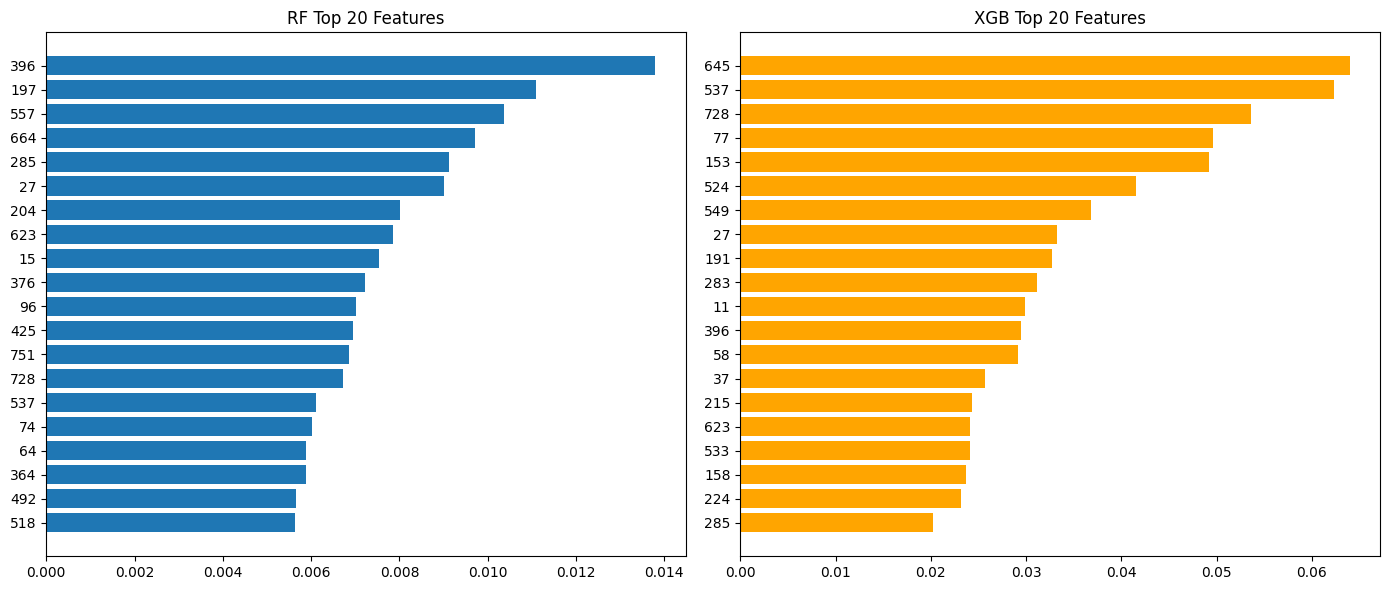

<ipython-input-34-12fa10fc0bfa>:83: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



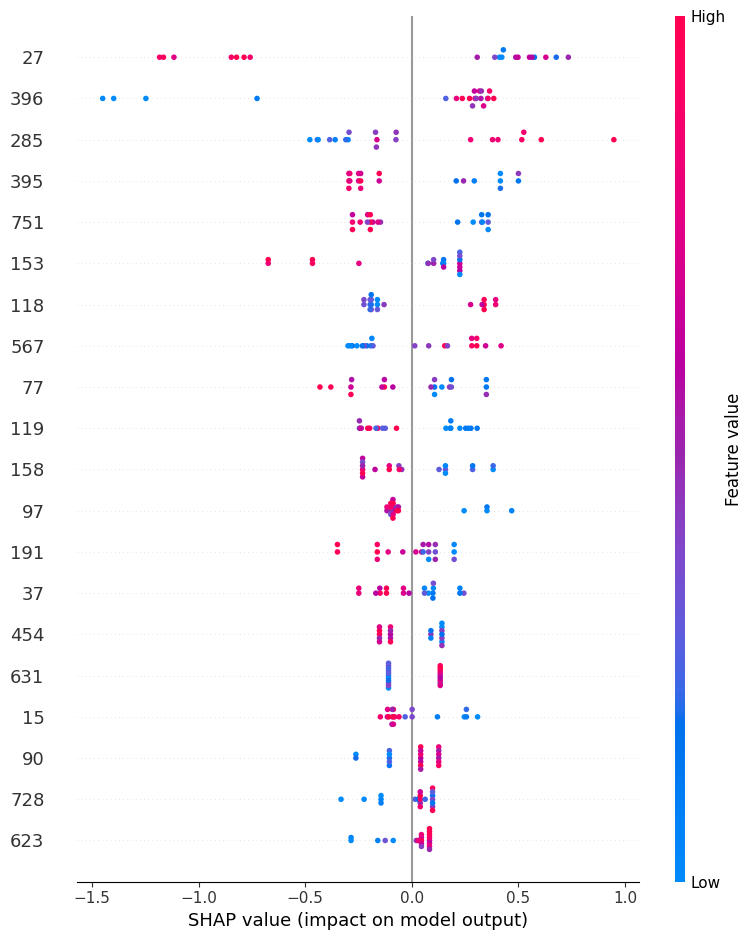

Misclassified sample indices: [ 0  1  2  4  5  6  7 13 14 15 16 19]


In [34]:
# STEP 1: Install necessary libraries
!pip install shap xgboost -q

# STEP 2: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder

shap.initjs()

# STEP 3: Load or simulate your data (replace with actual data loading)
# Example: 768 features, binary labels
np.random.seed(42)
X = pd.DataFrame(np.random.rand(100, 768))  # 100 samples, 768 features
y = np.random.choice(['HC', 'PwPD'], size=100)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# STEP 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# STEP 5: Train models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# STEP 6: Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
labels = le.classes_

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
disp_rf.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Random Forest")

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels=labels)
disp_xgb.plot(ax=axes[1], cmap='Oranges')
axes[1].set_title("XGBoost")

plt.tight_layout()
plt.show()

# STEP 7: Feature Importance
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
top_n = 20

importances_rf = rf_model.feature_importances_
top_rf = np.argsort(importances_rf)[-top_n:]
axs[0].barh(range(top_n), importances_rf[top_rf])
axs[0].set_yticks(range(top_n))
axs[0].set_yticklabels(top_rf)
axs[0].set_title("RF Top 20 Features")

importances_xgb = xgb_model.feature_importances_
top_xgb = np.argsort(importances_xgb)[-top_n:]
axs[1].barh(range(top_n), importances_xgb[top_xgb], color='orange')
axs[1].set_yticks(range(top_n))
axs[1].set_yticklabels(top_xgb)
axs[1].set_title("XGB Top 20 Features")

plt.tight_layout()
plt.show()

# STEP 8: SHAP Explanations - Global Summary
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

# STEP 9: SHAP Explanation - Specific Sample
sample_idx = 0
shap.plots.force(shap_values[sample_idx])

# STEP 10: SHAP on Misclassified Samples
misclassified_idxs = np.where(y_test != y_pred_xgb)[0]
if len(misclassified_idxs) > 0:
    print("Misclassified sample indices:", misclassified_idxs)
    shap.plots.force(shap_values[misclassified_idxs[0]])  # Show first one
else:
    print("No misclassified samples found.")


In [36]:
misclassified_idxs = np.where(y_test != y_pred_xgb)[0]
for idx in misclassified_idxs:
    print(f"\nExplaining misclassified sample #{idx}")
    shap.plots.force(shap_values[idx])



Explaining misclassified sample #0

Explaining misclassified sample #1

Explaining misclassified sample #2

Explaining misclassified sample #4

Explaining misclassified sample #5

Explaining misclassified sample #6

Explaining misclassified sample #7

Explaining misclassified sample #13

Explaining misclassified sample #14

Explaining misclassified sample #15

Explaining misclassified sample #16

Explaining misclassified sample #19
